In [1]:
import sys
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot4/lib/python3.7/site-packages')
# sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot/lib/python3.8/site-packages')
sys.path.insert(0,'/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages')
print ( sys.path )

import numpy as np
import pandas as pd
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import mplhep
from matplotlib.colors import LogNorm
from joblib import dump, load
# plt.style.use(mplhep.style.CMS)
import matplotlib.font_manager
mpl.rcParams.update(
    {'font.size': 18,
     'font.family': 'sans-serif',
     'legend.fontsize': 14,
     'axes.labelsize': 18,
     'xtick.labelsize': 14,
     'ytick.labelsize': 14
    }
    )
# mpl.rcParams.update(
#     {'font.size': 18,
#      'font.family': 'sans-serif',
#      'font.sans-serif': ['Helvetica'],
#      'legend.fontsize': 14,
#      'axes.labelsize': 18,
#      'xtick.labelsize': 14,
#      'ytick.labelsize': 14
#     }
#     )
mpl.rcParams

['/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/condor/8.9.11-e1651/x86_64-centos7-gcc11-opt/lib/python3', '/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/itk', '/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/python', '/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib', '', '/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python39.zip', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9', '/cvmfs/sft.cern.ch/lcg/releases/Python/3.9.6-b0f98/x86_64-centos7-gcc8-opt/lib/python3.9/lib-dynload', '/eos/home-a/antoniov/SWAN_projects/env/uproot-py39/lib/python3.9/site-packages', '/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/IPytho

RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.avconv_args': [],
          'animation.avconv_path': 'avconv',
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': [],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.html_args': [],
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': 'line',
          'axes.edgecolor': 'black',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.f

In [2]:
# run_ranges_periods, df_run_ranges, fiducial_cuts, fiducial_cuts_all, aperture_period_map, aperture_parametrisation, check_aperture, get_data, process_data_protons_multiRP
from processing import *

# norm_to_1fb = True
norm_to_1fb = False

lepton_type = 'muon'
# lepton_type = 'electron'

# data_sample = '2017'
data_sample = '2018'

save_figures = False

# run_tables = False

{'muon': {'2017B': 2.360904801, '2017C1': 5.313012839, '2017C2': 3.264135878, '2017D': 4.074723964, '2017E': 8.958810514, '2017F1': 1.708478656, '2017F2': 7.877903151, '2017F3': 3.632463163}, 'electron': {'2017B': 2.259685729466727, '2017C1': 5.070112518026598, '2017C2': 3.114906113929596, '2017D': 3.8868791892596004, '2017E': 8.568260128452684, '2017F1': 1.629432474022848, '2017F2': 7.513416205912684, '2017F3': 3.4643999898374793}}
Luminosity 2017 muon: 37.190432966
Luminosity 2017 electron: 35.507092348908216
{'muon': {'2018A': 12.0989473, '2018B1': 6.37152736, '2018B2': 0.3994688, '2018C': 6.5296412326999995, '2018D1': 19.858430199999997, '2018D2': 10.404398965499999}, 'electron': {'2018A': 11.290304299999999, '2018B1': 6.37985326, '2018B2': 0.39999080000000004, '2018C': 6.529556346600001, '2018D1': 19.86785332, '2018D2': 10.409336007299999}}
Luminosity 2018 muon: 55.662413858200004
Luminosity 2018 electron: 54.8768940339


### Event selection

In [3]:
def select_events( df_events, lepton_type, max_num_tracks = 4, label_jet=None, label_muon=None, label_electron=None ):

    max_num_tracks_ = max_num_tracks
    
#     label_jet_ = "_nom"
#     label_muon_ = "_nom"
#     label_WLep_ = "_nom"
#     label_WW_ = "_nom"
    label_jet_ = "_nom"
    if label_jet is not None: label_jet_ = label_jet
        
    label_muon_ = "_nom"
    if label_muon is not None: label_muon_ = label_muon
        
    label_electron_ = "_nom"
    if label_electron is not None: label_electron_ = label_electron
        
    label_WLep_ = "_nom"
    if label_muon is not None:
        label_WLep_ = label_muon
    elif label_electron is not None:
        label_WLep_ = label_electron
        
    label_WW_ = "_nom"
    if label_jet is not None:
        label_WW_ = label_jet
    elif label_muon is not None:
        label_WW_ = label_muon
    elif label_electron is not None:
        label_WW_ = label_electron
        
    label_xiCMS_ = "_nom"
    if label_jet is not None:
        label_xiCMS_ = label_jet
    elif label_muon is not None:
        label_xiCMS_ = label_muon
    elif label_electron is not None:
        label_xiCMS_ = label_electron
    
    lepton_var_phi_ = ""
    lepton_var_eta_ = ""
    if lepton_type == 'muon':
        lepton_var_phi_ = "muon0_phi"
        lepton_var_eta_ = "muon0_eta"
    elif lepton_type == 'electron':
        lepton_var_phi_ = "electron0_phi"
        lepton_var_eta_ = "electron0_eta"
        
    deltaPhi_jet_lep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, lepton_var_phi_ ] )
    msk_dphi_ = ( deltaPhi_jet_lep_ < -np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_lep_ >= np.pi )
    deltaPhi_jet_lep_.loc[ msk_dphi_ ] = deltaPhi_jet_lep_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaEta_jet_lep_ = ( df_events.loc[ :, "jet0_eta"] - df_events.loc[ :, lepton_var_eta_ ] )
    deltaR_jet_lep_ = np.sqrt( ( deltaPhi_jet_lep_ ) ** 2 + ( deltaEta_jet_lep_ ) ** 2 )
    
    deltaPhi_jet_met_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "met_phi"] )
    msk_dphi_ = ( deltaPhi_jet_met_ < -np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_met_ >= np.pi )
    deltaPhi_jet_met_.loc[ msk_dphi_ ] = deltaPhi_jet_met_.loc[ msk_dphi_ ] - 2*np.pi
    
    deltaPhi_jet_Wlep_ = ( df_events.loc[ :, "jet0_phi"] - df_events.loc[ :, "WLeptonicPhi"] )
    msk_dphi_ = ( deltaPhi_jet_Wlep_ < -np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] + 2*np.pi
    msk_dphi_ = ( deltaPhi_jet_Wlep_ >= np.pi )
    deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] = deltaPhi_jet_Wlep_.loc[ msk_dphi_ ] - 2*np.pi

    jet0_tau21_ = ( df_events.loc[ :, "jet0_tau2"] / df_events.loc[ :, "jet0_tau1"] )

    msk_All_ = np.full( df_events.shape[0], True, dtype=bool )
    
    msk_lep_ = None
    if lepton_type == 'muon':
        msk_lep_ = ( ( df_events.loc[ :, "muon0_pt" + label_muon_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "muon0_eta"] ) <= 2.4 ) & 
                     ( df_events.loc[ :, "muon0_iso"] <= 0.10 ) )
    elif lepton_type == 'electron':
        msk_lep_ = ( ( df_events.loc[ :, "electron0_pt" + label_electron_ ] >= 50.0 ) &
                     ( np.abs( df_events.loc[ :, "electron0_eta"] ) <= 2.4 ) )
        
#     msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 200.0 ) &
#                  ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    msk_jet_ = ( ( df_events.loc[ :, "jet0_pt" + label_jet_] >= 220.0 ) &
                 ( np.abs( df_events.loc[ :, "jet0_eta"] ) <= 2.4 ) )
    
    msk_jet_lep_ = ( deltaR_jet_lep_ >= np.pi/2 )
    
    msk_met_ = ( df_events.loc[ :, "met"] >= 40.0 )
    
    msk_jet_met_ = ( np.abs( deltaPhi_jet_met_ ) >= 2.0 )
    
    msk_pruned_mass_ = ( ( df_events.loc[ :, "jet0_corrmass" + label_jet_] >= 50.0 ) &
                         ( df_events.loc[ :, "jet0_corrmass" + label_jet_] <= 110.0 ) )
    
    msk_tau21_       = ( jet0_tau21_ <= 0.60 )
    
    msk_bjet_veto_   = ( df_events.loc[ :, "num_bjets_ak4"] == 0 )
    
#     msk_xiCMS_ = msk_All_.copy()
    msk_xiCMS_       = ( ( df_events.loc[ :, "xiCMS_45" + label_xiCMS_ ] <= 0.20 ) & ( df_events.loc[ :, "xiCMS_56" + label_xiCMS_ ] <= 0.20 ) )
    
    msk_Wlep_ = ( df_events.loc[ :, "WLeptonicPt" + label_WLep_ ] >= 200.0 )
    
    msk_jet_Wlep_ = ( np.abs( deltaPhi_jet_Wlep_ ) >= 2.5 )
    
#     msk_MWW_ = ( df_events.loc[ :, "recoMWW"] >= 500.0 )
    msk_MWW_ = ( df_events.loc[ :, "MWW" + label_WW_ ] >= 500.0 )
    
    msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= max_num_tracks_ )
#     msk_extra_tracks_ = ( df_events.loc[ :, "pfcand_nextracks" ] <= 999 )
    
    masks_ = [ msk_All_, msk_lep_, msk_jet_, msk_jet_lep_, msk_met_, msk_jet_met_,
               msk_pruned_mass_, msk_tau21_, msk_bjet_veto_, msk_xiCMS_,
               msk_Wlep_, msk_jet_Wlep_, msk_MWW_, msk_extra_tracks_ ]
    
    lepton_sel_name_ = ""
    jet_lepton_sel_name_ = ""
    if lepton_type == 'muon':
        lepton_sel_name_ = "Muon"
        jet_lepton_sel_name_ = "Jet_Muon"
    elif lepton_type == 'electron':
        lepton_sel_name_ = "Electron"
        jet_lepton_sel_name_ = "Jet_Electron"
        
    selection_keys_ = [ "All", lepton_sel_name_, "Jet", jet_lepton_sel_name_, "MET", "Jet_MET",
                        "PrunedMass", "Tau21", "BJet_Veto", "Xi_CMS",
                        "WLeptonic", "Jet_WLeptonic", "MWW", "ExtraTracks" ]
    
    selections_ = {}
    msk_ = masks_[ 0 ].copy()
    for idx_, key_ in enumerate( selection_keys_ ):
        msk_ = msk_ & masks_[ idx_ ]
        selections_[ key_ ] = np.sum( msk_ )
        
    df_events = df_events.loc[ msk_ ]
    
    return df_events, selection_keys_, selections_

### Signal

In [4]:
load_signal = True

labels_signals = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-A0W1e-6", "GGToWW-AQGC-A0W2e-6", "GGToWW-AQGC-A0W5e-6" ]
#         labels_signals = [ "GGToWW-AQGC-muon-A0W1e-6", "GGToWW-AQGC-muon-A0W2e-6", "GGToWW-AQGC-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-muon-A0W1e-6", "GGToWW-AQGC-2017-muon-A0W2e-6", "GGToWW-AQGC-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-electron-A0W1e-6", "GGToWW-AQGC-electron-A0W2e-6", "GGToWW-AQGC-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2017-electron-A0W1e-6", "GGToWW-AQGC-2017-electron-A0W2e-6", "GGToWW-AQGC-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals = [ "GGToWW-AQGC-2018-muon-A0W5e-7", "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-muon-A0W1e-6", "GGToWW-AQGC-2018-muon-A0W2e-6", "GGToWW-AQGC-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals = [ "GGToWW-AQGC-2018-electron-A0W5e-7", "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
        labels_signals = [ "GGToWW-AQGC-2018-electron-A0W1e-6", "GGToWW-AQGC-2018-electron-A0W2e-6", "GGToWW-AQGC-2018-electron-A0W5e-6" ]
    
df_counts_signals = {}
df_signals_protons_multiRP_index = {}
df_signals_protons_multiRP_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [5]:
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ].columns.values
# df_signals_protons_multiRP_index[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ][ ['pileupWeight','xi','random','arm','ismultirp', 'eff_proton_all'] ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_events[ 'GGToWW-AQGC-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-2018-electron-A0W1e-6'
df_signals_protons_multiRP_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0              130.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    55        548   10111487040465804063 0              147.0       0.4   
    60        593   11479252221660711580 0              144.0       0.4   
...                                                       ...       ...   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9932      99320 8072610517918790459  0              130.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9999      99982 2401133407686114619  0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   10        98    11108945275985346800 0           0.0  236.454941   
    25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    55        548   10111487040465804063 0           0.0  211.374191   
    60        593   11479252221660711580 0           0.0  225.833420   
...                                                  ...         ...   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9932      99320 8072610517918790459  0           0.0  396.427917   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9999      99982 2401133407686114619  0           0.0  708.610168   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   10        98    11108945275985346800 0     -0.605854 -0.769534   
    25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    55        548   10111487040465804063 0     -1.255503 -2.017078   
    60        593   11479252221660711580 0      1.460313  1.167191   
...                                                  ...       ...   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9932      99320 8072610517918790459  0      0.270221  1.273853   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9999      99982 2401133407686114619  0     -0.634172 -2.451975   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   10        98    11108945275985346800 0       291.459412   71.138802   
    25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    55        548   10111487040465804063 0       404.987579   10.673149   
    60        593   11479252221660711580 0       520.812378   82.395920   
...                                                     ...         ...   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9932      99320 8072610517918790459  0       425.057953   76.337906   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9999      99982 2401133407686114619  0       864.023926   56.872650   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   10        98    11108945275985346800 0          76.202141   0.250948  ...   
    2

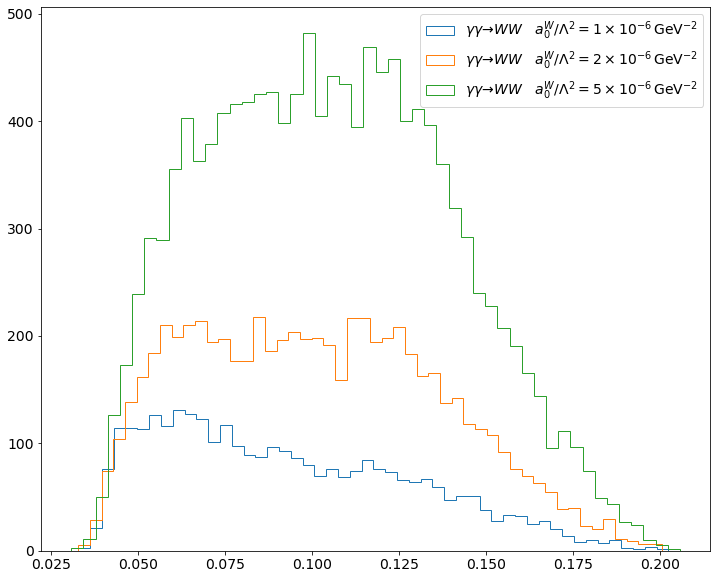

In [6]:
labels_samples = {
    "GGToWW-AQGC-A0W5e-7": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-7} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
    "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
}
labels_samples[ "GGToWW-AQGC-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = labels_samples[ "GGToWW-AQGC-A0W5e-7" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
labels_samples[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

if load_signal:
    fig = plt.figure( figsize=(12,10) )
    for label_ in labels_signals: 
        plt.hist( df_signals_protons_multiRP_index[ label_ ][ 'xi' ], histtype='step', density=False, bins=50, label=labels_samples[ label_ ] )
    plt.legend( loc='best', fontsize=14 )

### Ouf of acceptance protons

### Signal with mixed protons

In [7]:
labels_signals_mix_protons = []
if data_sample == '2017':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-A0W1e-6", "GGToWW-AQGC-mix_protons-A0W2e-6", "GGToWW-AQGC-mix_protons-A0W5e-6" ]
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6" ]
elif data_sample == '2018':
    if lepton_type == 'muon':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6" ]
    elif lepton_type == 'electron':
#         labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7", "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
        labels_signals_mix_protons = [ "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6", "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6" ]
df_counts_signals_mix_protons = {}
df_signals_protons_multiRP_mix_protons_index = {}
df_signals_protons_multiRP_mix_protons_events = {}
if load_signal:
    base_path_ = "output"
    for label_ in labels_signals_mix_protons:
        print ( label_ )
        file_path_ = "{}/data-store-{}.h5".format( base_path_, label_ )
        with pd.HDFStore( file_path_, 'r' ) as store_:
            print ( list( store_ ) )
            df_counts_signals_mix_protons[ label_ ] = store_[ "counts" ]
            df_signals_protons_multiRP_mix_protons_index[ label_ ] = store_[ "protons_multiRP" ]
            df_signals_protons_multiRP_mix_protons_events[ label_ ] = store_[ "events_multiRP" ]

GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6
['/counts', '/events_multiRP', '/protons_multiRP']
GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6
['/counts', '/events_multiRP', '/protons_multiRP']


In [8]:
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_index[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6' ]
# df_signals_protons_multiRP_mix_protons_events[ 'GGToWW-AQGC-mix_protons-2018-electron-A0W5e-7' ]
label_ref_ = ""
if data_sample == '2017':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6'
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6'
    elif lepton_type == 'electron':
        label_ref_ = 'GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6'
df_signals_protons_multiRP_mix_protons_events[ label_ref_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    109       1087  17131802332494696354 0              130.0       0.4   
    169       1689  6907600029324167612  0              138.0       0.4   
    1171      11705 15101903612985965066 0              138.0       0.4   
    1495      14941 10492610739713160083 0              138.0       0.4   
...                                                       ...       ...   
    9292      92914 8991196666050499818  0              158.0       0.4   
    9315      93145 13804778771917431660 0              153.0       0.4   
    9726      97256 3450513467788037885  0              152.0       0.4   
    9801      98010 1212705756648802189  0              152.0       0.4   
    9894      98933 412653800162893373   0              157.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    109       1087  17131802332494696354 0           0.0  247.038254   
    169       1689  6907600029324167612  0           0.0  786.828735   
    1171      11705 15101903612985965066 0           0.0  970.521362   
    1495      14941 10492610739713160083 0           0.0  280.733612   
...                                                  ...         ...   
    9292      92914 8991196666050499818  0           0.0  463.928131   
    9315      93145 13804778771917431660 0           0.0  311.160187   
    9726      97256 3450513467788037885  0           0.0  216.590210   
    9801      98010 1212705756648802189  0           0.0  296.201324   
    9894      98933 412653800162893373   0           0.0  303.460114   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    109       1087  17131802332494696354 0      1.403882 -2.276454   
    169       1689  6907600029324167612  0      0.888920 -1.119034   
    1171      11705 15101903612985965066 0     -0.139592 -2.487285   
    1495      14941 10492610739713160083 0     -0.748187 -2.739022   
...                                                  ...       ...   
    9292      92914 8991196666050499818  0     -0.329733  2.987611   
    9315      93145 13804778771917431660 0     -0.670576 -1.477166   
    9726      97256 3450513467788037885  0      1.863698 -2.890961   
    9801      98010 1212705756648802189  0     -1.388440 -2.452848   
    9894      98933 412653800162893373   0      1.097416 -2.882606   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    109       1087  17131802332494696354 0       542.039185  72.382683   
    169       1689  6907600029324167612  0      1127.200195  69.586273   
    1171      11705 15101903612985965066 0       985.998718  40.548241   
    1495      14941 10492610739713160083 0       371.739685  69.580391   
...                                                     ...        ...   
    9292      92914 8991196666050499818  0       498.903839  75.917595   
    9315      93145 13804778771917431660 0       394.857422  73.951088   
    9726      97256 3450513467788037885  0       722.120361  90.661079   
    9801      98010 1212705756648802189  0       637.209167  69.551064   
    9894      98933 412653800162893373   0       515.766174  67.655952   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    109       1087

In [9]:
# label_signal_to_mix_protons = {
#     "GGToWW-AQGC-A0W1e-6" : "GGToWW-AQGC-mix_protons-A0W1e-6",
#     "GGToWW-AQGC-A0W2e-6" : "GGToWW-AQGC-mix_protons-A0W2e-6",
#     "GGToWW-AQGC-A0W5e-6" : "GGToWW-AQGC-mix_protons-A0W5e-6",
#     "GGToWW-AQGC-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-muon-A0W1e-6",
#     "GGToWW-AQGC-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-muon-A0W2e-6",
#     "GGToWW-AQGC-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-muon-A0W5e-6",
#     "GGToWW-AQGC-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-electron-A0W1e-6",
#     "GGToWW-AQGC-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-electron-A0W2e-6",
#     "GGToWW-AQGC-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-electron-A0W5e-6",
#     "GGToWW-AQGC-2017-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W1e-6",
#     "GGToWW-AQGC-2017-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W2e-6",
#     "GGToWW-AQGC-2017-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-2017-muon-A0W5e-6",
#     "GGToWW-AQGC-2017-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W1e-6",
#     "GGToWW-AQGC-2017-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W2e-6",
#     "GGToWW-AQGC-2017-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-2017-electron-A0W5e-6",
#     "GGToWW-AQGC-2018-muon-A0W1e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W1e-6",
#     "GGToWW-AQGC-2018-muon-A0W2e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W2e-6",
#     "GGToWW-AQGC-2018-muon-A0W5e-6" : "GGToWW-AQGC-mix_protons-2018-muon-A0W5e-6",
#     "GGToWW-AQGC-2018-electron-A0W1e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W1e-6",
#     "GGToWW-AQGC-2018-electron-A0W2e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W2e-6",
#     "GGToWW-AQGC-2018-electron-A0W5e-6" : "GGToWW-AQGC-mix_protons-2018-electron-A0W5e-6"
# }

### Signal with event mixing

In [10]:
df_signals_protons_multiRP_sig_plus_mix_2protons_events = {}
df_signals_protons_multiRP_sig_plus_mix_events_categories = {}
base_path_ = "output"
for label_ in labels_signals:
    print ( label_ )
    file_path_ = "{}/data-store-signal-plus-mix-events-{}.h5".format( base_path_, label_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ] = store_[ "/events_multiRP/all" ]
        df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ] = {}
        for key_ in [ '2protons_sig', '1proton_sig_Arm0', '1proton_sig_Arm1', '2protons_mix' ]:
            print ( key_ )
            df_protons_multiRP_events__ = store_[ "events_multiRP/{}".format( key_ ) ]
            df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ key_ ] = df_protons_multiRP_events__

GGToWW-AQGC-2018-muon-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


In [11]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
# columns__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values
# columns_electron__ = columns__[ [ key_.find( "electron" ) >= 0 for key_ in columns__ ] ]
# df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ][ columns_electron__ ]
df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   6         53    6825647035728931565  0              135.0       0.4   
    18        175   8328339178254842181  0              131.0       0.4   
    25        246   6732049695921593490  0              133.0       0.4   
    38        372   7074991263971531930  0              152.0       0.4   
    40        397   17437731705066552538 0              155.0       0.4   
...                                                       ...       ...   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9973      99729 13919042447111572976 0              147.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   
    9999      99990 10105934940058465847 0              146.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   6         53    6825647035728931565  0           0.0  1210.999023   
    18        175   8328339178254842181  0           0.0   847.566895   
    25        246   6732049695921593490  0           0.0   569.114075   
    38        372   7074991263971531930  0           0.0   231.936005   
    40        397   17437731705066552538 0           0.0   240.425400   
...                                                  ...          ...   
    9967      99661 9457232060636232257  0           0.0   292.841248   
    9971      99701 15913202775396096505 0           0.0   262.650391   
    9973      99729 13919042447111572976 0           0.0   388.434906   
    9997      99969 7562332171816749490  0           0.0   664.096069   
    9999      99990 10105934940058465847 0           0.0   533.748901   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   6         53    6825647035728931565  0      0.004082  0.405958   
    18        175   8328339178254842181  0      0.280867 -1.283158   
    25        246   6732049695921593490  0      1.052705  2.353809   
    38        372   7074991263971531930  0     -0.483900 -2.231769   
    40        397   17437731705066552538 0     -0.490470 -1.088258   
...                                                  ...       ...   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9973      99729 13919042447111572976 0      0.018310  1.407828   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   
    9999      99990 10105934940058465847 0     -0.870574 -0.769562   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   6         53    6825647035728931565  0      1217.077393   77.872375   
    18        175   8328339178254842181  0       888.046204   78.547112   
    25        246   6732049695921593490  0       927.567322  103.537247   
    38        372   7074991263971531930  0       264.667664   38.101234   
    40        397   17437731705066552538 0       285.937347   84.732925   
...                                                     ...         ...   
    9967      99661 9457232060636232257  0       567.241943   59.175003   
    9971      99701 15913202775396096505 0       773.146790   68.773056   
    9973      99729 13919042447111572976 0       401.697418   83.973335   
    9997      99969 7562332171816749490  0       888.332031   71.488083   
    9999      99990 10105934940058465847 0       757.882935   92.243652   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   6         53    6825647035728931565  0          82.568321   0.069947 

In [12]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_sig' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0              133.0       0.4   
    48        473   8749266920161569861  0              148.0       0.4   
    64        636   1889158458402674605  0              130.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    77        762   898270863651217580   0              148.0       0.4   
...                                                       ...       ...   
    9915      99148 9027171743398588963  0              153.0       0.4   
    9917      99167 7037532472275048024  0              148.0       0.4   
    9921      99203 4631958745543777280  0              154.0       0.4   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   25        246   6732049695921593490  0           0.0  569.114075   
    48        473   8749266920161569861  0           0.0  376.204132   
    64        636   1889158458402674605  0           0.0  274.994659   
    71        706   10284919335476110625 0           0.0  568.194763   
    77        762   898270863651217580   0           0.0  241.249664   
...                                                  ...         ...   
    9915      99148 9027171743398588963  0           0.0  775.930786   
    9917      99167 7037532472275048024  0           0.0  603.757324   
    9921      99203 4631958745543777280  0           0.0  884.458496   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   25        246   6732049695921593490  0      1.052705  2.353809   
    48        473   8749266920161569861  0      0.305124  3.095006   
    64        636   1889158458402674605  0      0.914896 -1.320226   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    77        762   898270863651217580   0     -0.617383  0.646603   
...                                                  ...       ...   
    9915      99148 9027171743398588963  0     -0.809761 -1.105224   
    9917      99167 7037532472275048024  0      0.529868  0.767814   
    9921      99203 4631958745543777280  0      0.401107  1.897298   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   

                                                jet0_energy   jet0_mass  \
run lumiblock event hash_id              slice                            
1   25        246   6732049695921593490  0       927.567322  103.537247   
    48        473   8749266920161569861  0       396.210815    8.142470   
    64        636   1889158458402674605  0       408.026917   74.735039   
    71        706   10284919335476110625 0      1031.590454   67.864975   
    77        762   898270863651217580   0       294.636505   39.659046   
...                                                     ...         ...   
    9915      99148 9027171743398588963  0      1050.636108   11.372771   
    9917      99167 7037532472275048024  0       699.042664   77.520233   
    9921      99203 4631958745543777280  0       965.082642   77.655876   
    9958      99577 8240557362429832909  0       574.826660   68.721405   
    9967      99661 9457232060636232257  0       567.241943   59.175003   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   25        246   6732049695921593490  0         114.010490   0.172032  ...   
    4

In [13]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm0' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   109       1087  17131802332494696354 0              130.0       0.4   
    246       2458  9693195791745234741  0              155.0       0.4   
    290       2897  16622496725242342890 0              143.0       0.4   
    293       2922  10277676036891930169 0              130.0       0.4   
    296       2952  16254817888070390942 0              151.0       0.4   
...                                                       ...       ...   
    9872      98713 8407378010332173941  0              130.0       0.4   
    9894      98933 412653800162893373   0              157.0       0.4   
    9953      99524 14376392392808545526 0              154.0       0.4   
    9973      99729 13919042447111572976 0              147.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   109       1087  17131802332494696354 0           0.0  247.038254   
    246       2458  9693195791745234741  0           0.0  484.041595   
    290       2897  16622496725242342890 0           0.0  300.273102   
    293       2922  10277676036891930169 0           0.0  613.915283   
    296       2952  16254817888070390942 0           0.0  208.472473   
...                                                  ...         ...   
    9872      98713 8407378010332173941  0           0.0  882.710327   
    9894      98933 412653800162893373   0           0.0  303.460114   
    9953      99524 14376392392808545526 0           0.0  274.328888   
    9973      99729 13919042447111572976 0           0.0  388.434906   
    9997      99969 7562332171816749490  0           0.0  664.096069   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   109       1087  17131802332494696354 0      1.403882 -2.276454   
    246       2458  9693195791745234741  0     -0.701228 -0.797058   
    290       2897  16622496725242342890 0      0.810910 -2.972758   
    293       2922  10277676036891930169 0      0.304537 -1.264266   
    296       2952  16254817888070390942 0      1.040312  2.663574   
...                                                  ...       ...   
    9872      98713 8407378010332173941  0      0.206480 -0.686665   
    9894      98933 412653800162893373   0      1.097416 -2.882606   
    9953      99524 14376392392808545526 0     -2.043363  0.083659   
    9973      99729 13919042447111572976 0      0.018310  1.407828   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   109       1087  17131802332494696354 0       542.039185  72.382683   
    246       2458  9693195791745234741  0       615.766724  69.372162   
    290       2897  16622496725242342890 0       416.408997  79.240852   
    293       2922  10277676036891930169 0       651.940979  80.726379   
    296       2952  16254817888070390942 0       332.857086   9.972991   
...                                                     ...        ...   
    9872      98713 8407378010332173941  0       908.499634  76.034370   
    9894      98933 412653800162893373   0       515.766174  67.655952   
    9953      99524 14376392392808545526 0      1080.821045  72.518951   
    9973      99729 13919042447111572976 0       401.697418  83.973335   
    9997      99969 7562332171816749490  0       888.332031  71.488083   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   109       1087  17131802332494696354 0          81.240952   0.383051  ...   
    246       2458

In [14]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '1proton_sig_Arm1' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   38        372   7074991263971531930  0              152.0       0.4   
    124       1233  6536639404599796013  0              135.0       0.4   
    165       1650  13726474429463143053 0              144.0       0.4   
    201       2008  11330427090140904554 0              152.0       0.4   
    223       2230  17622434151468663538 0              154.0       0.4   
...                                                       ...       ...   
    9940      99395 14983453426579438677 0              152.0       0.4   
    9953      99528 13519198747198453932 0              154.0       0.4   
    9956      99555 14381975697598531283 0              146.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9999      99990 10105934940058465847 0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   38        372   7074991263971531930  0           0.0  231.936005   
    124       1233  6536639404599796013  0           0.0  801.062378   
    165       1650  13726474429463143053 0           0.0  236.331039   
    201       2008  11330427090140904554 0           0.0  240.045715   
    223       2230  17622434151468663538 0           0.0  489.645752   
...                                                  ...         ...   
    9940      99395 14983453426579438677 0           0.0  650.529358   
    9953      99528 13519198747198453932 0           0.0  329.018707   
    9956      99555 14381975697598531283 0           0.0  852.316650   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9999      99990 10105934940058465847 0           0.0  533.748901   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   38        372   7074991263971531930  0     -0.483900 -2.231769   
    124       1233  6536639404599796013  0     -0.546878  1.829652   
    165       1650  13726474429463143053 0     -0.571287 -3.083655   
    201       2008  11330427090140904554 0      2.019294 -2.719273   
    223       2230  17622434151468663538 0     -0.017708 -0.924433   
...                                                  ...       ...   
    9940      99395 14983453426579438677 0      0.766960 -0.985204   
    9953      99528 13519198747198453932 0      1.548714 -0.414312   
    9956      99555 14381975697598531283 0     -0.247024 -2.180367   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9999      99990 10105934940058465847 0     -0.870574 -0.769562   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   38        372   7074991263971531930  0       264.667664  38.101234   
    124       1233  6536639404599796013  0       931.254028  59.136368   
    165       1650  13726474429463143053 0       282.181793  21.002552   
    201       2008  11330427090140904554 0       923.211670  61.951199   
    223       2230  17622434151468663538 0       499.537903  17.192255   
...                                                     ...        ...   
    9940      99395 14983453426579438677 0       857.561890  74.569267   
    9953      99528 13519198747198453932 0       811.648438   4.267572   
    9956      99555 14381975697598531283 0       884.239990  74.979774   
    9971      99701 15913202775396096505 0       773.146790  68.773056   
    9999      99990 10105934940058465847 0       757.882935  92.243652   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   38        372   7074991263971531930  0          40.902069   0.147845  ...   
    124       1233

In [15]:
df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ '2protons_mix' ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   6         53    6825647035728931565  0              135.0       0.4   
    18        175   8328339178254842181  0              131.0       0.4   
    40        397   17437731705066552538 0              155.0       0.4   
    83        830   8807773939974881238  0              150.0       0.4   
    85        850   13195437736501201655 0              150.0       0.4   
...                                                       ...       ...   
    9763      97630 8161283075024064321  0              147.0       0.4   
    9766      97657 6023720854239068837  0              130.0       0.4   
    9774      97734 7234795352533634211  0              147.0       0.4   
    9780      97800 10673312602691681834 0              148.0       0.4   
    9858      98572 3332384721210870519  0              152.0       0.4   

                                                instLumi      jet0_pt  \
run lumiblock event hash_id              slice                          
1   6         53    6825647035728931565  0           0.0  1210.999023   
    18        175   8328339178254842181  0           0.0   847.566895   
    40        397   17437731705066552538 0           0.0   240.425400   
    83        830   8807773939974881238  0           0.0   364.196838   
    85        850   13195437736501201655 0           0.0   206.409073   
...                                                  ...          ...   
    9763      97630 8161283075024064321  0           0.0   489.171875   
    9766      97657 6023720854239068837  0           0.0   881.397827   
    9774      97734 7234795352533634211  0           0.0   247.871078   
    9780      97800 10673312602691681834 0           0.0   780.387390   
    9858      98572 3332384721210870519  0           0.0   930.729126   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   6         53    6825647035728931565  0      0.004082  0.405958   
    18        175   8328339178254842181  0      0.280867 -1.283158   
    40        397   17437731705066552538 0     -0.490470 -1.088258   
    83        830   8807773939974881238  0      1.708590  1.917470   
    85        850   13195437736501201655 0      1.716915  0.627429   
...                                                  ...       ...   
    9763      97630 8161283075024064321  0      0.466465 -0.092030   
    9766      97657 6023720854239068837  0      0.104805 -2.577899   
    9774      97734 7234795352533634211  0      0.486896 -2.894165   
    9780      97800 10673312602691681834 0     -0.246050 -2.749654   
    9858      98572 3332384721210870519  0     -0.884130  2.435350   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   6         53    6825647035728931565  0      1217.077393  77.872375   
    18        175   8328339178254842181  0       888.046204  78.547112   
    40        397   17437731705066552538 0       285.937347  84.732925   
    83        830   8807773939974881238  0      1043.900757  61.207825   
    85        850   13195437736501201655 0       597.075928  55.036816   
...                                                     ...        ...   
    9763      97630 8161283075024064321  0       549.961975  13.040299   
    9766      97657 6023720854239068837  0       895.385437  74.653297   
    9774      97734 7234795352533634211  0       292.811737  84.030197   
    9780      97800 10673312602691681834 0       812.110596  76.257553   
    9858      98572 3332384721210870519  0      1325.288330  68.972054   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   6         53    6825647035728931565  0          82.568321   0.069947  ...   
    1

### Select events

In [16]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories = {}

variations_ = { "jet": [ "_jes_up", "_jes_dw", "_jer_up", "_jer_dw" ] }
for label_ in labels_signals:
    print ( label_ )
    df_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ]
    print ( df_events__.shape[0] )
#     df_selected_events__, selection_keys__, selections__  = select_events( df_events__ )
    df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
    print ( df_selected_events__.shape[0] )
    print ( selection_keys__ )
    print ( selections__ )
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ] = df_selected_events__
    for var_label__ in variations_:
        print ( var_label__ )
        for variation__ in variations_[ var_label__ ]:
            opt__ = { "label_" + var_label__ : variation__ }
            print ( opt__ )
            df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
            print ( df_selected_events__.shape[0] )
            print ( selection_keys__ )
            print ( selections__ )
            df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ] = df_selected_events__
            
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ] = {}
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ]:
        print ( cat__ )
        df_events__ = df_signals_protons_multiRP_sig_plus_mix_events_categories[ label_ ][ cat__ ]
        print ( df_events__.shape[0] )
        df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type )
        print ( df_selected_events__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ] = {}
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ "_nom" ] = df_selected_events__
        for var_label__ in variations_:
            print ( var_label__ )
            for variation__ in variations_[ var_label__ ]:
                opt__ = { "label_" + var_label__ : variation__ }
                print ( opt__ )
                df_selected_events__, selection_keys__, selections__  = select_events( df_events__, lepton_type, **opt__ )
                print ( df_selected_events__.shape[0] )
                print ( selection_keys__ )
                print ( selections__ )
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ] = df_selected_events__

GGToWW-AQGC-2018-muon-A0W1e-6
1503
606
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1503, 'Muon': 1503, 'Jet': 1385, 'Jet_Muon': 1385, 'MET': 1286, 'Jet_MET': 1243, 'PrunedMass': 937, 'Tau21': 865, 'BJet_Veto': 865, 'Xi_CMS': 813, 'WLeptonic': 807, 'Jet_WLeptonic': 807, 'MWW': 802, 'ExtraTracks': 606}
jet
{'label_jet': '_jes_up'}
603
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 1503, 'Muon': 1503, 'Jet': 1396, 'Jet_Muon': 1396, 'MET': 1295, 'Jet_MET': 1252, 'PrunedMass': 941, 'Tau21': 869, 'BJet_Veto': 869, 'Xi_CMS': 814, 'WLeptonic': 805, 'Jet_WLeptonic': 805, 'MWW': 799, 'ExtraTracks': 603}
{'label_jet': '_jes_dw'}
608
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraT

1504
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3374, 'Muon': 3374, 'Jet': 3255, 'Jet_Muon': 3255, 'MET': 3017, 'Jet_MET': 2920, 'PrunedMass': 2320, 'Tau21': 2129, 'BJet_Veto': 2129, 'Xi_CMS': 1984, 'WLeptonic': 1974, 'Jet_WLeptonic': 1974, 'MWW': 1969, 'ExtraTracks': 1504}
jet
{'label_jet': '_jes_up'}
1492
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 3374, 'Muon': 3374, 'Jet': 3265, 'Jet_Muon': 3265, 'MET': 3025, 'Jet_MET': 2927, 'PrunedMass': 2326, 'Tau21': 2132, 'BJet_Veto': 2132, 'Xi_CMS': 1972, 'WLeptonic': 1961, 'Jet_WLeptonic': 1961, 'MWW': 1955, 'ExtraTracks': 1492}
{'label_jet': '_jes_dw'}
1508
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 

3157
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7115, 'Muon': 7115, 'Jet': 7022, 'Jet_Muon': 7022, 'MET': 6543, 'Jet_MET': 6321, 'PrunedMass': 4935, 'Tau21': 4486, 'BJet_Veto': 4486, 'Xi_CMS': 4119, 'WLeptonic': 4112, 'Jet_WLeptonic': 4112, 'MWW': 4109, 'ExtraTracks': 3157}
{'label_jet': '_jes_dw'}
3185
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7115, 'Muon': 7115, 'Jet': 7005, 'Jet_Muon': 7005, 'MET': 6529, 'Jet_MET': 6309, 'PrunedMass': 4926, 'Tau21': 4478, 'BJet_Veto': 4478, 'Xi_CMS': 4152, 'WLeptonic': 4147, 'Jet_WLeptonic': 4147, 'MWW': 4144, 'ExtraTracks': 3185}
{'label_jet': '_jer_up'}
3162
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 7115

In [17]:
import json
samples_info = None
if data_sample == '2017':
    samples_info = json.load( open( 'samples_info_2017.json' ) )
elif data_sample == '2018':
#     samples_info = json.load( open( 'samples_info_2018.json' ) )
    samples_info = json.load( open( 'samples_info_UL.json' ) )
samples_info

{'FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0': [100000.0, 0.058313, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_5e-6_semi_pt0': [100000.0, 0.049199, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0': [100000.0, 0.148122, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_8e-6_semi_pt0': [100000.0, 0.061404, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_0_semi_pt0': [262999.0, 0.0409705, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0': [100000.0, 0.045393, 1.0, 6],
 'FPMC_WW_bSM_13tev_a0w_0_aCw_2e-5_semi_pt0': [99000.0, 0.16477, 1.0, 6]}

In [18]:
lumi_periods = None
if data_sample == '2017':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2017[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2017[ 'electron' ]
elif data_sample == '2018':
    if lepton_type == 'muon':
        lumi_periods = lumi_periods_2018[ 'muon' ]
    elif lepton_type == 'electron':
        lumi_periods = lumi_periods_2018[ 'electron' ]
    
lumi = np.sum( list( lumi_periods.values() ) )
print ( lumi )

#labels_signals = [ "GGToWW-AQGC-test-A0W1e-6", "GGToWW-AQGC-test-A0W2e-6", "GGToWW-AQGC-test-A0W5e-6" ]
sample_names = {}
if data_sample == '2017':
#     sample_names[ "GGToWW-AQGC-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
#     sample_names[ "GGToWW-AQGC-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6"
    sample_names[ "GGToWW-AQGC-2017-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6"
elif data_sample == '2018':
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = "GGToWW_bSM-A0W5e-7_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "GGToWW_bSM-A0W1e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "GGToWW_bSM-A0W2e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "GGToWW_bSM-A0W5e-6_13TeV-fpmc-herwig6-2018"
#     sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-muon-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-muon-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
#     sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-7" ] = ""
    sample_names[ "GGToWW-AQGC-2018-electron-A0W1e-6" ] = "FPMC_WW_bSM_13tev_a0w_1e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W2e-6" ] = "FPMC_WW_bSM_13tev_a0w_2e-6_aCw_0_semi_pt0"
    sample_names[ "GGToWW-AQGC-2018-electron-A0W5e-6" ] = "FPMC_WW_bSM_13tev_a0w_5e-6_aCw_0_semi_pt0"
    
norm_factors = {}
for label_ in labels_signals:
    print ( label_ )
    print ( samples_info[ sample_names[ label_ ] ] )
    sample_nevents_, sample_cross_section_, sel_eff_, _ = samples_info[ sample_names[ label_ ] ]
    sample_cross_section_ = sample_cross_section_ * sel_eff_
    if norm_to_1fb:
        sample_cross_section_ = 1.e-03
#     if data_sample == '2018':
#         sample_cross_section_ *= ( 0.14271*(1.174) )
    print ( sample_cross_section_ )
    norm_factors[ label_ ] = np.array( [ lumi / ( sample_nevents_ ), sample_cross_section_*1000, 1.0 ] )
    print ( norm_factors[ label_ ] )
    norm_factors_product_ = np.product( norm_factors[ label_ ] )
#     df_signals_protons_multiRP_events[ label_ ].loc[ :, "norm" ] = norm_factors_product_
    df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ].loc[ :, "norm" ] = norm_factors_product_
    for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
        print ( variation__ )
        df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        print ( cat__ )
#     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#         print ( cat__ )
#         df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ].loc[ :, "norm" ] = norm_factors_product_
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            print ( variation__ )
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ].loc[ :, "norm" ] = norm_factors_product_

55.662413858200004
GGToWW-AQGC-2018-muon-A0W1e-6
[100000.0, 0.045393, 1.0, 6]
0.045393
[5.56624139e-04 4.53930000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W2e-6
[100000.0, 0.058313, 1.0, 6]
0.058313
[5.56624139e-04 5.83130000e+01 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm1
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_mix
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
GGToWW-AQGC-2018-muon-A0W5e-6
[100000.0, 0.148122, 1.0, 6]
0.148122
[5.56624139e-04 1.48122000e+02 1.00000000e+00]
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
2protons_sig
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1proton_sig_Arm0
_nom
_jes_up
_jes_dw
_jer_up
_jer_dw
1prot

/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [19]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
print ( df_signals_protons_multiRP_sig_plus_mix_2protons_events[ label_ ].columns.values )

['crossingAngle' 'betaStar' 'instLumi' 'jet0_pt' 'jet0_eta' 'jet0_phi'
 'jet0_energy' 'jet0_mass' 'jet0_corrmass' 'jet0_tau1' 'jet0_tau2'
 'jet0_vertexz' 'jet0_px' 'jet0_py' 'jet0_pz' 'calo_met' 'met' 'met_x'
 'met_y' 'met_phi' 'nVertices' 'num_bjets_ak8' 'num_bjets_ak4'
 'num_jets_ak4' 'pfcand_nextracks' 'pfcand_nextracks_noDRl' 'recoMWhad'
 'recoMWlep' 'recoMWW' 'recoRapidityWW' 'dphiWW' 'WLeptonicPt'
 'WLeptonicEta' 'WLeptonicPhi' 'muon0_pt' 'muon0_eta' 'muon0_phi'
 'muon0_energy' 'muon0_charge' 'muon0_iso' 'muon0_dxy' 'muon0_dz'
 'muon0_trackerLayersWithMeasurement' 'run_mc' 'pileupWeight'
 'mc_pu_trueinteractions' 'mcWeight' 'jet0_jer_res' 'jet0_jer_sf'
 'jet0_jer_sfup' 'jet0_jer_sfdown' 'jet0_cjer' 'jet0_cjer_up'
 'jet0_cjer_down' 'met_ptJER_Up' 'met_ptJER_Down' 'met_phiJER_Up'
 'met_phiJER_Down' 'met_ptJES_Up' 'met_ptJES_Down' 'met_phiJES_Up'
 'met_phiJES_Down' 'gen_jet0_pt' 'gen_jet0_eta' 'gen_jet0_phi'
 'gen_jet0_energy' 'gen_muon0_pt' 'gen_muon0_eta' 'gen_muon0_phi'
 'gen_muo

In [20]:
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_jes_up" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    83        830   8807773939974881238  0              150.0       0.4   
    124       1233  6536639404599796013  0              135.0       0.4   
    169       1686  9913373879268043314  0              138.0       0.4   
...                                                       ...       ...   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   
    9999      99990 10105934940058465847 0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    71        706   10284919335476110625 0           0.0  568.194763   
    83        830   8807773939974881238  0           0.0  364.196838   
    124       1233  6536639404599796013  0           0.0  801.062378   
    169       1686  9913373879268043314  0           0.0  734.161011   
...                                                  ...         ...   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9997      99969 7562332171816749490  0           0.0  664.096069   
    9999      99990 10105934940058465847 0           0.0  533.748901   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    83        830   8807773939974881238  0      1.708590  1.917470   
    124       1233  6536639404599796013  0     -0.546878  1.829652   
    169       1686  9913373879268043314  0     -1.005368 -2.404479   
...                                                  ...       ...   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   
    9999      99990 10105934940058465847 0     -0.870574 -0.769562   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    83        830   8807773939974881238  0      1043.900757  61.207825   
    124       1233  6536639404599796013  0       931.254028  59.136368   
    169       1686  9913373879268043314  0      1143.112183  71.326271   
...                                                     ...        ...   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   
    9997      99969 7562332171816749490  0       888.332031  71.488083   
    9999      99990 10105934940058465847 0       757.882935  92.243652   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    71        706 

In [21]:
var_name__ = ""
if lepton_type == 'muon':
    var_name__ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name__ = "sf_electron_id"
var_name_up__ = var_name__ + "_up"
var_name_dw__ = var_name__ + "_dw"

df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ '2protons_sig' ][ "_nom" ][ [ var_name__, var_name_up__, var_name_dw__ ] ]

sf_muon_id  sf_muon_id_up  \
run lumiblock event hash_id              slice                              
1   71        706   10284919335476110625 0        0.990580       0.993182   
    241       2410  7852918816888529788  0        0.990580       0.993182   
    301       3008  8473333272413352264  0        0.990780       0.991823   
    457       4565  16890764284145850910 0        0.990580       0.993182   
    487       4862  12160033784165724945 0        0.991686       0.992334   
...                                                    ...            ...   
    9769      97682 3629188191985195522  0        0.990580       0.993182   
    9801      98010 1212705756648802189  0        0.990580       0.993182   
    9917      99167 7037532472275048024  0        0.990580       0.993182   
    9958      99577 8240557362429832909  0        0.990580       0.993182   
    9967      99661 9457232060636232257  0        0.990580       0.993182   

                                                sf_muon_id_dw  
run lumiblock event hash_id              slice                 
1   71        706   10284919335476110625 0           0.987978  
    241       2410  7852918816888529788  0           0.987978  
    301       3008  8473333272413352264  0           0.989736  
    457       4565  16890764284145850910 0           0.987978  
    487       4862  12160033784165724945 0           0.991038  
...                                                       ...  
    9769      97682 3629188191985195522  0           0.987978  
    9801      98010 1212705756648802189  0           0.987978  
    9917      99167 7037532472275048024  0           0.987978  
    9958      99577 8240557362429832909  0           0.987978  
    9967      99661 9457232060636232257  0           0.987978  

[152 rows x 3 columns]

In [22]:
variations_weights_ = [ "nom" ]

if lepton_type == 'muon':
    variations_weights_sf_muon_id_ = [ "sf_muon_id_up", "sf_muon_id_dw" ]
    variations_weights_.extend( variations_weights_sf_muon_id_ )
elif lepton_type == 'electron':
    variations_weights_sf_electron_id_ = [ "sf_electron_id_up", "sf_electron_id_dw" ]
    variations_weights_.extend( variations_weights_sf_electron_id_ )

variations_weights_proton_eff_ = [ "proton_eff_up", "proton_eff_dw" ]
variations_weights_.extend( variations_weights_proton_eff_ )

var_names_sf_lepton_id__ = {}
if lepton_type == 'muon':
    for key_ in [ "nom", "proton_eff_up", "proton_eff_dw" ]: var_names_sf_lepton_id__[ key_ ] = "sf_muon_id"
    var_names_sf_lepton_id__[ "sf_muon_id_up" ] = "sf_muon_id_up"
    var_names_sf_lepton_id__[ "sf_muon_id_dw" ] = "sf_muon_id_dw"
elif lepton_type == 'electron':
    for key_ in [ "nom", "proton_eff_up", "proton_eff_dw" ]: var_names_sf_lepton_id__[ key_ ] = "sf_electron_id"
    var_names_sf_lepton_id__[ "sf_electron_id_up" ] = "sf_electron_id_up"
    var_names_sf_lepton_id__[ "sf_electron_id_dw" ] = "sf_electron_id_dw"
    
var_names_proton_eff__ = {}
var_names_proton_eff__[ "proton_eff_up" ] = "eff_proton_var_up"
var_names_proton_eff__[ "proton_eff_dw" ] = "eff_proton_var_dw"

print ( variations_weights_ )
print ( var_names_sf_lepton_id__ )
print ( var_names_proton_eff__)

weights_mc = {}
weights_sig_plus_mix_2protons = {}
weights_sig_plus_mix_categories = {}
# weights_out_acceptance_misreconstructed = {}
for label_ in labels_signals:
    print ( label_ )
    weights_mc[ label_ ] = {}
    weights_sig_plus_mix_2protons[ label_ ] = {}
    weights_sig_plus_mix_categories[ label_ ] = {}
    
    for var_weights_ in variations_weights_:
#         weights_mc[ label_ ][ var_weights_ ] = ( df_signals_protons_multiRP_events[ label_ ][ "norm" ] * 
#                                                  df_signals_protons_multiRP_events[ label_ ][ "pileupWeight" ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ var_names_sf_muon_id__[ var_weights_ ] ] *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_proton_all" ] *
#                                                  ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_signals_protons_multiRP_events[ label_ ][ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                  df_signals_protons_multiRP_events[ label_ ][ "eff_multitrack" ] )

    #     weights_sig_plus_mix_2protons[ label_ ] = ( df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "norm" ] * 
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "pileupWeight" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "sf_muon_id" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_proton_all" ] *
    #                                                 df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "eff_strictzero" ] )
        weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ] = {}
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ]:
            df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ variation__ ]
#             weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                        df_selected_events__[ "pileupWeight" ] *
#                                                                                        df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                        ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                        df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                       # df_selected_events__[ "pileupWeight" ] *
                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
            if data_sample == '2017':
                weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] = ( weights_sig_plus_mix_2protons[ label_ ][ var_weights_ ][ variation__ ] *
                                                                                           df_selected_events__[ "eff_strictzero" ] )


        weights_sig_plus_mix_categories[ label_ ][ var_weights_ ] = {}
        for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
            print ( cat__ )
    #         weights_sig_plus_mix_categories[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                               df_selected_events__[ "pileupWeight" ] *
    #                                                               df_selected_events__[ "sf_muon_id" ] *
    #                                                               df_selected_events__[ "eff_proton_all" ] *
    #                                                               df_selected_events__[ "eff_strictzero" ] )
            weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ] = {}
            for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
                df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
#                 weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
#                                                                                                       df_selected_events__[ "pileupWeight" ] *
#                                                                                                       df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
#                                                                                                       ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) *
#                                                                                                       df_selected_events__[ "eff_strictzero" ] )
                weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( df_selected_events__[ "norm" ] * 
                                                                                                      # df_selected_events__[ "pileupWeight" ] *
                                                                                                      df_selected_events__[ var_names_sf_lepton_id__[ var_weights_ ] ] *
                                                                                                      ( 1. if var_weights_ not in [ "proton_eff_up", "proton_eff_dw" ] else df_selected_events__[ var_names_proton_eff__[ var_weights_ ] ] ) )
                if data_sample == '2017':
                    weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] = ( weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ] *
                                                                                                          df_selected_events__[ "eff_strictzero" ] )

    #     weights_out_acceptance_misreconstructed[ label_ ] = {}
    #     for cat__ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
    #         print ( cat__ )
    #         df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ cat__ ]
    #         weights_out_acceptance_misreconstructed[ label_ ][ cat__ ] = ( df_selected_events__[ "norm" ] * 
    #                                                                       df_selected_events__[ "pileupWeight" ] *
    #                                                                       df_selected_events__[ "sf_muon_id" ] *
    #                                                                       df_selected_events__[ "eff_proton_all" ] *
    #                                                                       df_selected_events__[ "eff_multitrack" ] )
        
print ( weights_mc )
print ( weights_sig_plus_mix_2protons )
print ( weights_sig_plus_mix_categories )
# print ( weights_out_acceptance_misreconstructed )

['nom', 'sf_muon_id_up', 'sf_muon_id_dw', 'proton_eff_up', 'proton_eff_dw']
{'nom': 'sf_muon_id', 'proton_eff_up': 'sf_muon_id', 'proton_eff_dw': 'sf_muon_id', 'sf_muon_id_up': 'sf_muon_id_up', 'sf_muon_id_dw': 'sf_muon_id_dw'}
{'proton_eff_up': 'eff_proton_var_up', 'proton_eff_dw': 'eff_proton_var_dw'}
GGToWW-AQGC-2018-muon-A0W1e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W2e-6
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix
GGToWW-AQGC-2018-muon-A0W5e-6
2prot

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'nom': {'2protons_sig': {'_nom': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.025029
     241        2410   7852918816888529788   0        0.025029
     301        3008   8473333272413352264   0        0.025034
     457        4565   16890764284145850910  0        0.025029
     487        4862   12160033784165724945  0        0.025057
                                                        ...   
     9769       97682  3629188191985195522   0        0.025029
     9801       98010  1212705756648802189   0        0.025029
     9917       99167  7037532472275048024   0        0.025029
     9958       99577  8240557362429832909   0        0.025029
     9967       99661  9457232060636232257   0        0.025029
Length: 152, dtype: float64, '_jes_up': run  lumiblock  event  hash_id               slice
1    71         706    10284919335476110625  0        0.025029
     241        2410   78529188168

In [23]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat = {}
weights_sig_plus_mix_categories_concat = {}
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig = {}
weights_sig_plus_mix_categories_concat_skip_sig = {}
for label_ in labels_signals:
    print ( label_ )
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ] = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ] = {}
    weights_sig_plus_mix_categories_concat[ label_ ] = {}
    weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ] = {}
        weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ] = {}
        
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__ = {}
    df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__ = {}
    weights_sig_plus_mix_categories__ = {}
    weights_sig_plus_mix_categories_skip_sig__ = {}
    for var_weights_ in variations_weights_:
        weights_sig_plus_mix_categories__[ var_weights_ ] = {}
        weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ] = {}
    idx_cat__ = 0
    for cat__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
        for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ]:
            if idx_cat__ == 0:
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] = {}
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] = {}
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] = {}
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] = {}
            df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
            for var_weights_ in variations_weights_:
                weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
            if cat__ != '2protons_sig':
                df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ][ cat__ ] = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ cat__ ][ variation__ ]
                for var_weights_ in variations_weights_:
                    weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ][ cat__ ] = weights_sig_plus_mix_categories[ label_ ][ var_weights_ ][ cat__ ][ variation__ ]
        idx_cat__ += 1

    for variation__ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__:
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories__[ variation__ ] )
        df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ] = pd.concat( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_skip_sig__[ variation__ ] )
        for var_weights_ in variations_weights_:
            weights_sig_plus_mix_categories_concat[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories__[ var_weights_ ][ variation__ ] )
            weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights_ ][ variation__ ] = pd.concat( weights_sig_plus_mix_categories_skip_sig__[ var_weights_ ][ variation__ ] )
    
    print ( weights_sig_plus_mix_categories_concat[ label_ ] )
    print ( weights_sig_plus_mix_categories_concat_skip_sig[ label_ ] )

GGToWW-AQGC-2018-muon-A0W1e-6
{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    71         706    10284919335476110625  0        0.025029
                   241        2410   7852918816888529788   0        0.025029
                   301        3008   8473333272413352264   0        0.025034
                   457        4565   16890764284145850910  0        0.025029
                   487        4862   12160033784165724945  0        0.025057
                                                                      ...   
2protons_mix  1    9497       94965  5859068288287786174   0        0.024980
                   9576       95758  17875441366016360017  0        0.025029
                   9665       96646  12189891441617783283  0        0.025029
                   9729       97290  3512172073433529374   0        0.025029
                   9780       97800  10673312602691681834  0        0.025029
Length: 606, dtype: float64, '_jes_up':  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          1      6025467297070359873   0        0.032153
                   45         446    9545767841607825887   0        0.032153
                   52         518    8644475448256328373   0        0.032153
                   73         728    2472394711421382474   0        0.032153
                   130        1294   14314490683350305090  0        0.032153
                                                                      ...   
2protons_mix  1    9917       99166  15028844883329754556  0        0.032153
                   9918       99175  15035495112268086682  0        0.032153
                   9924       99240  3183345471687387505   0        0.032090
                   9933       99325  10212396484239542592  0        0.031864
                   9943       99421  18143743780543110552  0        0.032090
Length: 1504, dtype: float64, '_jes_up':               run  lumiblock  

{'nom': {'_nom':               run  lumiblock  event  hash_id               slice
2protons_sig  1    1          10     9311444988691148512   0        0.081672
                   14         132    13666057879713431447  0        0.081672
                   15         143    7678995466823194192   0        0.081672
                   21         208    13958284347534136226  0        0.080939
                   34         331    3010845467042626086   0        0.081672
                                                                      ...   
2protons_mix  1    9954       99537  5352622135451384903   0        0.080939
                   9962       99618  6683628433531259308   0        0.081511
                   9973       99722  7223909469649291273   0        0.081672
                   9988       99875  5747576075582420480   0        0.081672
                   9997       99964  3255649066454345609   0        0.081672
Length: 3173, dtype: float64, '_jes_up':               run  lumiblock  

In [24]:
# df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat = {}
# weights_out_acceptance_misreconstructed_concat = {}
# for label_ in labels_signals:
#     print ( label_ )
#     df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ] = pd.concat( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ] )
#     print ( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ].shape[0] )
#     weights_out_acceptance_misreconstructed_concat[ label_ ] = pd.concat( weights_out_acceptance_misreconstructed[ label_ ] )
#     print ( weights_out_acceptance_misreconstructed_concat[ label_ ] )

In [25]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
        
df_signals_protons_multiRP_sig_plus_mix_2protons_selected_events[ label_ ][ "_nom" ]

crossingAngle  betaStar  \
run lumiblock event hash_id              slice                            
1   18        175   8328339178254842181  0              131.0       0.4   
    71        706   10284919335476110625 0              147.0       0.4   
    83        830   8807773939974881238  0              150.0       0.4   
    124       1233  6536639404599796013  0              135.0       0.4   
    169       1686  9913373879268043314  0              138.0       0.4   
...                                                       ...       ...   
    9958      99577 8240557362429832909  0              152.0       0.4   
    9967      99661 9457232060636232257  0              155.0       0.4   
    9971      99701 15913202775396096505 0              140.0       0.4   
    9997      99969 7562332171816749490  0              142.0       0.4   
    9999      99990 10105934940058465847 0              146.0       0.4   

                                                instLumi     jet0_pt  \
run lumiblock event hash_id              slice                         
1   18        175   8328339178254842181  0           0.0  847.566895   
    71        706   10284919335476110625 0           0.0  568.194763   
    83        830   8807773939974881238  0           0.0  364.196838   
    124       1233  6536639404599796013  0           0.0  801.062378   
    169       1686  9913373879268043314  0           0.0  734.161011   
...                                                  ...         ...   
    9958      99577 8240557362429832909  0           0.0  504.915619   
    9967      99661 9457232060636232257  0           0.0  292.841248   
    9971      99701 15913202775396096505 0           0.0  262.650391   
    9997      99969 7562332171816749490  0           0.0  664.096069   
    9999      99990 10105934940058465847 0           0.0  533.748901   

                                                jet0_eta  jet0_phi  \
run lumiblock event hash_id              slice                       
1   18        175   8328339178254842181  0      0.280867 -1.283158   
    71        706   10284919335476110625 0     -1.195641 -2.794000   
    83        830   8807773939974881238  0      1.708590  1.917470   
    124       1233  6536639404599796013  0     -0.546878  1.829652   
    169       1686  9913373879268043314  0     -1.005368 -2.404479   
...                                                  ...       ...   
    9958      99577 8240557362429832909  0      0.494322  0.503134   
    9967      99661 9457232060636232257  0     -1.265395  0.370475   
    9971      99701 15913202775396096505 0     -1.735813 -1.747323   
    9997      99969 7562332171816749490  0     -0.790473  2.447591   
    9999      99990 10105934940058465847 0     -0.870574 -0.769562   

                                                jet0_energy  jet0_mass  \
run lumiblock event hash_id              slice                           
1   18        175   8328339178254842181  0       888.046204  78.547112   
    71        706   10284919335476110625 0      1031.590454  67.864975   
    83        830   8807773939974881238  0      1043.900757  61.207825   
    124       1233  6536639404599796013  0       931.254028  59.136368   
    169       1686  9913373879268043314  0      1143.112183  71.326271   
...                                                     ...        ...   
    9958      99577 8240557362429832909  0       574.826660  68.721405   
    9967      99661 9457232060636232257  0       567.241943  59.175003   
    9971      99701 15913202775396096505 0       773.146790  68.773056   
    9997      99969 7562332171816749490  0       888.332031  71.488083   
    9999      99990 10105934940058465847 0       757.882935  92.243652   

                                                jet0_corrmass  jet0_tau1  ...  \
run lumiblock event hash_id              slice                            ...   
1   18        175   8328339178254842181  0          83.604866   0.091997  ...   
    71        706 

In [26]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]

crossingAngle  \
             run lumiblock event hash_id              slice                  
2protons_sig 1   71        706   10284919335476110625 0              147.0   
                 241       2410  7852918816888529788  0              130.0   
                 301       3008  8473333272413352264  0              152.0   
                 457       4565  16890764284145850910 0              130.0   
                 487       4862  12160033784165724945 0              143.0   
...                                                                    ...   
2protons_mix 1   9497      94965 5859068288287786174  0              130.0   
                 9576      95758 17875441366016360017 0              130.0   
                 9665      96646 12189891441617783283 0              144.0   
                 9729      97290 3512172073433529374  0              150.0   
                 9780      97800 10673312602691681834 0              148.0   

                                                             betaStar  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.4   
                 241       2410  7852918816888529788  0           0.4   
                 301       3008  8473333272413352264  0           0.4   
                 457       4565  16890764284145850910 0           0.4   
                 487       4862  12160033784165724945 0           0.4   
...                                                               ...   
2protons_mix 1   9497      94965 5859068288287786174  0           0.4   
                 9576      95758 17875441366016360017 0           0.4   
                 9665      96646 12189891441617783283 0           0.4   
                 9729      97290 3512172073433529374  0           0.4   
                 9780      97800 10673312602691681834 0           0.4   

                                                             instLumi  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71        706   10284919335476110625 0           0.0   
                 241       2410  7852918816888529788  0           0.0   
                 301       3008  8473333272413352264  0           0.0   
                 457       4565  16890764284145850910 0           0.0   
                 487       4862  12160033784165724945 0           0.0   
...                                                               ...   
2protons_mix 1   9497      94965 5859068288287786174  0           0.0   
                 9576      95758 17875441366016360017 0           0.0   
                 9665      96646 12189891441617783283 0           0.0   
                 9729      97290 3512172073433529374  0           0.0   
                 9780      97800 10673312602691681834 0           0.0   

                                                                jet0_pt  \
             run lumiblock event hash_id              slice               
2protons_sig 1   71        706   10284919335476110625 0      568.194763   
                 241       2410  7852918816888529788  0      255.281891   
                 301       3008  8473333272413352264  0      227.315460   
                 457       4565  16890764284145850910 0      229.637680   
                 487       4862  12160033784165724945 0      306.740692   
...                                                                 ...   
2protons_mix 1   9497      94965 5859068288287786174  0      235.735748   
                 9576      95758 17875441366016360017 0      825.267090   
                 9665      96646 12189891441617783283 0      928.000366   
                 9729      97290 3512172073433529374  0      999.046936   
                 9780      97800 10673312602691681834 0      780.387390   

                                                             jet0_eta  \
             run lumiblock event hash_id              slice             
2protons_sig 1   71     

In [27]:
df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
msk_columns_R_MWW_MX_ = [ key_.find( 'R_MWW_MX' ) >= 0 for key_ in df__.columns ]
columns_R_MWW_MX_ = df__.columns[ msk_columns_R_MWW_MX_ ]
columns_ = [ "period" ]
columns_.extend( columns_R_MWW_MX_ )
df__[ columns_ ]

period  \
             run lumiblock event hash_id              slice           
2protons_sig 1   71        706   10284919335476110625 0       2018A   
                 241       2410  7852918816888529788  0      2018D2   
                 301       3008  8473333272413352264  0      2018D2   
                 457       4565  16890764284145850910 0      2018D2   
                 487       4862  12160033784165724945 0       2018C   
...                                                             ...   
2protons_mix 1   9497      94965 5859068288287786174  0      2018D1   
                 9576      95758 17875441366016360017 0      2018D2   
                 9665      96646 12189891441617783283 0      2018B1   
                 9729      97290 3512172073433529374  0      2018D1   
                 9780      97800 10673312602691681834 0       2018A   

                                                             R_MWW_MX_nom  \
             run lumiblock event hash_id              slice                 
2protons_sig 1   71        706   10284919335476110625 0          0.869303   
                 241       2410  7852918816888529788  0          0.642845   
                 301       3008  8473333272413352264  0          0.749925   
                 457       4565  16890764284145850910 0          0.563395   
                 487       4862  12160033784165724945 0          0.589999   
...                                                                   ...   
2protons_mix 1   9497      94965 5859068288287786174  0          0.414916   
                 9576      95758 17875441366016360017 0          2.596428   
                 9665      96646 12189891441617783283 0          2.442814   
                 9729      97290 3512172073433529374  0          3.070307   
                 9780      97800 10673312602691681834 0          1.369007   

                                                             R_MWW_MX_jes_up  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.869261   
                 241       2410  7852918816888529788  0             0.642870   
                 301       3008  8473333272413352264  0             0.749971   
                 457       4565  16890764284145850910 0             0.563322   
                 487       4862  12160033784165724945 0             0.589959   
...                                                                      ...   
2protons_mix 1   9497      94965 5859068288287786174  0             0.414974   
                 9576      95758 17875441366016360017 0             2.595870   
                 9665      96646 12189891441617783283 0             2.442596   
                 9729      97290 3512172073433529374  0             3.070132   
                 9780      97800 10673312602691681834 0             1.369016   

                                                             R_MWW_MX_jes_dw  \
             run lumiblock event hash_id              slice                    
2protons_sig 1   71        706   10284919335476110625 0             0.869343   
                 241       2410  7852918816888529788  0             0.642818   
                 301       3008  8473333272413352264  0             0.749875   
                 457       4565  16890764284145850910 0             0.563463   
                 487       4862  12160033784165724945 0             0.590035   
...                                                                      ...   
2protons_mix 1   9497      94965 5859068288287786174  0             0.414856   
                 9576      95758 17875441366016360017 0             2.596961   
                 9665      96646 12189891441617783283 0             2.443011   
                 9729      97290 3512172073433529374  0             3.070443   
                 9780      97800 10673312602691681834 0             1.368991   

                                                     

In [28]:
df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ "_nom" ]

crossingAngle  \
                 run lumiblock event hash_id              slice                  
1proton_sig_Arm0 1   246       2458  9693195791745234741  0              155.0   
                     293       2922  10277676036891930169 0              130.0   
                     448       4474  16204693578578879862 0              152.0   
                     522       5212  16176255125140643642 0              154.0   
                     565       5646  3991961072879684800  0              152.0   
...                                                                        ...   
2protons_mix     1   9497      94965 5859068288287786174  0              130.0   
                     9576      95758 17875441366016360017 0              130.0   
                     9665      96646 12189891441617783283 0              144.0   
                     9729      97290 3512172073433529374  0              150.0   
                     9780      97800 10673312602691681834 0              148.0   

                                                                 betaStar  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   246       2458  9693195791745234741  0           0.4   
                     293       2922  10277676036891930169 0           0.4   
                     448       4474  16204693578578879862 0           0.4   
                     522       5212  16176255125140643642 0           0.4   
                     565       5646  3991961072879684800  0           0.4   
...                                                                   ...   
2protons_mix     1   9497      94965 5859068288287786174  0           0.4   
                     9576      95758 17875441366016360017 0           0.4   
                     9665      96646 12189891441617783283 0           0.4   
                     9729      97290 3512172073433529374  0           0.4   
                     9780      97800 10673312602691681834 0           0.4   

                                                                 instLumi  \
                 run lumiblock event hash_id              slice             
1proton_sig_Arm0 1   246       2458  9693195791745234741  0           0.0   
                     293       2922  10277676036891930169 0           0.0   
                     448       4474  16204693578578879862 0           0.0   
                     522       5212  16176255125140643642 0           0.0   
                     565       5646  3991961072879684800  0           0.0   
...                                                                   ...   
2protons_mix     1   9497      94965 5859068288287786174  0           0.0   
                     9576      95758 17875441366016360017 0           0.0   
                     9665      96646 12189891441617783283 0           0.0   
                     9729      97290 3512172073433529374  0           0.0   
                     9780      97800 10673312602691681834 0           0.0   

                                                                     jet0_pt  \
                 run lumiblock event hash_id              slice                
1proton_sig_Arm0 1   246       2458  9693195791745234741  0       484.041595   
                     293       2922  10277676036891930169 0       613.915283   
                     448       4474  16204693578578879862 0       376.965973   
                     522       5212  16176255125140643642 0       301.995209   
                     565       5646  3991961072879684800  0      1117.602417   
...                                                                      ...   
2protons_mix     1   9497      94965 5859068288287786174  0       235.735748   
                     9576      95758 17875441366016360017 0       825.267090   
                     9665      96646 12189891441617783283 0       928.000366   
                     9729      97290 3512172073433529374  0       999.046936   
                     9780      978

### Plot signal

In [29]:
# labels_samples = {
#     "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W=1e^{-6}$",
#     "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W=2e^{-6}$",
#     "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W=5e^{-6}$"
# }
# labels_samples = {
#     "GGToWW-AQGC-A0W1e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 1 \times 10^{-6} \,\rm{GeV}^{-2}$",
#     "GGToWW-AQGC-A0W2e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 2 \times 10^{-6} \,\rm{GeV}^{-2}$",
#     "GGToWW-AQGC-A0W5e-6": r"$\gamma\gamma \to WW \quad a_0^W/\Lambda^2 = 5 \times 10^{-6} \,\rm{GeV}^{-2}$"
# }
# labels_samples[ "GGToWW-AQGC-electron-A0W1e-6" ] = labels_samples[ "GGToWW-AQGC-A0W1e-6" ]
# labels_samples[ "GGToWW-AQGC-electron-A0W2e-6" ] = labels_samples[ "GGToWW-AQGC-A0W2e-6" ]
# labels_samples[ "GGToWW-AQGC-electron-A0W5e-6" ] = labels_samples[ "GGToWW-AQGC-A0W5e-6" ]

In [30]:
# label_ = "GGToWW-AQGC-A0W5e-6"

# fig = plt.figure( figsize=(10,8) )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaEta_jet_muon" ], bins=100 )
# plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaR_jet_muon" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_met" ], bins=100 )
# # plt.hist( df_signals_protons_multiRP_events[ label_ ][ "deltaPhi_jet_Wlep" ], bins=100 )

# # plt.yscale( 'log' )

In [31]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

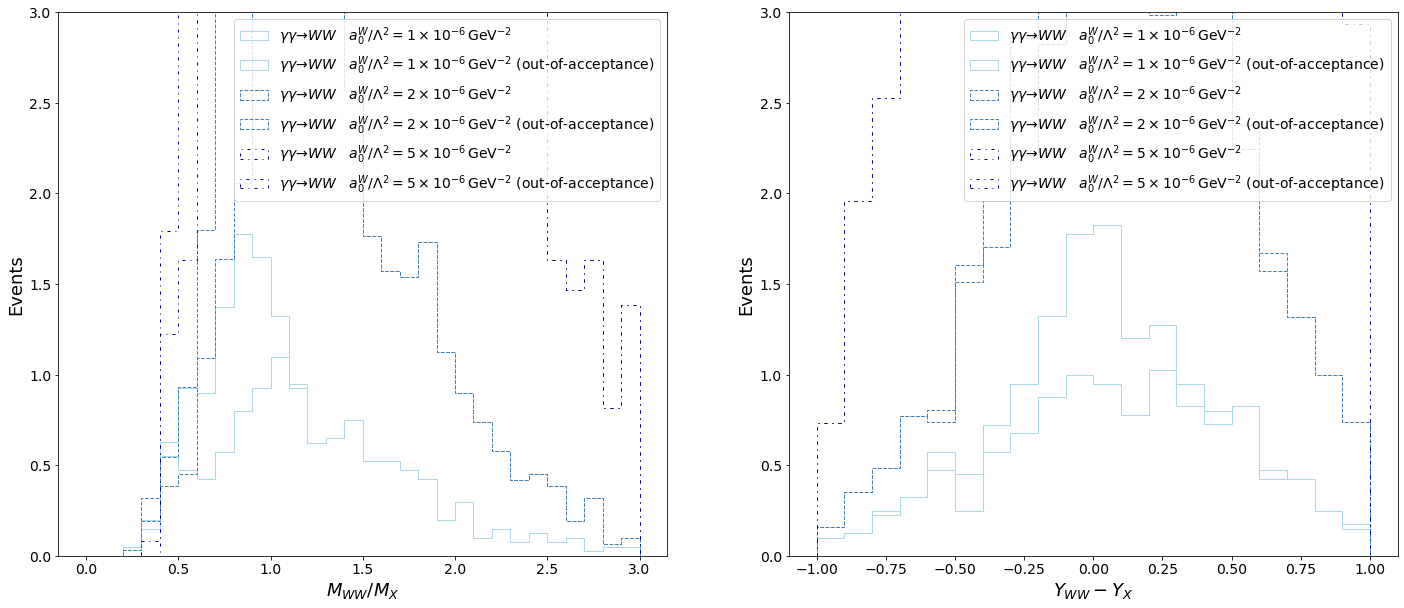

In [32]:
variation__ = "_nom"
var_str__ = {}
# var_str__[ "_nom" ] = "_nom_nom"
var_str__[ "_nom" ] = "_nom"
var_weights__ = "nom"

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )

colors_ = [ "lightblue", "steelblue", "darkblue", "royalblue" ]

linestyles_ = [ "solid", "dashed", (0, (3, 5, 1, 5)), (0, (3, 5, 1, 5, 1, 5)) ]

for idx_, label_ in enumerate( labels_signals ):
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=30, range=(0.,3.) )
    axes[0].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=30, range=(0.,3.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
              bins=20, range=(-1.,1.) )
    axes[1].hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
              histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=14 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=14 )
    
axes[0].set_ylim( (0.,3.) )
axes[1].set_ylim( (0.,3.) )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix.png", bbox_inches='tight' )

In [33]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=20, range=(-1.,1.) )
#     plt.hist( df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat_skip_sig[ label_ ][ variation__ ][ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories_concat_skip_sig[ label_ ][ var_weights__ ][ variation__ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=14 )
    
# plt.ylim( (0.,3.) )

2protons_sig
1proton_sig_Arm0
1proton_sig_Arm1
2protons_mix


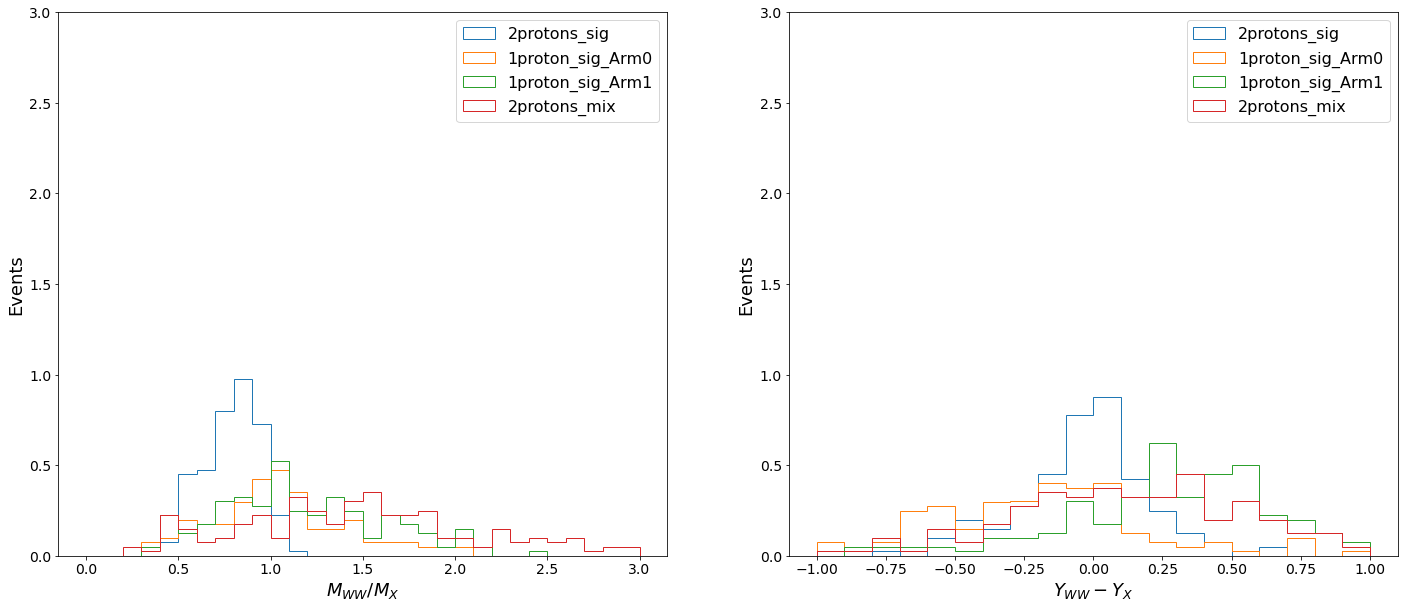

In [34]:
label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
elif data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

fig, axes = plt.subplots( 1, 2, figsize=(2*12,10) )
for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
    print ( key_ )
    df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
    axes[0].hist( df_selected_events__[ "R_MWW_MX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=30, range=(0.,3.) )
    axes[1].hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
              histtype='step', label=key_,
              bins=20, range=(-1.,1.) )
axes[0].set_xlabel( r"$ M_{WW} / M_{X} $", fontsize=18 )
axes[0].set_ylabel( "Events", fontsize=18 )
axes[0].legend( loc='best', fontsize=16 )
axes[1].set_xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
axes[1].set_ylabel( "Events", fontsize=18 )
axes[1].legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# plt.ylim( 0., 0.5 )
# plt.ylim( 0., 3. )
axes[0].set_ylim( 0., 3. )
axes[1].set_ylim( 0., 3. )

if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Mix-Categories.png", bbox_inches='tight' )

In [35]:
# fig = plt.figure( figsize=(10,8) )
# for key_ in df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories[ label_ ][ key_ ][ variation__ ]
#     plt.hist( df_selected_events__[ "Diff_YWW_YX" + var_str__[ "_nom" ] ], weights=weights_sig_plus_mix_categories[ label_ ][ var_weights__ ][ key_ ][ variation__ ],
#               histtype='step', label=key_,
#               bins=20, range=(-1.,1.) )
# plt.xlabel( r"$ Y_{WW} - Y_{X} $", fontsize=18 )
# plt.ylabel( "Events", fontsize=18 )
# plt.legend( loc='best', fontsize=16 )
# plt.ylim( 0., 0.3 )
# # plt.ylim( 0., 0.5 )
# # plt.ylim( 0., 3. )

GGToWW-AQGC-2018-muon-A0W1e-6
Number of events: 15.142194420027675 +/- 0.6151139376566729
Number of events (A): 9.52226632598145 +/- 0.4878431909992443
Number of events (B): 3.149199472077077 +/- 0.2805542212985181
Number of events (C): 1.5468334402806863 +/- 0.19645103154443513
Number of events (D): 0.9238951816884604 +/- 0.15188975742913563
0 0


/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


GGToWW-AQGC-2018-muon-A0W2e-6
Number of events: 48.28049799126202 +/- 1.2449457370907109
Number of events (A): 35.76084721096758 +/- 1.0714397406890024
Number of events (B): 5.4566590231683225 +/- 0.4185088661810539
Number of events (C): 5.811792668479555 +/- 0.43198971914694234
Number of events (D): 1.2511990886465514 +/- 0.20035464020534144
0 1
GGToWW-AQGC-2018-muon-A0W5e-6
Number of events: 258.7668951106991 +/- 4.5938409835264125
Number of events (A): 198.0115379201609 +/- 4.018541411433618
Number of events (B): 24.222645242682766 +/- 1.4055470193844555
Number of events (C): 32.94404667392543 +/- 1.6390367910956392
Number of events (D): 3.5886652739299847 +/- 0.5410137523708699
1 0


/cvmfs/sft.cern.ch/lcg/views/LCG_102swan/x86_64-centos7-gcc11-opt/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


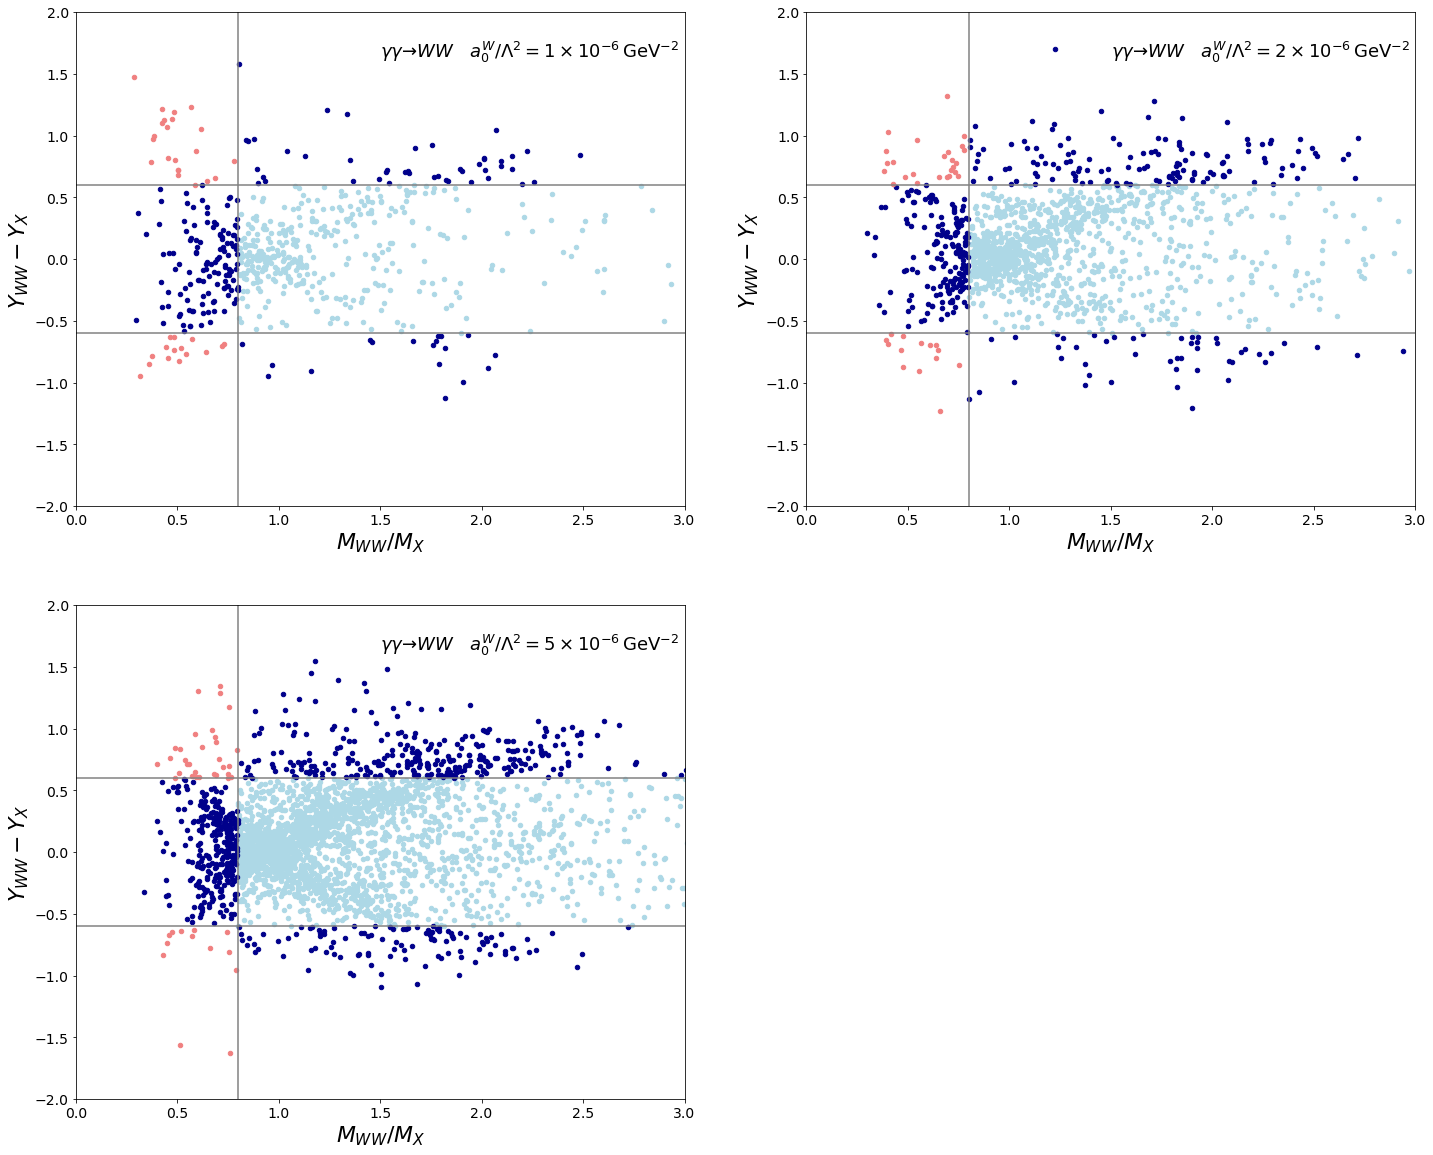

In [36]:
variation__ = "_nom"
var_weights__ = "nom"

nrows_ = ( int( len(labels_signals)/2 ) + 1 if ( len(labels_signals) % 2 ) > 0 else int( len(labels_signals)/2 ) )
fig, axes = plt.subplots( nrows_, 2, figsize=(2*12,nrows_*10) )

row_ = 0
col_ = 0
for label_ in labels_signals:
    print ( label_ )
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ variation__ ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ var_weights__ ][ variation__ ]
    var1__ = ( "R_MWW_MX" + var_str__[ "_nom" ] )
    var2__ = ( "Diff_YWW_YX" + var_str__[ "_nom" ] )
    
    msk_sig_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_sig_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_sig_A =  msk_sig_cut1 &  msk_sig_cut2
    msk_sig_B = ~msk_sig_cut1 &  msk_sig_cut2
    msk_sig_C =  msk_sig_cut1 & ~msk_sig_cut2
    msk_sig_D = ~msk_sig_cut1 & ~msk_sig_cut2

    n_events_sig   = np.sum( weights__ )
    err_n_events_sig = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_sig_A = np.sum( weights__[ msk_sig_A ] )
    err_n_events_sig_A = np.sqrt( np.sum( weights__[ msk_sig_A ] ** 2 ) )
    n_events_sig_B = np.sum( weights__[ msk_sig_B ] )
    err_n_events_sig_B = np.sqrt( np.sum( weights__[ msk_sig_B ] ** 2 ) )
    n_events_sig_C = np.sum( weights__[ msk_sig_C ] )
    err_n_events_sig_C = np.sqrt( np.sum( weights__[ msk_sig_C ] ** 2 ) )
    n_events_sig_D = np.sum( weights__[ msk_sig_D ] )
    err_n_events_sig_D = np.sqrt( np.sum( weights__[ msk_sig_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_sig, err_n_events_sig ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_sig_A, err_n_events_sig_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_sig_B, err_n_events_sig_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_sig_C, err_n_events_sig_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_sig_D, err_n_events_sig_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    print ( row_, col_ )
    axes[ row_, col_ ].plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    axes[ row_, col_ ].plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    if np.sum( msk_sig_A ) > 0:
        df__[ msk_sig_A ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightblue' )
    if np.sum( msk_sig_B ) > 0:
        df__[ msk_sig_B ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_C ) > 0:
        df__[ msk_sig_C ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='darkblue' )
    if np.sum( msk_sig_D ) > 0:
        df__[ msk_sig_D ].plot( var1__, var2__, 'scatter', ax=axes[ row_, col_ ], color='lightcoral' )
    title_str_ = labels_samples[ label_ ]
    axes[ row_, col_ ].text( 0.50, 0.92, title_str_, horizontalalignment='left', verticalalignment='center', transform=axes[ row_, col_ ].transAxes, fontsize=18 )
    axes[ row_, col_ ].set_xlim(x_min, x_max)
    axes[ row_, col_ ].set_ylim(y_min, y_max)
    axes[ row_, col_ ].set_xlabel( r"$M_{WW} / M_{X}$", fontsize=22 )
    axes[ row_, col_ ].set_ylabel( r"$Y_{WW} - Y_{X}$", fontsize=22 )
    col_ += 1
    if col_ >= 2:
        row_ += 1
        col_  = 0
if col_ == 1: axes[ row_, col_ ].axis('off')
    
if save_figures:
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.pdf", bbox_inches='tight' )
    plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Signal.png", bbox_inches='tight' )

In [37]:
# label_ = "GGToWW-AQGC-A0W5e-6"
# fig = plt.figure( figsize=(12,10) )
# for key_ in df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ]:
#     print ( key_ )
#     df_selected_events__ = df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events[ label_ ][ key_ ]
#     plt.hist( df_selected_events__[ "ratioMWW_MX" ], weights=weights_out_acceptance_misreconstructed[ label_ ][ key_ ],
#               histtype='step', label=key_,
#               bins=20, range=(0.,2.) )
# plt.legend( loc='best', fontsize=16 )

In [38]:
# fig = plt.figure( figsize=(10,8) )

# colors_ = [ "lightblue", "steelblue", "darkblue" ]
# linestyles_ = [ "-", "--", "-." ]
# for idx_, label_ in enumerate( labels_signals ):
#     plt.hist( df_signals_protons_multiRP_events[ label_ ][ "ratioMWW_MX" ], weights=weights_mc[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=labels_samples[ label_ ],
#               bins=30, range=(0.,3.) )
#     plt.hist( df_signals_protons_multiRP_out_acceptance_misreconstructed_selected_events_concat[ label_ ][ "ratioMWW_MX" ],
#               weights=weights_out_acceptance_misreconstructed_concat[ label_ ],
#               histtype='step', color=colors_[ idx_ ], linestyle=linestyles_[ idx_ ], label=( labels_samples[ label_ ] + " (out-of-acceptance)" ),
#               bins=30, range=(0.,3.) )


# plt.legend( loc='best', fontsize=16 )
    
# plt.ylim( (0.,3.) )

# if save_figures:
#     plt.savefig( "plots/Ratio_MWW_MX_signals.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Ratio_MWW_MX_signals.png", bbox_inches='tight' )

In [39]:
from scipy.interpolate import make_interp_spline

relative_uncertainty_ = True

vars_ = {}
vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 15
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
vars_[ "R_MWW_MX" ][ "bins" ]  = 0.6 + 0.2 * np.arange( 8 )
vars_[ "R_MWW_MX" ][ "range" ] = None
vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.6, 2. )
vars_[ "R_MWW_MX" ][ "xtitle" ]  = r"$M_{WW} / M_{X}$"
vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = 10
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.2 * np.arange( 11 )
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1. + 0.4 * np.arange( 6 )
vars_[ "Diff_YWW_YX" ][ "bins" ]  = -0.6 + 0.4 * np.arange( 4 )
vars_[ "Diff_YWW_YX" ][ "range" ] = None
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1., 1. )
vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -0.60, 0.60 )
vars_[ "Diff_YWW_YX" ][ "xtitle" ]  = r"$Y_{WW} - Y_{X}$"

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,3.)
# ylim_ = (0.,5.)

color_ = "darkblue"

def plot_uncertainties_variations(df_dict, weights_dict, variables, variations, selection_dict, scale_variation, label, var_info, ylim, ylim_ratio, color, relative_uncertainty):

    __df_dict = df_dict
    __weights_dict = weights_dict
    vars_ = variables
    __variations = variations
    sel_str__ = selection_dict
#     var_weights__ = var_weights
    scale_variation_=scale_variation
    label_ = label
    vars_ = var_info
    ylim_ = ylim
    color_ = color
    relative_uncertainty_ = relative_uncertainty

    max_ = {}
    min_ = {}
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    idx_row_ = 0
    idx_col_ = 0

    fig_, axes_ = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    for var__ in vars_:
        print ( var__ )
        max_[ var__ ] = None
        min_[ var__ ] = None
        for idx_, variation__ in enumerate( __variations ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr__ = df__[ var__ + __variation__ ]
                
                arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
                arr__ = arr__.loc[ msk__ ]
                weights__ = weights__.loc[ msk__ ]
                counts_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

                if max_[ var__ ] is None: max_[ var__ ] = counts_.copy()
                if min_[ var__ ] is None: min_[ var__ ] = counts_.copy()
                msk__ = counts_ > max_[ var__ ]
                max_[ var__ ][ msk__ ] = counts_[ msk__ ]
                msk__ = counts_ < min_[ var__ ]
                min_[ var__ ][ msk__ ] = counts_[ msk__ ]

        print ( max_[ var__ ] )
        print ( min_[ var__ ] )
        idx_row_ = 0
        df__ = __df_dict[ label_ ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        counts_, bins_, _ = axes_[idx_row_,idx_col_].hist( arr__, 
                                                           weights=weights__,
                                                           histtype='step', color=color_, linestyle="-", label="_nom",
                                                           bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, max_[ var__ ], k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, min_[ var__ ], k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )

        axes_[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes_[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes_[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
        axes_[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        # axes_[idx_row_,idx_col_].set_ylim( -1., 1. )
        axes_[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( max_, min_ )

In [40]:
def calculate_uncertainties_variations(df_dict, weights_dict, variations, selection_dict, scale_variation):
    
    __df_dict = df_dict
    __weights_dict = weights_dict
    variations_ = variations
    sel_str__ = selection_dict
    scale_variation_=scale_variation
    
    sum_weights_cut = {}
    sum_weights_squared_cut = {}
    sum_weights_cut_max = {}
    sum_weights_cut_min = {}
    for label_ in labels_signals:
        print ( label_ )
        sum_weights_cut_max_ = None
        sum_weights_cut_min_ = None
        for idx_, variation__ in enumerate( variations_ ):
            __variation__ = variation__ if not scale_variation_ else "_nom"
            __sel_str__ = sel_str__[ __variation__ ] if not scale_variation_ else "_nom"
            __var_weights__ = variation__ if scale_variation_ else "nom"
            if variation__ != "_nom" and variation__ != "nom":
                print ( __variation__ )
                print ( __sel_str__ )
                print ( __var_weights__ )
                df__ = __df_dict[ label_ ][ __sel_str__ ]
                weights__ = __weights_dict[ label_ ][ __var_weights__ ][ __sel_str__ ]
                arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + __variation__ ]
                arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + __variation__ ]
                msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
                sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
                if sum_weights_cut_max_ is None:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut_min_ is None:
                    sum_weights_cut_min_ = sum_weights_cut__
                if sum_weights_cut__ > sum_weights_cut_max_:
                    sum_weights_cut_max_ = sum_weights_cut__
                if sum_weights_cut__ < sum_weights_cut_min_:
                    sum_weights_cut_min_ = sum_weights_cut__

        df__ = __df_dict[ label_ ][ "_nom" ]
        weights__ = __weights_dict[ label_ ][ "nom" ][ "_nom" ]
        weights_squared__ = ( weights__ ** 2 )
        arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
        arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
        sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
        sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
        print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )
        print ( sum_weights_cut_max_ )
        print ( sum_weights_cut_min_ )
        sum_weights_cut[ label_ ] = sum_weights_cut__
        sum_weights_squared_cut[ label_ ] = sum_weights_squared_cut__
        sum_weights_cut_max[ label_ ] = sum_weights_cut_max_
        sum_weights_cut_min[ label_ ] = sum_weights_cut_min_

    print ( sum_weights_cut )
    print ( sum_weights_squared_cut )
    print ( sum_weights_cut_max )
    print ( sum_weights_cut_min )
    
    return ( sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min )

In [41]:
label_ref_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ref_ = "GGToWW-AQGC-A0W2e-6"
#         label_ref_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ref_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ref_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ref_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ref_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.07433302 3.1491935  2.19911456 1.19951643 1.12457617 0.72431138
 0.37493397]
[2.04949571 3.1491935  2.19911456 1.17448761 1.12457617 0.64980174
 0.37493397]
0     -0.011899
1     -0.010946
2     -0.010073
3     -0.009271
4     -0.008532
         ...   
195    0.032870
196    0.025471
197    0.017531
198    0.009042
199    0.000000
Length: 200, dtype: float64 0.018982363195230917
0     -0.023730
1     -0.021929
2     -0.020275
3     -0.018753
4     -0.017348
         ...   
195   -0.016152
196   -0.012510
197   -0.008607
198   -0.004437
199    0.000000
Length: 200, dtype: float64 -0.009406655640493627
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.7236939  6.1473123  3.85018102]
[2.67421309 6.12214107 3.82510309]
0      0.009077
1      0.008920
2      0.008770
3      0.008628
4      0.008493
         ...   
195    0.000384
196    0.000296
197    0.000204
198    0.000110
199    0.000013
Length: 200,

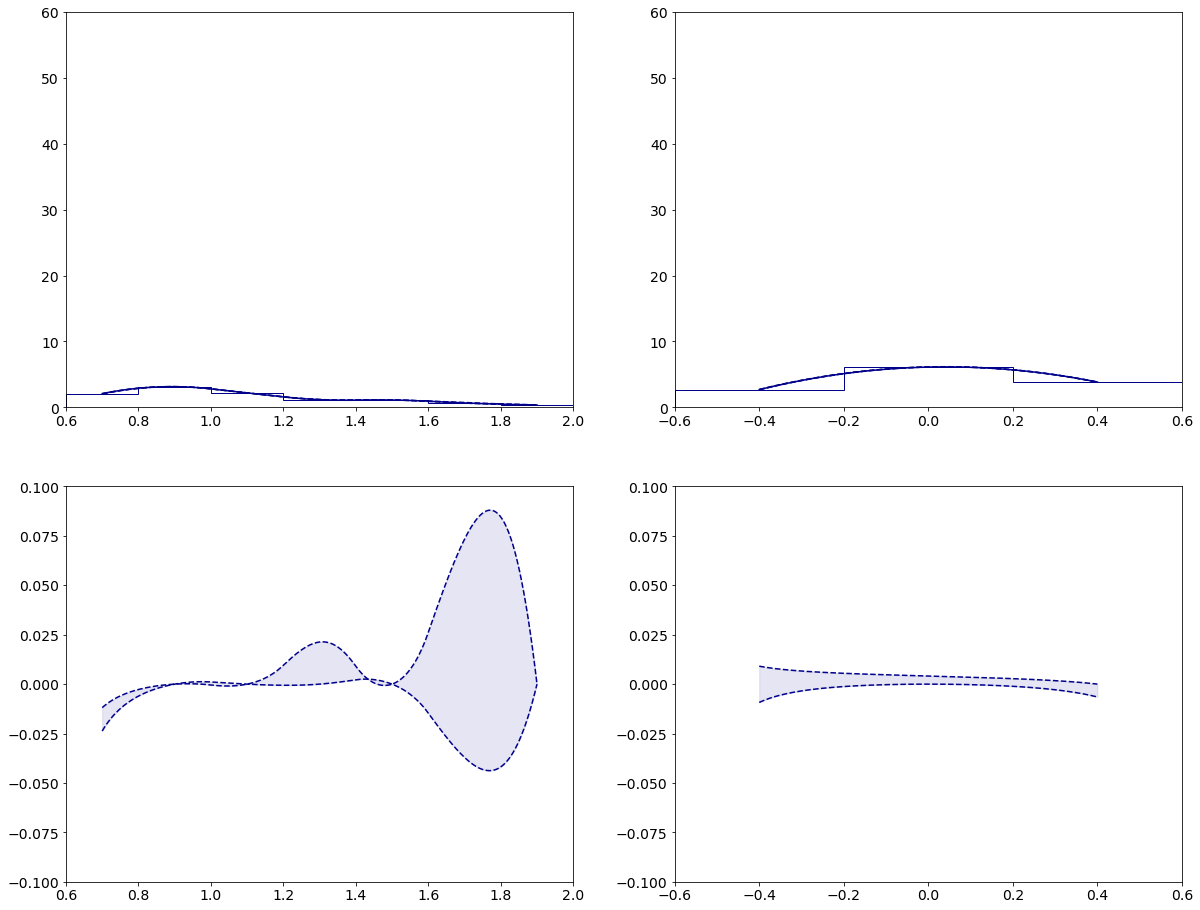

In [42]:
variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

# var_weights__ = "nom"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [43]:
max_variations = {}
min_variations = {}
max_variations[ "jes" ] = max_
min_variations[ "jes" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}}
{'jes': {'R_MWW_MX': array([2.04949571, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.64980174, 0.37493397]), 'Diff_YWW_YX': array([2.67421309, 6.12214107, 3.82510309])}}


In [44]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
9.52226632598145 ± 0.4878431909992443
9.596775961944251
9.497237501480532
GGToWW-AQGC-2018-muon-A0W2e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
35.76084721096758 ± 1.0714397406890024
35.76158823111315
35.53658126238608
GGToWW-AQGC-2018-muon-A0W5e-6
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
198.0115379201609 ± 4.018541411433618
198.9078867271552
196.79054515930267
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.596775961944251, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76158823111315, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.9078867271552}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.497237501480532, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.536

In [45]:
sum_weights = {}
for label_ in labels_signals:
    sum_weights[ label_ ] = {}
    sum_weights[ label_ ][ "central" ]        = sum_weights_cut[ label_ ]
    sum_weights[ label_ ][ "stat" ]           = np.sqrt( sum_weights_squared_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_up_jes" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jes" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 198.0115379201609, 'stat': 4.018541411433618, 'syst_up_jes': 0.8963488069942969, 'syst_dw_jes': -1.2209927608582234}}


GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[2.09931274 3.1491935  2.19911456 1.17448761 1.12457617 0.69985939
 0.37493397]
[2.09931274 3.1491935  2.19911456 1.17448761 1.12457617 0.67483056
 0.37493397]
0      0.000000
1      0.000001
2      0.000002
3      0.000003
4      0.000004
         ...   
195    0.016157
196    0.012515
197    0.008610
198    0.004439
199    0.000000
Length: 200, dtype: float64 0.008135594668611081
0      0.000000e+00
1      0.000000e+00
2      0.000000e+00
3      1.940474e-16
4      0.000000e+00
           ...     
195    0.000000e+00
196    0.000000e+00
197    0.000000e+00
198    0.000000e+00
199    0.000000e+00
Length: 200, dtype: float64 -5.212531873909553e-17
Diff_YWW_YX
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
[2.69919281 6.12214107 3.90018957]
[2.69919281 6.12214107 3.85013192]
0      0.000000
1     -0.000090
2     -0.000175
3     -0.000254
4     -0.000328
         ...   
195    0.011621
196    0.011948
197    0.012287

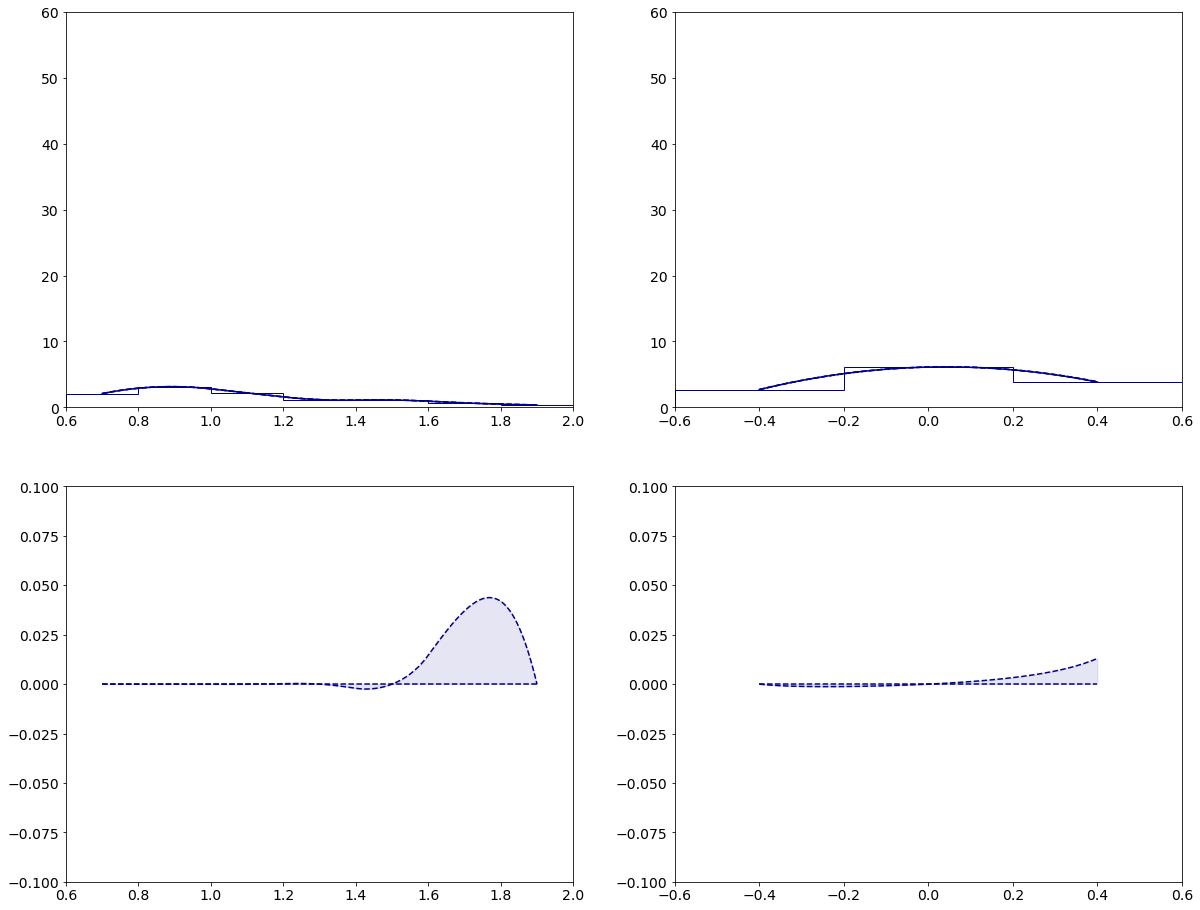

In [46]:
variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = key_

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.10,0.10)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [47]:
max_variations[ "jer" ] = max_
min_variations[ "jer" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.69985939, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.90018957])}}
{'jes': {'R_MWW_MX': array([2.04949571, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.64980174, 0.37493397]), 'Diff_YWW_YX': array([2.67421309, 6.12214107, 3.82510309])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.67483056, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.85013192])}}


In [48]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
9.52226632598145 ± 0.4878431909992443
9.54729515048237
9.52226632598145
GGToWW-AQGC-2018-muon-A0W2e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
35.76084721096758 ± 1.0714397406890024
35.697345980168436
35.63281373779291
GGToWW-AQGC-2018-muon-A0W5e-6
_jer_up
_jer_up
nom
_jer_dw
_jer_dw
nom
198.0115379201609 ± 4.018541411433618
198.256552760074
197.5217765850636
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.54729515048237, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.697345980168436, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.256552760074}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.63281373

In [49]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_jer" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_jer" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 198.0115379201609, 'stat': 4.018541411433618, 'syst_up_jes': 0.8963488069942969, 'syst_dw_jes': -1.2209927608582234, 'syst_up_jer': 0.2450148399130967, 'syst_dw_jer': -0.4897613350972847}}


GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[2.10395429 3.15643297 2.20434968 1.17730553 1.1273883  0.67655815
 0.37587415]
[2.0946712  3.14195402 2.19387945 1.17166968 1.12176403 0.67310298
 0.37399379]
0      0.002211
1      0.002216
2      0.002220
3      0.002225
4      0.002229
         ...   
195    0.002529
196    0.002524
197    0.002519
198    0.002513
199    0.002508
Length: 200, dtype: float64 0.002421170509261066
0     -0.002211
1     -0.002216
2     -0.002220
3     -0.002225
4     -0.002229
         ...   
195   -0.002529
196   -0.002524
197   -0.002519
198   -0.002513
199   -0.002508
Length: 200, dtype: float64 -0.002421170509276725
Diff_YWW_YX
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
[2.70550871 6.13639599 3.85927282]
[2.69287692 6.10788614 3.84099102]
0      0.002340
1      0.002339
2      0.002338
3      0.002338
4      0.002337
         ...   
195    0.002369
196    0.002370
197    0.002372
198    0.002373
199    0.002

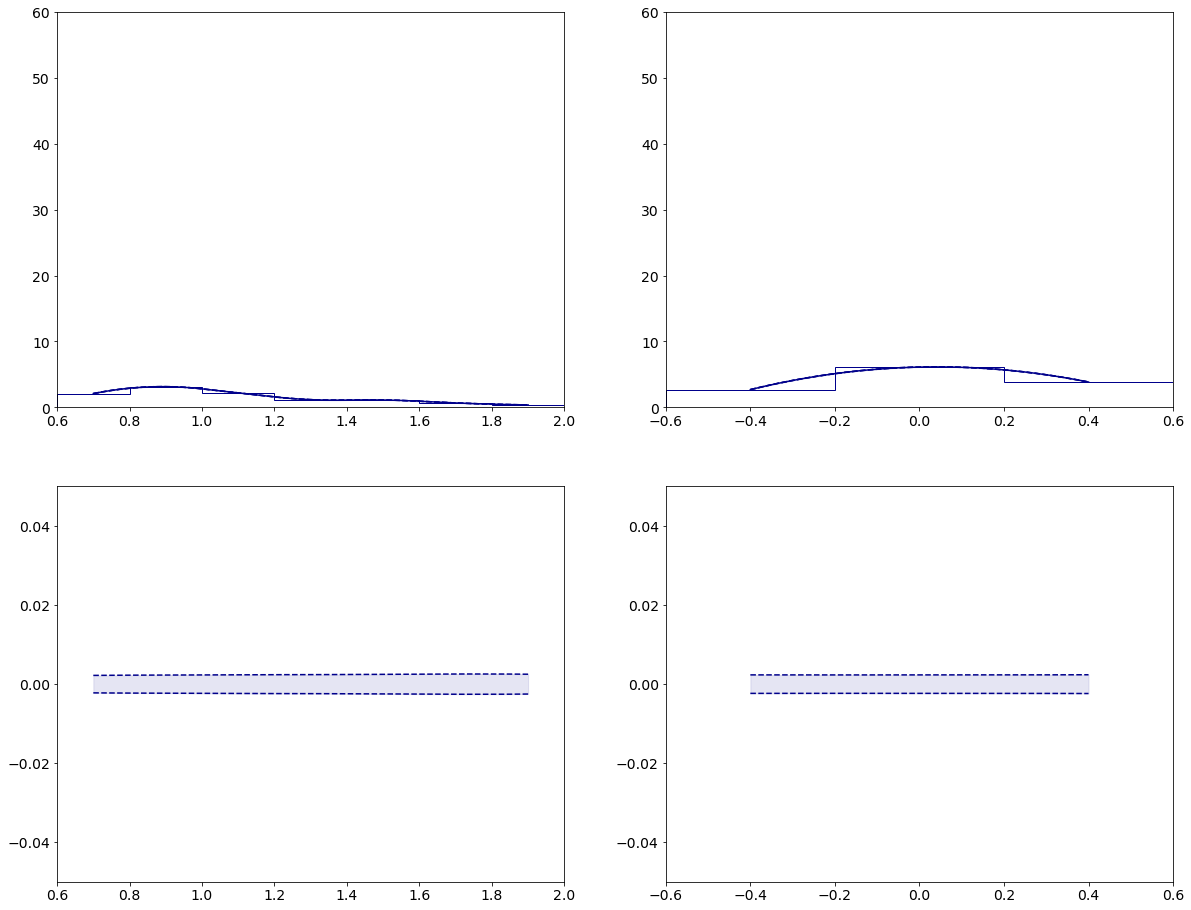

In [50]:
variations_weights_ = []
if lepton_type == 'muon':
    variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
elif lepton_type == 'electron':
    variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [51]:
if lepton_type == 'muon':
    max_variations[ "sf_muon_id" ] = max_
    min_variations[ "sf_muon_id" ] = min_
elif lepton_type == 'electron':
    max_variations[ "sf_electron_id" ] = max_
    min_variations[ "sf_electron_id" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.69985939, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.90018957])}, 'sf_muon_id': {'R_MWW_MX': array([2.10395429, 3.15643297, 2.20434968, 1.17730553, 1.1273883 ,
       0.67655815, 0.37587415]), 'Diff_YWW_YX': array([2.70550871, 6.13639599, 3.85927282])}}
{'jes': {'R_MWW_MX': array([2.04949571, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.64980174, 0.37493397]), 'Diff_YWW_YX': array([2.67421309, 6.12214107, 3.82510309])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.67483056, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.85013192])}, 'sf_muon_id': {'R_MWW_MX': array([2.0946712 , 3.14195402, 2.19387945, 1.17166968, 1.12

In [52]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
9.52226632598145 ± 0.4878431909992443
9.545072646488734
9.499460005474175
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
35.76084721096758 ± 1.0714397406890024
35.84516182475417
35.676532597180994
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
sf_muon_id_up
_nom
_nom
sf_muon_id_dw
198.0115379201609 ± 4.018541411433618
198.48555671615156
197.53751912417013
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.545072646488734, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.84516182475417, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.48555671615156}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.499460005474175, 'GGToWW-AQGC

In [53]:
for label_ in labels_signals:
    if lepton_type == 'muon':
        sum_weights[ label_ ][ "syst_up_sf_muon_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_muon_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
    elif lepton_type == 'electron':
        sum_weights[ label_ ][ "syst_up_sf_electron_id" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
        sum_weights[ label_ ][ "syst_dw_sf_electron_id" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_muon_id': 0.08431461378658867, 'syst_dw_sf_muon_id': -0.08431461378658867}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 198.0115379201609, 'stat': 4.018541411433618, 'syst_up_jes': 0.8963488069942969, 'syst_dw_jes': -1.2209927608582234, 'syst_up_jer': 0.2450148399130967, 'syst_dw_jer': -0.4897613350972847, 'syst_up_sf_muon_id': 0.4740187959906734, 'syst_dw_sf_muon_id': -0.4740187959907587}}


GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[2.34918469 3.17415725 2.34896466 1.2247699  1.14938034 0.69985939
 0.42441478]
[1.92447774 3.14875921 1.99948196 1.17448761 0.99988243 0.65002639
 0.37493397]
0      0.119026
1      0.109220
2      0.100267
3      0.092073
4      0.084557
         ...   
195    0.113890
196    0.118253
197    0.122724
198    0.127299
199    0.131972
Length: 200, dtype: float64 0.04467532684930465
0     -0.083282
1     -0.074762
2     -0.067019
3     -0.059968
4     -0.053536
         ...   
195    0.012131
196    0.009743
197    0.006932
198    0.003689
199    0.000000
Length: 200, dtype: float64 -0.04231642490717687
Diff_YWW_YX
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
[2.82428784 6.14697319 4.00025576]
[2.59877443 6.02210106 3.80006922]
0      0.046345
1      0.044522
2      0.042796
3      0.041160
4      0.039608
         ...   
195    0.034738
196    0.035745
197    0.036789
198    0.03787

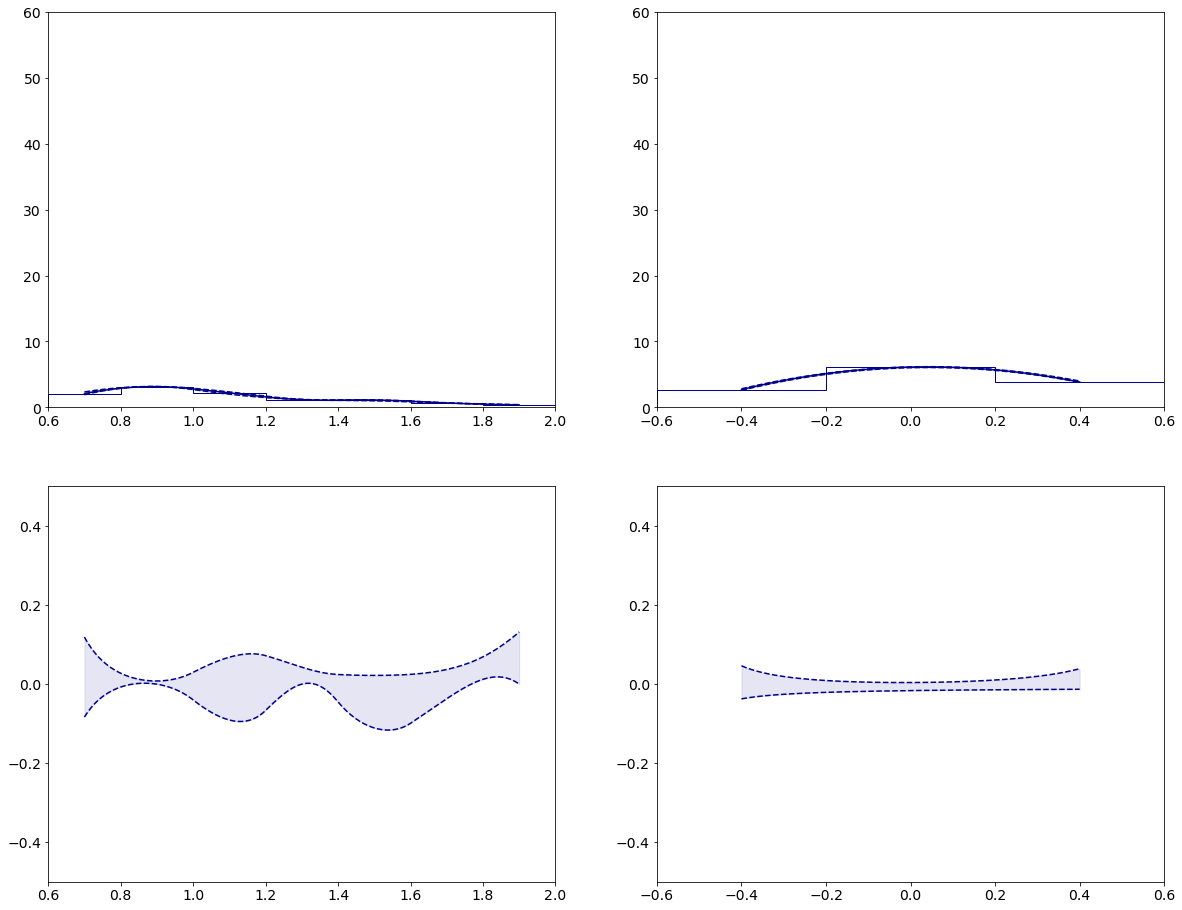

In [54]:
labels_xi_ = [ "_nom", "_p100", "_m100" ]
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

# vars_ = {}
# vars_[ "R_MWW_MX" ] = {}
# vars_[ "R_MWW_MX" ][ "bins" ]  = 30
# vars_[ "R_MWW_MX" ][ "range" ] = (0.,3.)
# vars_[ "R_MWW_MX" ][ "xlim" ]  = (0.5,2.)
# # vars_[ "R_MWW_MX" ][ "bins" ]  = 0.5 + 0.2 * np.arange( 9 )
# # vars_[ "R_MWW_MX" ][ "range" ] = None
# # vars_[ "R_MWW_MX" ][ "xlim" ]  = ( 0.5, 2.1 )
# vars_[ "Diff_YWW_YX" ] = {}
# vars_[ "Diff_YWW_YX" ][ "bins" ]  = 20
# vars_[ "Diff_YWW_YX" ][ "range" ] = (-1.,1.)
# vars_[ "Diff_YWW_YX" ][ "xlim" ]  = (-1.,1.)
# # vars_[ "Diff_YWW_YX" ][ "bins" ]  = -1.1 + 0.2 * np.arange( 12 )
# # vars_[ "Diff_YWW_YX" ][ "range" ] = None
# # vars_[ "Diff_YWW_YX" ][ "xlim" ]  = ( -1.1, 1.1 )

# ylim_ = (0.,0.2)
# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,60.)
# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ratio_ = (-0.50,0.50)

color_ = "darkblue"

relative_uncertainty_ = True

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_ = {}
min_var_xi_ = {}
max_var_xi_["arm0"] = max_
min_var_xi_["arm0"] = min_

In [55]:
max_variations[ "proton_scale_arm0" ] = max_
min_variations[ "proton_scale_arm0" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.69985939, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.90018957])}, 'sf_muon_id': {'R_MWW_MX': array([2.10395429, 3.15643297, 2.20434968, 1.17730553, 1.1273883 ,
       0.67655815, 0.37587415]), 'Diff_YWW_YX': array([2.70550871, 6.13639599, 3.85927282])}, 'proton_scale_arm0': {'R_MWW_MX': array([2.34918469, 3.17415725, 2.34896466, 1.2247699 , 1.14938034,
       0.69985939, 0.42441478]), 'Diff_YWW_YX': array([2.82428784, 6.14697319, 4.00025576])}}
{'jes': {'R_MWW_MX': array([2.04949571, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.64980174, 0.37493397]), 'Diff_YWW_YX': array([2.67421309, 6.12214107, 3.82510309])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.1744876

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[2.27437196 3.29930642 2.24953928 1.19887562 1.22491611 0.67483056
 0.45002044]
[1.77427179 3.1491935  2.02378664 1.12452816 1.09999664 0.49985344
 0.32487632]
0      0.083389
1      0.081190
2      0.079155
3      0.077263
4      0.075498
         ...   
195    0.134135
196    0.149304
197    0.165379
198    0.182366
199    0.200266
Length: 200, dtype: float64 0.04537880461571597
0     -0.154832
1     -0.141260
2     -0.128866
3     -0.117519
4     -0.107108
         ...   
195   -0.211722
196   -0.194379
197   -0.175576
198   -0.155293
199   -0.133511
Length: 200, dtype: float64 -0.09553619630273853
Diff_YWW_YX
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
[2.79925397 6.27236816 3.85013192]
[2.57409779 6.12214107 3.59983863]
0      0.037071
1      0.036772
2      0.036487
3      0.036215
4      0.035954
         ...   
195    0.002445
196    0.001864
197    0.001263
198    0.00064

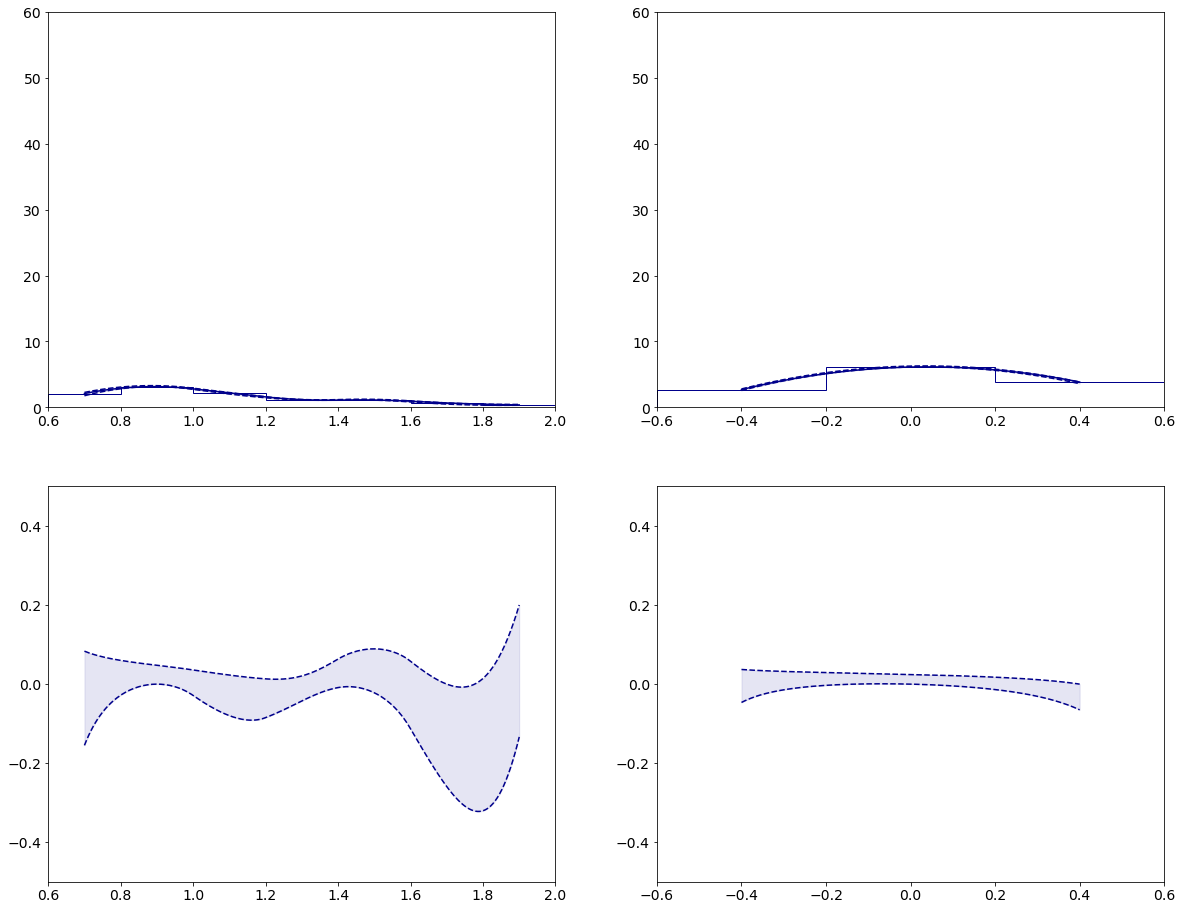

In [56]:
variations_ = []

for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )

sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

max_var_xi_["arm1"] = max_
min_var_xi_["arm1"] = min_

In [57]:
max_variations[ "proton_scale_arm1" ] = max_
min_variations[ "proton_scale_arm1" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.69985939, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.90018957])}, 'sf_muon_id': {'R_MWW_MX': array([2.10395429, 3.15643297, 2.20434968, 1.17730553, 1.1273883 ,
       0.67655815, 0.37587415]), 'Diff_YWW_YX': array([2.70550871, 6.13639599, 3.85927282])}, 'proton_scale_arm0': {'R_MWW_MX': array([2.34918469, 3.17415725, 2.34896466, 1.2247699 , 1.14938034,
       0.69985939, 0.42441478]), 'Diff_YWW_YX': array([2.82428784, 6.14697319, 4.00025576])}, 'proton_scale_arm1': {'R_MWW_MX': array([2.27437196, 3.29930642, 2.24953928, 1.19887562, 1.22491611,
       0.67483056, 0.45002044]), 'Diff_YWW_YX': array([2.79925397, 6.27236816, 3.85013192])}}
{'jes': {'R_MWW_MX': array([2.04949571, 3.1491935 , 2.19911

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
[2.40440571 3.301368   2.35722118 1.23037217 1.22793647 0.69985939
 0.46485799]
[1.7302343  3.14875921 1.93342102 1.12452816 0.99748297 0.49810411
 0.32487632]
0      0.145330
1      0.137380
2      0.130103
3      0.123424
4      0.117279
         ...   
195    0.180750
196    0.194431
197    0.208840
198    0.223976
199    0.239840
Length: 200, dtype: float64 0.0717841413201406
0     -0.175809
1     -0.159643
2     -0.144903
3     -0.131432
4     -0.119095
         ...   
195   -0.190191
196   -0.177422
197   -0.163726
198   -0.149091
199   -0.133511
Length: 200, dtype: float64 -0.11644798737094264
Diff_YWW_YX
[2.85938332 6.27440667 4.00025576]
[2.53877892 6.02210106 3.59488105]
0      0.059348
1      0.057960
2      0.056646
3      0.055400
4      0.054217
         ...   
195    0.037049
196    0.037508
197    0.037984
198    0.038479
199    0.038992
Length: 200, dtype: float64 0.030981063127507147
0     -0.059430
1     -0.057472
2     -0.05562

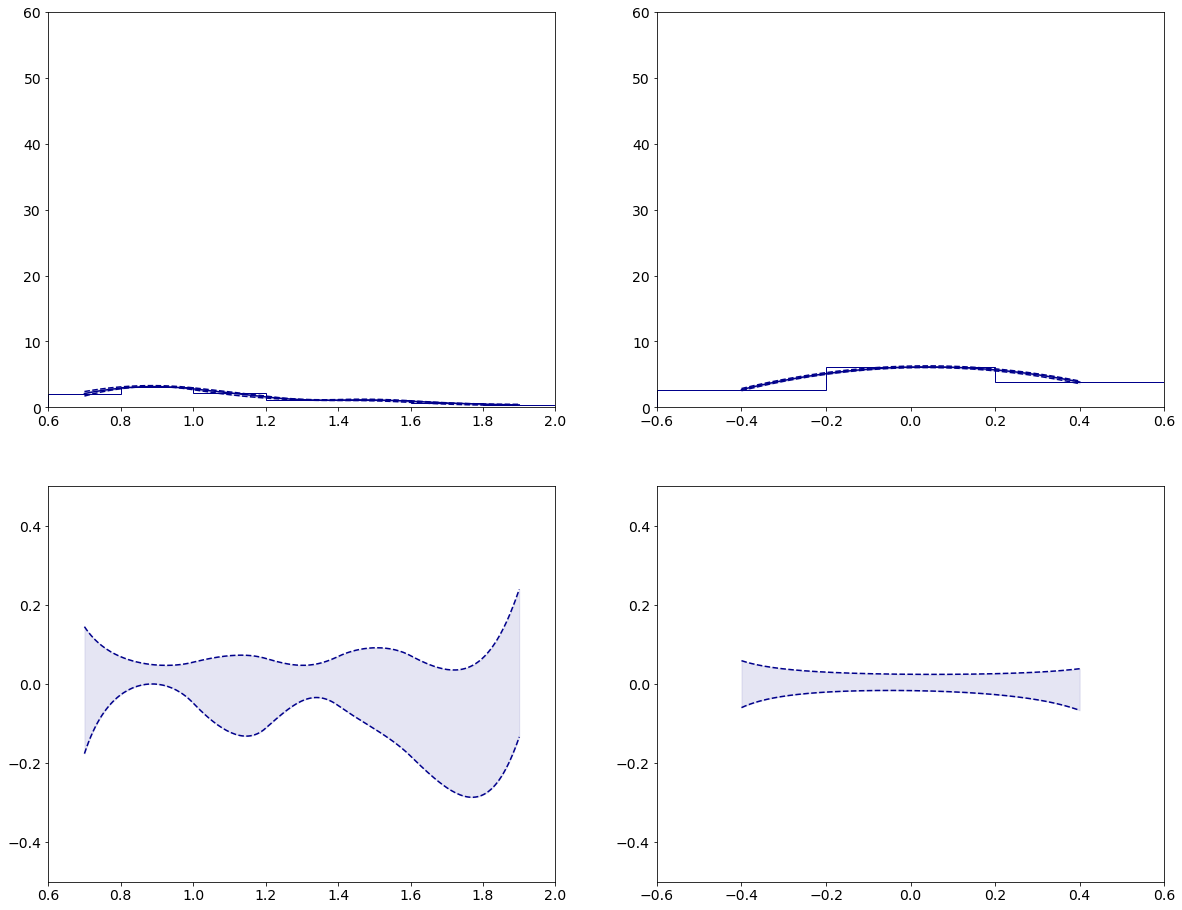

In [58]:
spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    counts_, bins_, _ = axes[idx_row_,idx_col_].hist( arr__,
                                                      weights=weights__,
                                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    __max__ = ( counts_ +
                np.sqrt( ( max_var_xi_[ "arm0" ][ var__ ] - counts_ ) ** 2 +
                         ( max_var_xi_[ "arm1" ][ var__ ] - counts_ ) ** 2 ) )
    __min__ = ( counts_ -
                np.sqrt( ( counts_ - min_var_xi_[ "arm0" ][ var__ ] ) ** 2 +
                         ( counts_ - min_var_xi_[ "arm1" ][ var__ ] ) ** 2 ) )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [59]:
variations_ = []
for label0_ in labels_xi_:
    for label1_ in [ "_nom" ]:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_p100_nom', '_m100_nom']
{'_nom_nom': '_nom', '_p100_nom': '_nom', '_m100_nom': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
9.52226632598145 ± 0.4878431909992443
9.871733067858298
9.222357881565255
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
35.76084721096758 ± 1.0714397406890024
36.62699401513069
35.0234477313809
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_p100_nom
_nom
nom
_m100_nom
_nom
nom
198.0115379201609 ± 4.018541411433618
200.78227911759467
193.52495882300465
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.871733067858298, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.6269940151

In [60]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_muon_id': 0.08431461378658867, 'syst_dw_sf_muon_id': -0.08431461378658867, 'syst_up_proton_scale_arm0': 0.8661468041631082, 'syst_dw_proton_scale_arm0': -0.737399479586685}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'central': 198.0115379201609, 'stat': 4.018541411433618, 'syst_up_jes': 0.8963488069942969, 'syst_dw_jes': -1.2209927608582234,

In [61]:
variations_ = []
for label0_ in [ "_nom" ]:
    for label1_ in labels_xi_:
        variations_.append( label0_ + label1_ )
sel_str__ = {}
for key_ in variations_:
    sel_str__[ key_ ] = "_nom"

print ( variations_ )
print ( sel_str__ )

sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_,
    selection_dict=sel_str__,
    scale_variation=False
    )

['_nom_nom', '_nom_p100', '_nom_m100']
{'_nom_nom': '_nom', '_nom_p100': '_nom', '_nom_m100': '_nom'}
GGToWW-AQGC-2018-muon-A0W1e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
9.52226632598145 ± 0.4878431909992443
9.897364925596541
9.09741725899287
GGToWW-AQGC-2018-muon-A0W2e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
35.76084721096758 ± 1.0714397406890024
36.499249131878145
34.76542232963273
GGToWW-AQGC-2018-muon-A0W5e-6
_nom_nom
_nom
nom
_nom_p100
_nom
nom
_nom_m100
_nom
nom
198.0115379201609 ± 4.018541411433618
201.27572263504356
192.22153467274964
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.897364925596541, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.499249131

In [62]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948, 'syst_up_proton_scale_arm1': 0.3750985996150913, 'syst_dw_proton_scale_arm1': -0.42484906698858005}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_muon_id': 0.08431461378658867, 'syst_dw_sf_muon_id': -0.08431461378658867, 'syst_up_proton_scale_arm0': 0.8661468041631082, 'syst_dw_proton_scale_arm0': -0.737399479586685, 'syst_up_proton_scale_arm1': 0.7384019209105617, 'syst_dw_prot

In [63]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_scale" ]    =  np.sqrt( sum_weights[ label_ ][ "syst_up_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_up_proton_scale_arm1" ] ** 2 )
    sum_weights[ label_ ][ "syst_dw_proton_scale" ]    = -np.sqrt( sum_weights[ label_ ][ "syst_dw_proton_scale_arm0" ] ** 2 +
                                                                   sum_weights[ label_ ][ "syst_dw_proton_scale_arm1" ] ** 2 )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948, 'syst_up_proton_scale_arm1': 0.3750985996150913, 'syst_dw_proton_scale_arm1': -0.42484906698858005, 'syst_up_proton_scale': 0.5126655470296612, 'syst_dw_proton_scale': -0.5200401953245621}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_muon_id': 0.08431461378658867, 'syst_dw_sf_muon_id': -0.08431461378658867, 'syst_up_proton_scale_arm0': 0.8661468041631082, 'syst_dw_proton_scale_

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[2.14330159 3.22030749 2.2348778  1.19063678 1.13582536 0.68137857
 0.37604024]
[2.0553239  3.0780795  2.16335133 1.15833843 1.11332698 0.66828256
 0.37382769]
0      0.020954
1      0.021213
2      0.021447
3      0.021657
4      0.021846
         ...   
195    0.004526
196    0.004154
197    0.003767
198    0.003366
199    0.002951
Length: 200, dtype: float64 0.01432029128669405
0     -0.020954
1     -0.021213
2     -0.021447
3     -0.021657
4     -0.021846
         ...   
195   -0.004526
196   -0.004154
197   -0.003767
198   -0.003366
199   -0.002951
Length: 200, dtype: float64 -0.014320291286690547
Diff_YWW_YX
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
[2.73812485 6.23190944 3.89806306]
[2.66026077 6.0123727  3.80220078]
0      0.014424
1      0.014593
2      0.014753
3      0.014904
4      0.015047
         ...   
195    0.013076
196    0.012928
197    0.012774
198    0.012614
199    0.0124

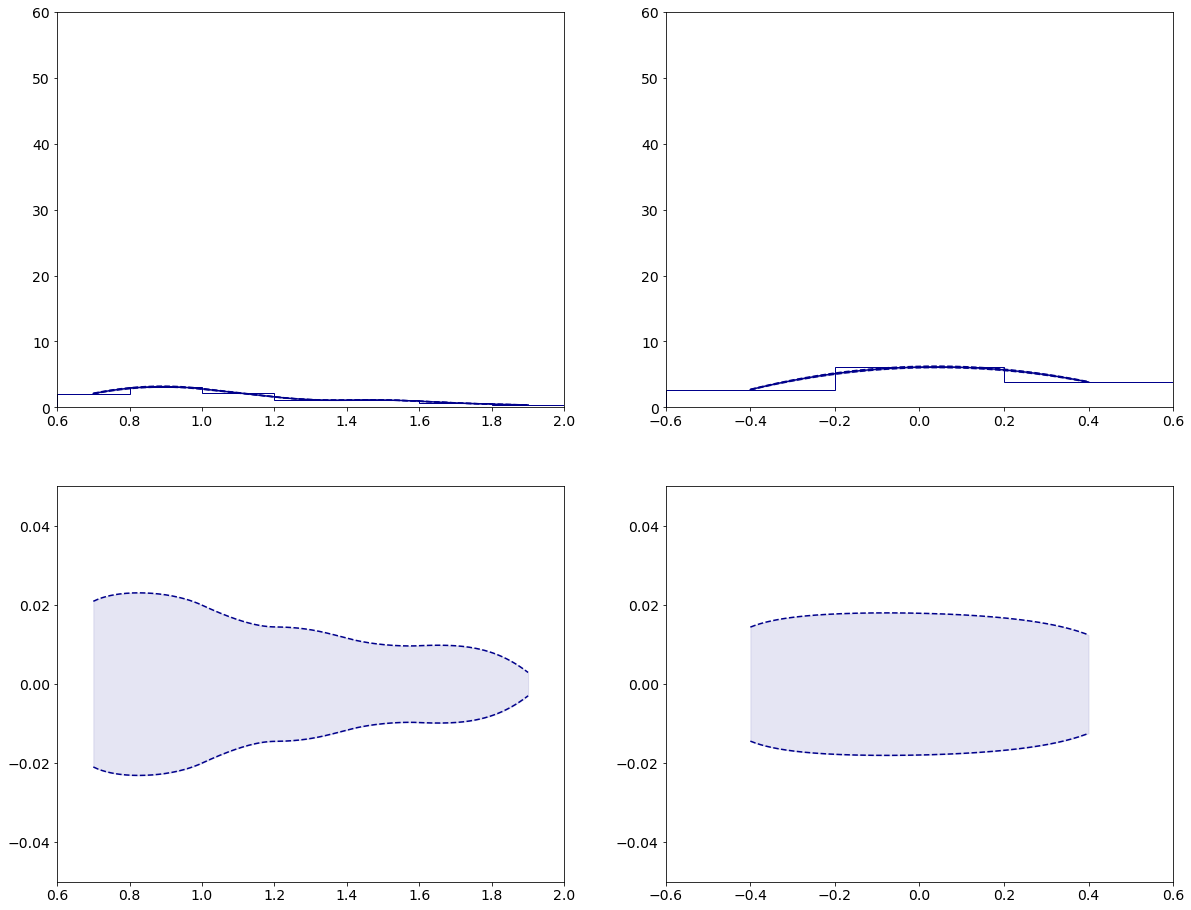

In [64]:
variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.05,0.05)

color_ = "darkblue"

max_, min_ = plot_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variables=vars_,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True,
    label=label_ref_,
    var_info=vars_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_,
    relative_uncertainty=relative_uncertainty_)

print ( max_, min_ )

In [65]:
max_variations[ "proton_eff" ] = max_
min_variations[ "proton_eff" ] = min_
print ( max_variations )
print ( min_variations )

{'jes': {'R_MWW_MX': array([2.07433302, 3.1491935 , 2.19911456, 1.19951643, 1.12457617,
       0.72431138, 0.37493397]), 'Diff_YWW_YX': array([2.7236939 , 6.1473123 , 3.85018102])}, 'jer': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.69985939, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.90018957])}, 'sf_muon_id': {'R_MWW_MX': array([2.10395429, 3.15643297, 2.20434968, 1.17730553, 1.1273883 ,
       0.67655815, 0.37587415]), 'Diff_YWW_YX': array([2.70550871, 6.13639599, 3.85927282])}, 'proton_scale_arm0': {'R_MWW_MX': array([2.34918469, 3.17415725, 2.34896466, 1.2247699 , 1.14938034,
       0.69985939, 0.42441478]), 'Diff_YWW_YX': array([2.82428784, 6.14697319, 4.00025576])}, 'proton_scale_arm1': {'R_MWW_MX': array([2.27437196, 3.29930642, 2.24953928, 1.19887562, 1.22491611,
       0.67483056, 0.45002044]), 'Diff_YWW_YX': array([2.79925397, 6.27236816, 3.85013192])}, 'proton_eff': {'R_MWW_MX': array([2.14330159, 3.22030749, 2

In [66]:
sum_weights_cut, sum_weights_squared_cut, sum_weights_cut_max, sum_weights_cut_min = calculate_uncertainties_variations(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    variations=variations_weights_,
    selection_dict=None,
    scale_variation=True
    )

GGToWW-AQGC-2018-muon-A0W1e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
9.52226632598145 ± 0.4878431909992443
9.664196196372188
9.380336455590715
GGToWW-AQGC-2018-muon-A0W2e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
35.76084721096758 ± 1.0714397406890024
36.2637506229683
35.25794379896686
GGToWW-AQGC-2018-muon-A0W5e-6
_nom
_nom
proton_eff_up
_nom
_nom
proton_eff_dw
198.0115379201609 ± 4.018541411433618
200.668685735083
195.35439010523876
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.52226632598145, 'GGToWW-AQGC-2018-muon-A0W2e-6': 35.76084721096758, 'GGToWW-AQGC-2018-muon-A0W5e-6': 198.0115379201609}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 0.23799097900432511, 'GGToWW-AQGC-2018-muon-A0W2e-6': 1.1479831179277167, 'GGToWW-AQGC-2018-muon-A0W5e-6': 16.148675075406892}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.664196196372188, 'GGToWW-AQGC-2018-muon-A0W2e-6': 36.2637506229683, 'GGToWW-AQGC-2018-muon-A0W5e-6': 200.668685735083}
{'GGToWW-AQGC-2018-muon-A0W1e-6': 9.380336455590715, 'GGToWW-AQGC-2018-m

In [67]:
for label_ in labels_signals:
    sum_weights[ label_ ][ "syst_up_proton_eff" ]    = ( sum_weights_cut_max[ label_ ] - sum_weights_cut[ label_ ] )
    sum_weights[ label_ ][ "syst_dw_proton_eff" ]    = ( sum_weights_cut_min[ label_ ] - sum_weights_cut[ label_ ] )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948, 'syst_up_proton_scale_arm1': 0.3750985996150913, 'syst_dw_proton_scale_arm1': -0.42484906698858005, 'syst_up_proton_scale': 0.5126655470296612, 'syst_dw_proton_scale': -0.5200401953245621, 'syst_up_proton_eff': 0.14192987039073834, 'syst_dw_proton_eff': -0.1419298703907348}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': -0.06350123079914738, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_muon_id': 0.08431461378658867, 'syst_dw_sf_muon_id': -0.0843

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
[2.09931274 3.1491935  2.19911456 1.17448761 1.12457617 0.67483056
 0.37493397]
[2.32836756 3.4297472  2.4335426  1.34580509 1.29221952 0.80470243
 0.47174195]
[1.87025793 2.86863979 1.96468653 1.00317012 0.95693282 0.5449587
 0.27812599]
[2.48418724 3.47626699 2.48417705 1.35715655 1.32186301 0.81840562
 0.5070711 ]
[1.65985478 2.85967635 1.84294609 0.9952828  0.91388344 0.45398844
 0.26594011]
0      0.183334
1      0.176772
2      0.170767
3      0.165258
4      0.160190
         ...   
195    0.328256
196    0.334157
197    0.340158
198    0.346251
199    0.352428
Length: 200, dtype: float64 0.16897536695188983
0     -0.209334
1     -0.198850
2     -0.189281
3     -0.180527
4     -0.172500
         ...   
195   -0.326840
196   -0.318942
197   -0.310295
198   -0.300885
199   -0.290701
Length: 200, dtype: float64 -0.19572121905581008
Diff_YWW_YX
[2.69919281 6.12214107 3.85013192]
[2.95892437 6.51327257 4.16038554]
[2.43946126 5.73100956 3.539878

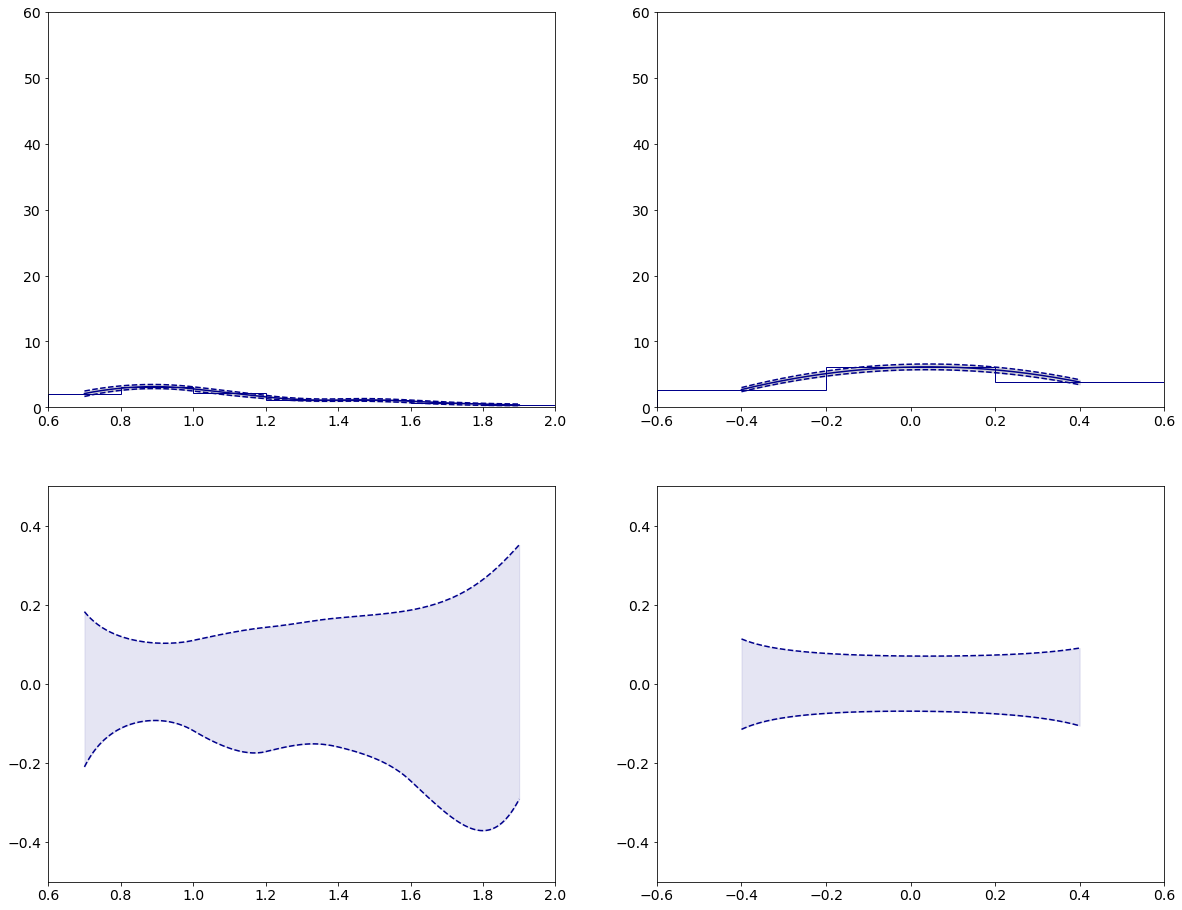

In [68]:
color_ = "darkblue"

relative_uncertainty_ = True

# ylim_ = (0.,1.)
ylim_ = (0.,60.)
ylim_ratio_ = (-0.50,0.50)

spline_nom_ = {}
spline_max_ = {}
spline_min_ = {}
spline_max_err_ = {}
spline_min_err_ = {}
spline_nom_arr_ = {}
spline_max_arr_ = {}
spline_min_arr_ = {}
spline_max_err_arr_ = {}
spline_min_err_arr_ = {}

idx_row_ = 0
idx_col_ = 0

fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

variation_name_lepton_id_ = ""
if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"
    
label_ = label_ref_
print ( label_ )
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat[ label_ ][ "_nom" ]
    weights__ = weights_sig_plus_mix_categories_concat[ label_ ][ "nom" ][ "_nom" ]
    arr__ = df__[ var__ + "_nom" ]
    
    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__, bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ), bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ +
                np.sqrt(
                    ( max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                    ( max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                    sum_w2_
                    ) )
    __min__ = ( sum_w_ -
                np.sqrt(
                    ( sum_w_ - min_variations[ "jes" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "jer" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                    ( sum_w_ - min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                    sum_w2_
                    ) )
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
    
    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2
    
    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-", label="_nom",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
#     axes[idx_row_,idx_col_].errorbar( bin_centers_, sum_w_, yerr=np.sqrt( sum_w2_ ),
#                                       color=color_, fmt='o', label="_nom" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
#     x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 100 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )
    
    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_max_err_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].plot( x_plot__, spline_min_err_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ )

    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
    axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
    axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
    idx_col_ += 1

In [69]:
def plot_total_systematic( df_dict, weights_dict, lepton_type, label, ylim, ylim_ratio, color ):

    lepton_type_ = lepton_type
    label_ = label
    ylim_ = ylim
    ylim_ratio_ = ylim_ratio
    color_ = color
    
    variations_ = [ "_nom", "_jes_up", "_jes_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    relative_uncertainty_ = True

    __max_variations = {}
    __min_variations = {}
    
    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)
    
    __max_variations[ "jes" ] = max_
    __min_variations[ "jes" ] = min_
    
    variations_ = [ "_nom", "_jer_up", "_jer_dw" ]

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = key_

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "jer" ] = max_
    __min_variations[ "jer" ] = min_
    
    variations_weights_ = []
    if lepton_type_ == 'muon':
        variations_weights_ = [ "nom", "sf_muon_id_up", "sf_muon_id_dw" ]
    elif lepton_type_ == 'electron':
        variations_weights_ = [ "nom", "sf_electron_id_up", "sf_electron_id_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    variation_name_lepton_id_ = ""
    if lepton_type == 'muon': variation_name_lepton_id_ =  "sf_muon_id"
    elif lepton_type == 'electron': variation_name_lepton_id_ =  "sf_electron_id"

    __max_variations[ variation_name_lepton_id_ ] = max_
    __min_variations[ variation_name_lepton_id_ ] = min_

    labels_xi_ = [ "_nom", "_p100", "_m100" ]
    variations_ = []
    for label0_ in labels_xi_:
        for label1_ in [ "_nom" ]:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm0" ] = max_
    __min_variations[ "proton_scale_arm0" ] = min_

    variations_ = []
    for label0_ in [ "_nom" ]:
        for label1_ in labels_xi_:
            variations_.append( label0_ + label1_ )

    sel_str__ = {}
    for key_ in variations_:
        sel_str__[ key_ ] = "_nom"

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_,
        selection_dict=sel_str__,
        scale_variation=False,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_scale_arm1" ] = max_
    __min_variations[ "proton_scale_arm1" ] = min_

    variations_weights_ = [ "nom", "proton_eff_up", "proton_eff_dw" ]

    max_, min_ = plot_uncertainties_variations(
        df_dict=df_dict,
        weights_dict=weights_dict,
        variables=vars_,
        variations=variations_weights_,
        selection_dict=None,
        scale_variation=True,
        label=label_,
        var_info=vars_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_,
        relative_uncertainty=relative_uncertainty_)

    __max_variations[ "proton_eff" ] = max_
    __min_variations[ "proton_eff" ] = min_

    print ( __max_variations )
    print ( __min_variations )
    
    spline_nom_ = {}
    spline_max_ = {}
    spline_min_ = {}
    spline_max_err_ = {}
    spline_min_err_ = {}
    spline_nom_arr_ = {}
    spline_max_arr_ = {}
    spline_min_arr_ = {}
    spline_max_err_arr_ = {}
    spline_min_err_arr_ = {}

    idx_row_ = 0
    idx_col_ = 0

    fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )

    print ( label_ )
    counts__ = {}
    err__ = {}
    bins__ = {}
    max_variations_total__ = {}
    min_variations_total__ = {}
    for var__ in vars_:
        print ( var__ )
        idx_row_ = 0
        df__ = df_dict[ label_ ][ "_nom" ]
        weights__ = weights_dict[ label_ ][ "nom" ][ "_nom" ]
        arr__ = df__[ var__ + "_nom" ]

        arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
        msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
        arr__ = arr__.loc[ msk__ ]
        weights__ = weights__.loc[ msk__ ]
        sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                    bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

        __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
        __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

        __max__ = ( sum_w_ +
                    np.sqrt(
                        ( __max_variations[ "jes" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "jer" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ variation_name_lepton_id_ ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm0" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_scale_arm1" ][ var__ ] - sum_w_ ) ** 2 +
                        ( __max_variations[ "proton_eff" ][ var__ ] - sum_w_ ) ** 2 +
                        sum_w2_
                        ) )
        __min__ = ( sum_w_ -
                    np.sqrt(
                        ( sum_w_ - __min_variations[ "jes" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "jer" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ variation_name_lepton_id_ ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm0" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_scale_arm1" ][ var__ ] ) ** 2 +
                        ( sum_w_ - __min_variations[ "proton_eff" ][ var__ ] ) ** 2 +
                        sum_w2_
                        ) )
        print ( sum_w_ )
        print ( __max_err__ )
        print ( __min_err__ )
        print ( __max__ )
        print ( __min__ )
        counts__[ var__ ] = sum_w_
        err__[ var__ ] = np.sqrt( sum_w2_ )
        bins__[ var__ ] = bins_
        max_variations_total__[ var__ ] = __max__
        min_variations_total__[ var__ ] = __min__
        
        bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

        axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                      histtype='step', color=color_, linestyle="-", label="_nom",
                                      bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
        
        spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
        spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
        spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
        spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
        spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
        x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
        spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
        spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
        spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
        spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
        spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

        axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
        axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ )

        idx_row_ = 1
        if relative_uncertainty_:
            ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
            ratio_max_sel_ = pd.Series( ratio_max_ )
            ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            ratio_min_sel_ = pd.Series( ratio_min_ )
            ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
            print ( ratio_max_sel_, ratio_max_sel_.mean() )
            print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
        else:
            diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
    #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
        axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
        axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
        idx_col_ += 1
        
    return ( counts__, err__, bins__, max_variations_total__, min_variations_total__ )

In [70]:
counts = {}
err = {}
bins = {}
max_variations_total = {}
min_variations_total = {}

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.07433302 3.1491935  2.19911456 1.19951643 1.12457617 0.72431138
 0.37493397]
[2.04949571 3.1491935  2.19911456 1.17448761 1.12457617 0.64980174
 0.37493397]
0     -0.011899
1     -0.010946
2     -0.010073
3     -0.009271
4     -0.008532
         ...   
195    0.032870
196    0.025471
197    0.017531
198    0.009042
199    0.000000
Length: 200, dtype: float64 0.018982363195230917
0     -0.023730
1     -0.021929
2     -0.020275
3     -0.018753
4     -0.017348
         ...   
195   -0.016152
196   -0.012510
197   -0.008607
198   -0.004437
199    0.000000
Length: 200, dtype: float64 -0.009406655640493627
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.7236939  6.1473123  3.85018102]
[2.67421309 6.12214107 3.82510309]
0      0.009077
1      0.008920
2      0.008770
3      0.008628
4      0.008493
         ...   
195    0.000384
196    0.000296
197    0.000204
198    0.000110
199    0.000013
Length: 200,

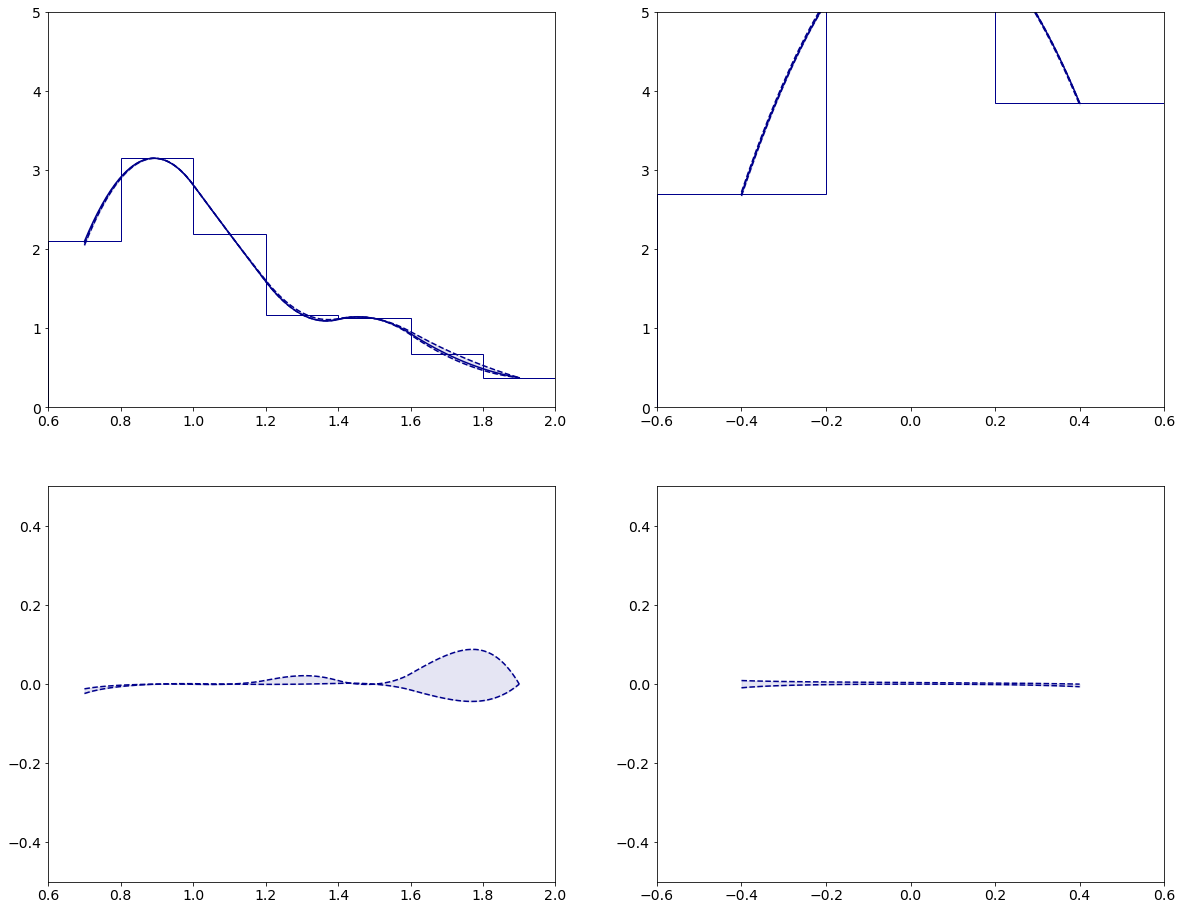

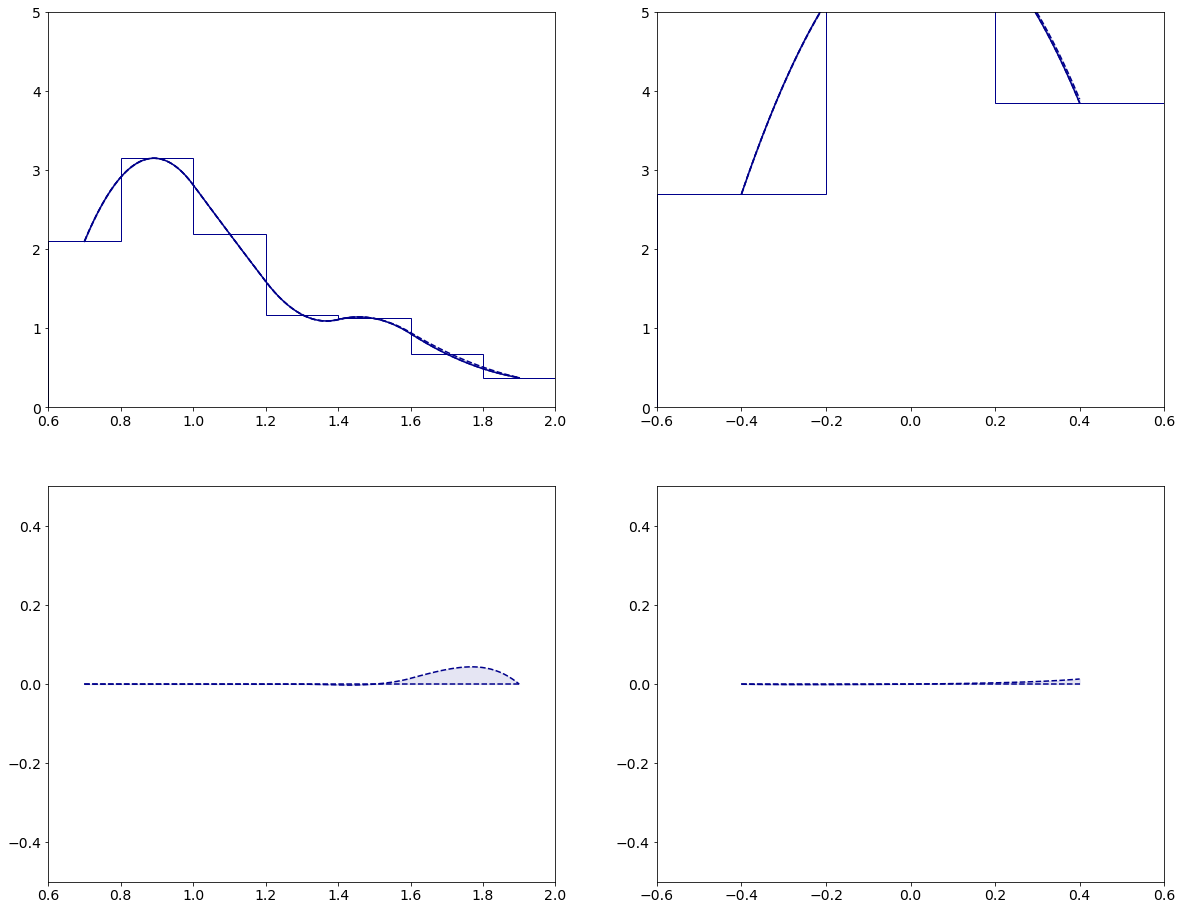

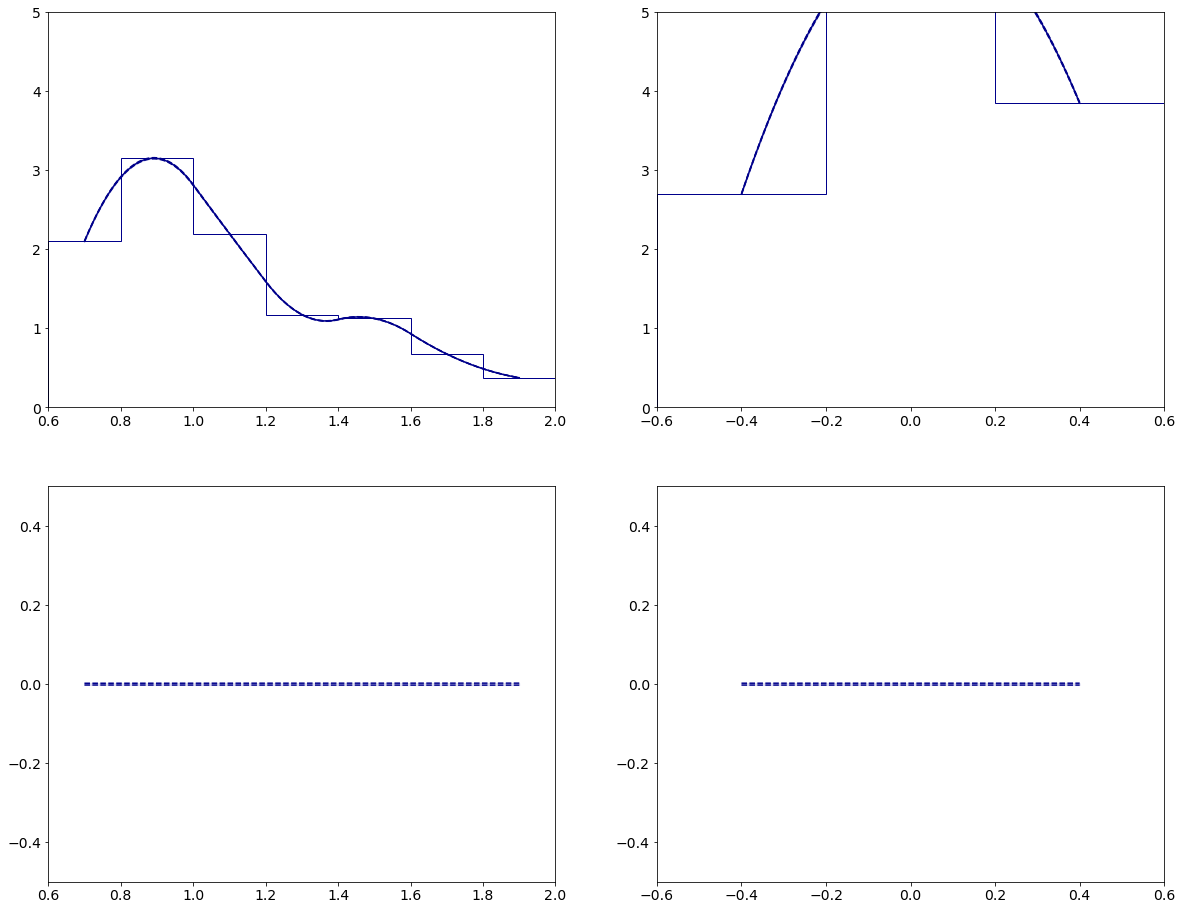

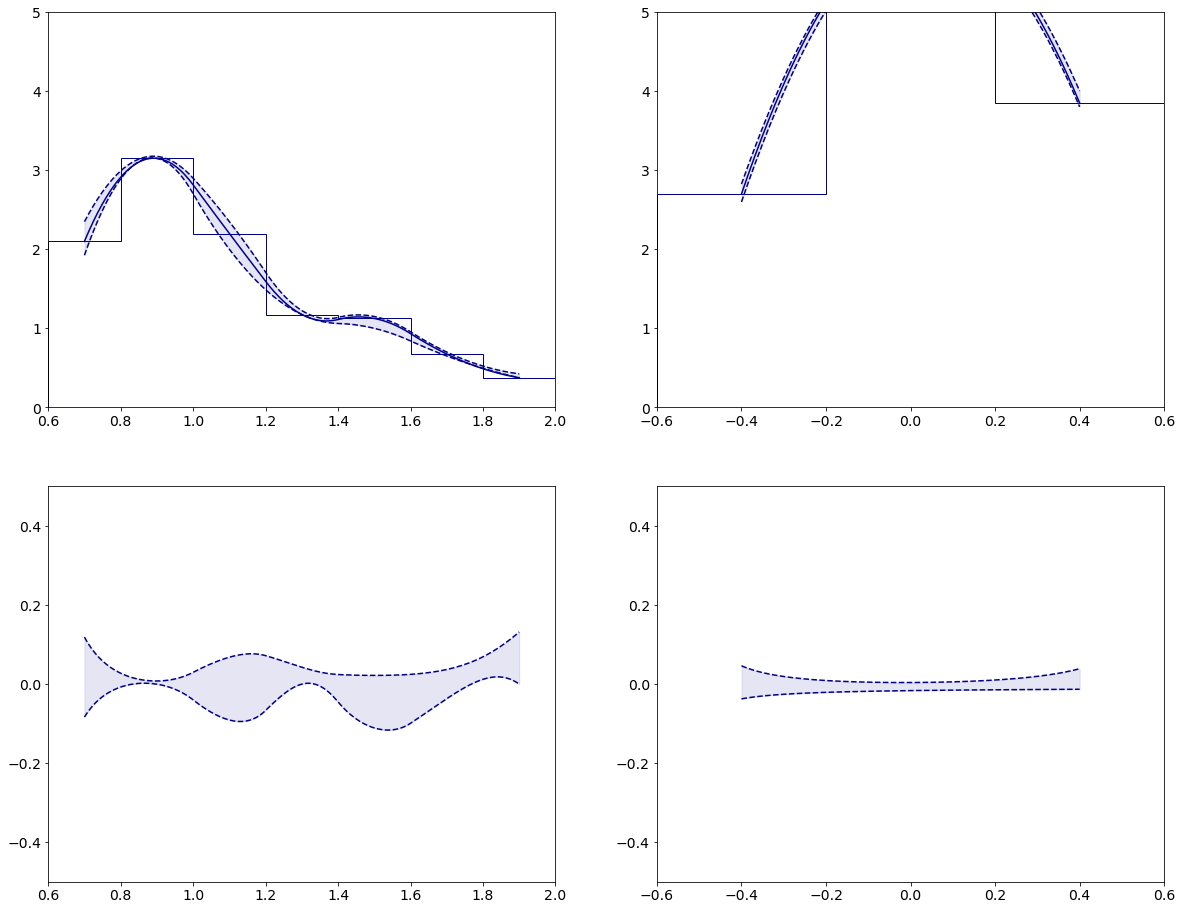

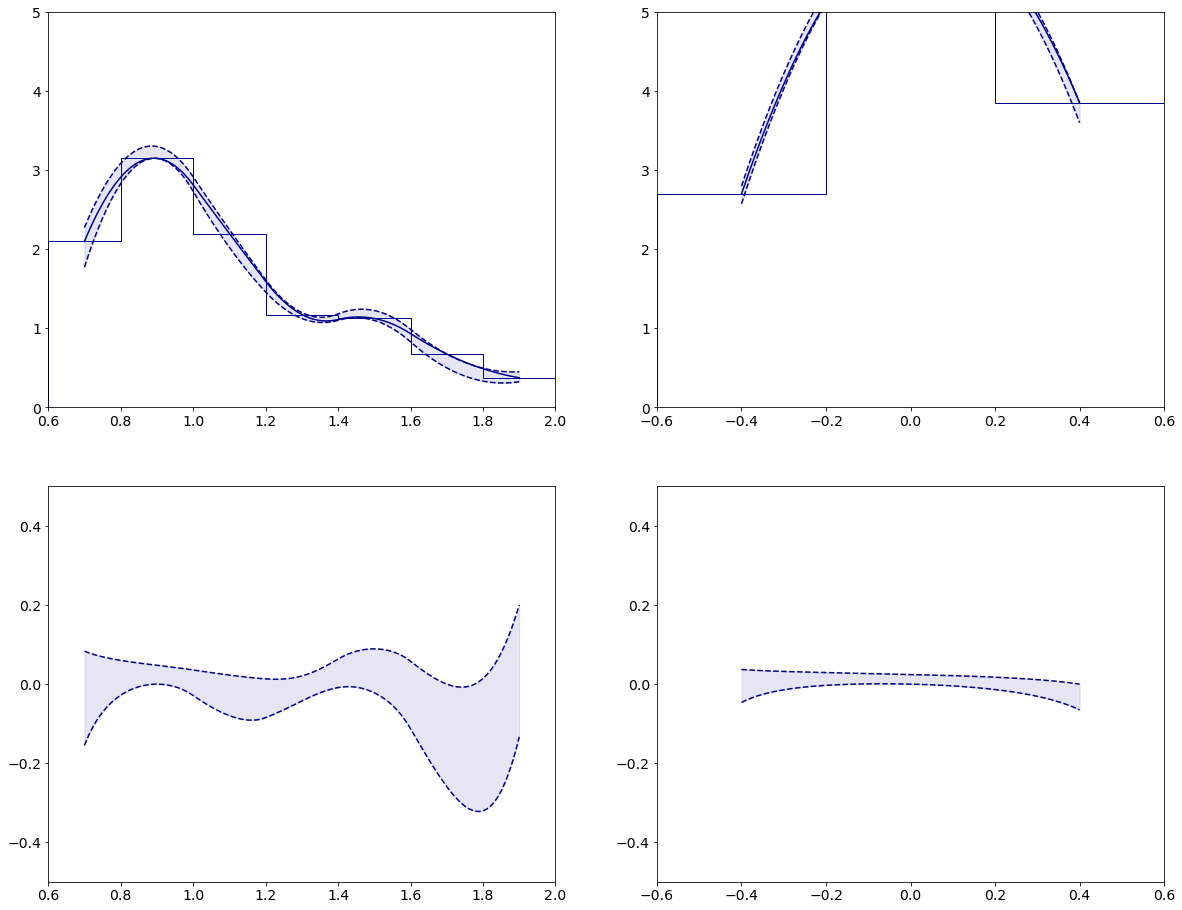

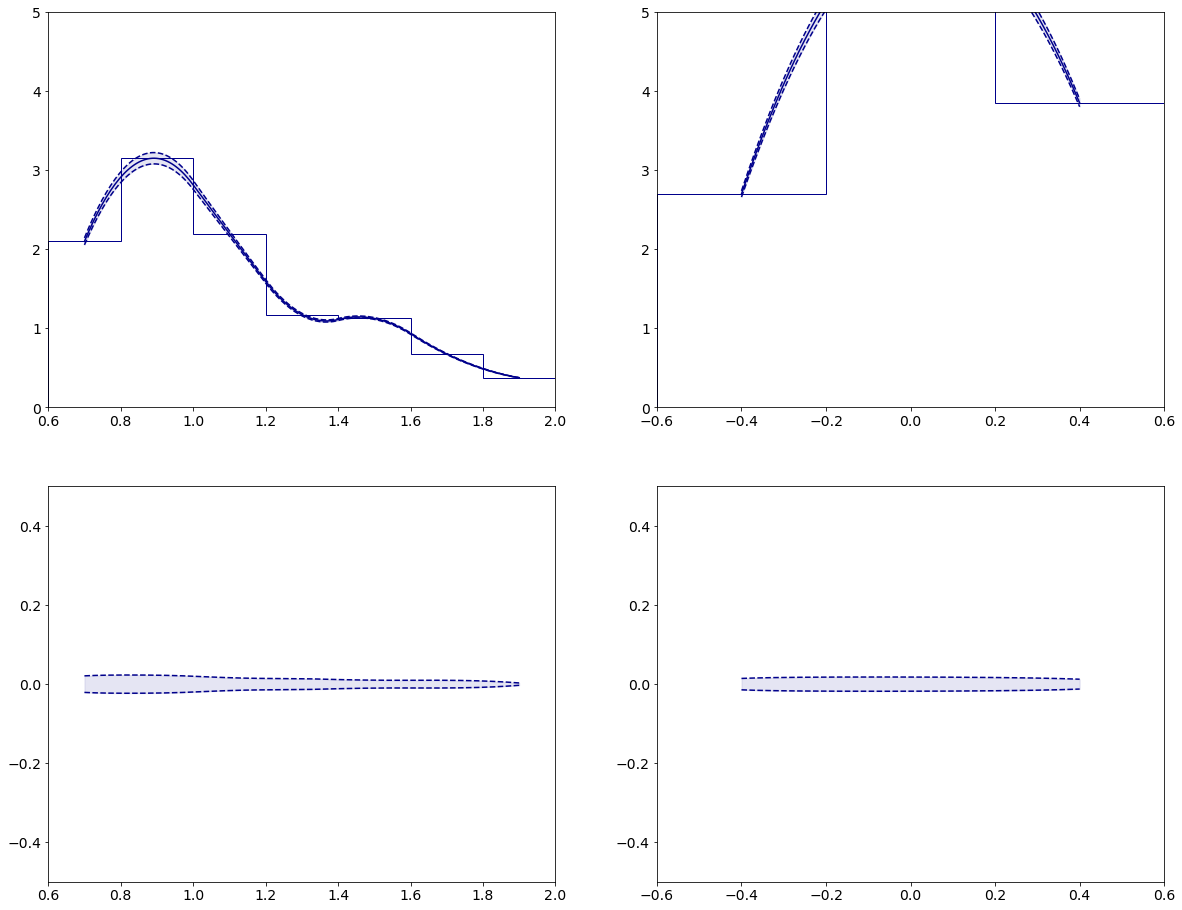

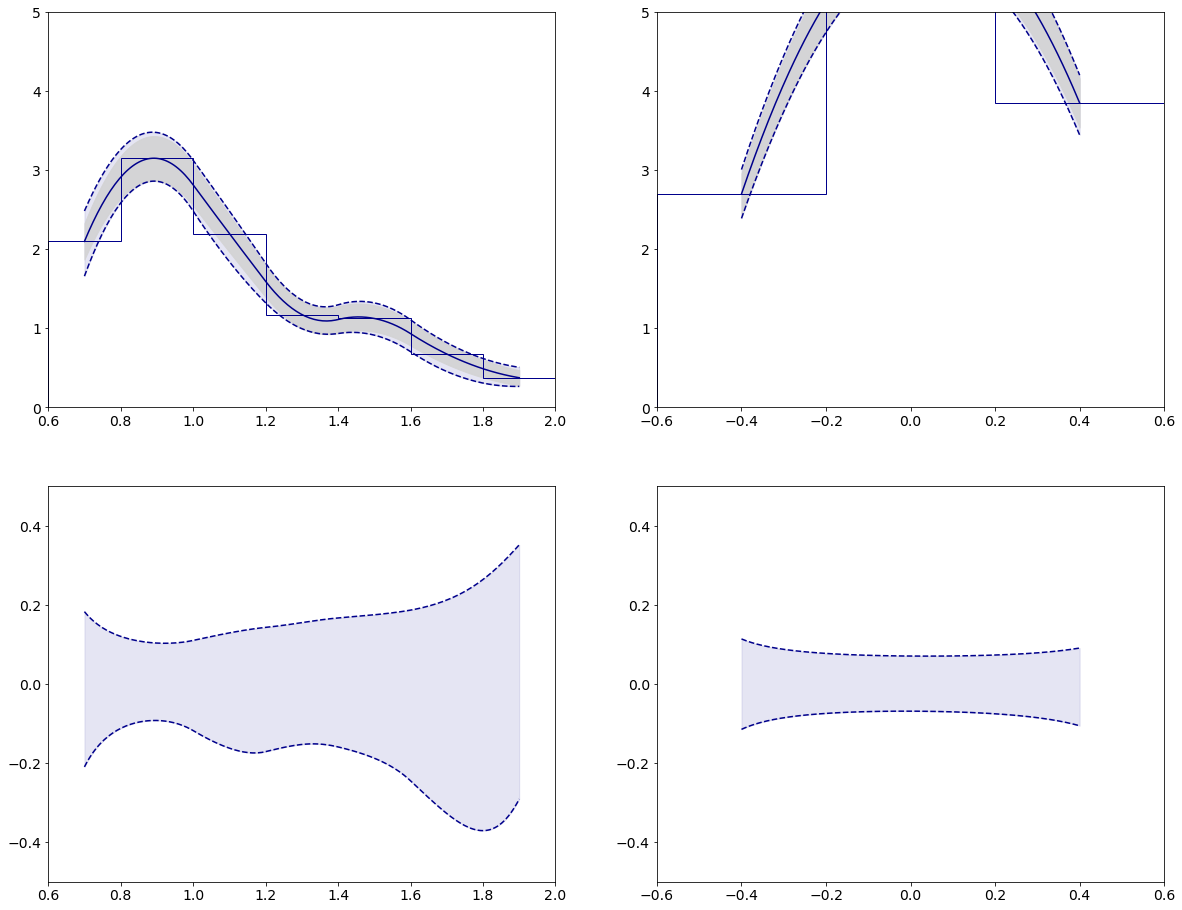

In [71]:
if data_sample == '2018':
    # ylim_ = (0.,0.3)
    ylim_ = (0.,5.)
    ylim_ratio_ = (-0.50,0.50)
    color_ = "darkblue"

    counts = {}
    err = {}
    bins = {}
    max_variations_total = {}
    min_variations_total = {}

    label_ = ""
    coupling_str_ = "A0W1e-6"
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

    counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
        df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
        weights_dict=weights_sig_plus_mix_categories_concat,
        lepton_type=lepton_type,
        label=label_,
        ylim=ylim_,
        ylim_ratio=ylim_ratio_,
        color=color_
        )

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.07433302 3.1491935  2.19911456 1.19951643 1.12457617 0.72431138
 0.37493397]
[2.04949571 3.1491935  2.19911456 1.17448761 1.12457617 0.64980174
 0.37493397]
0     -0.011899
1     -0.010946
2     -0.010073
3     -0.009271
4     -0.008532
         ...   
195    0.032870
196    0.025471
197    0.017531
198    0.009042
199    0.000000
Length: 200, dtype: float64 0.018982363195230917
0     -0.023730
1     -0.021929
2     -0.020275
3     -0.018753
4     -0.017348
         ...   
195   -0.016152
196   -0.012510
197   -0.008607
198   -0.004437
199    0.000000
Length: 200, dtype: float64 -0.009406655640493627
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[2.7236939  6.1473123  3.85018102]
[2.67421309 6.12214107 3.82510309]
0      0.009077
1      0.008920
2      0.008770
3      0.008628
4      0.008493
         ...   
195    0.000384
196    0.000296
197    0.000204
198    0.000110
199    0.000013
Length: 200,

GGToWW-AQGC-2018-muon-A0W1e-6
R_MWW_MX
[2.09931274 3.1491935  2.19911456 1.17448761 1.12457617 0.67483056
 0.37493397]
[2.32836756 3.4297472  2.4335426  1.34580509 1.29221952 0.80470243
 0.47174195]
[1.87025793 2.86863979 1.96468653 1.00317012 0.95693282 0.5449587
 0.27812599]
[2.48418724 3.47626699 2.48417705 1.35715655 1.32186301 0.81840562
 0.5070711 ]
[1.65985478 2.85967635 1.84294609 0.9952828  0.91388344 0.45398844
 0.26594011]
0      0.183334
1      0.176772
2      0.170767
3      0.165258
4      0.160190
         ...   
195    0.328256
196    0.334157
197    0.340158
198    0.346251
199    0.352428
Length: 200, dtype: float64 0.16897536695188983
0     -0.209334
1     -0.198850
2     -0.189281
3     -0.180527
4     -0.172500
         ...   
195   -0.326840
196   -0.318942
197   -0.310295
198   -0.300885
199   -0.290701
Length: 200, dtype: float64 -0.19572121905581008
Diff_YWW_YX
[2.69919281 6.12214107 3.85013192]
[2.95892437 6.51327257 4.16038554]
[2.43946126 5.73100956 3.539878

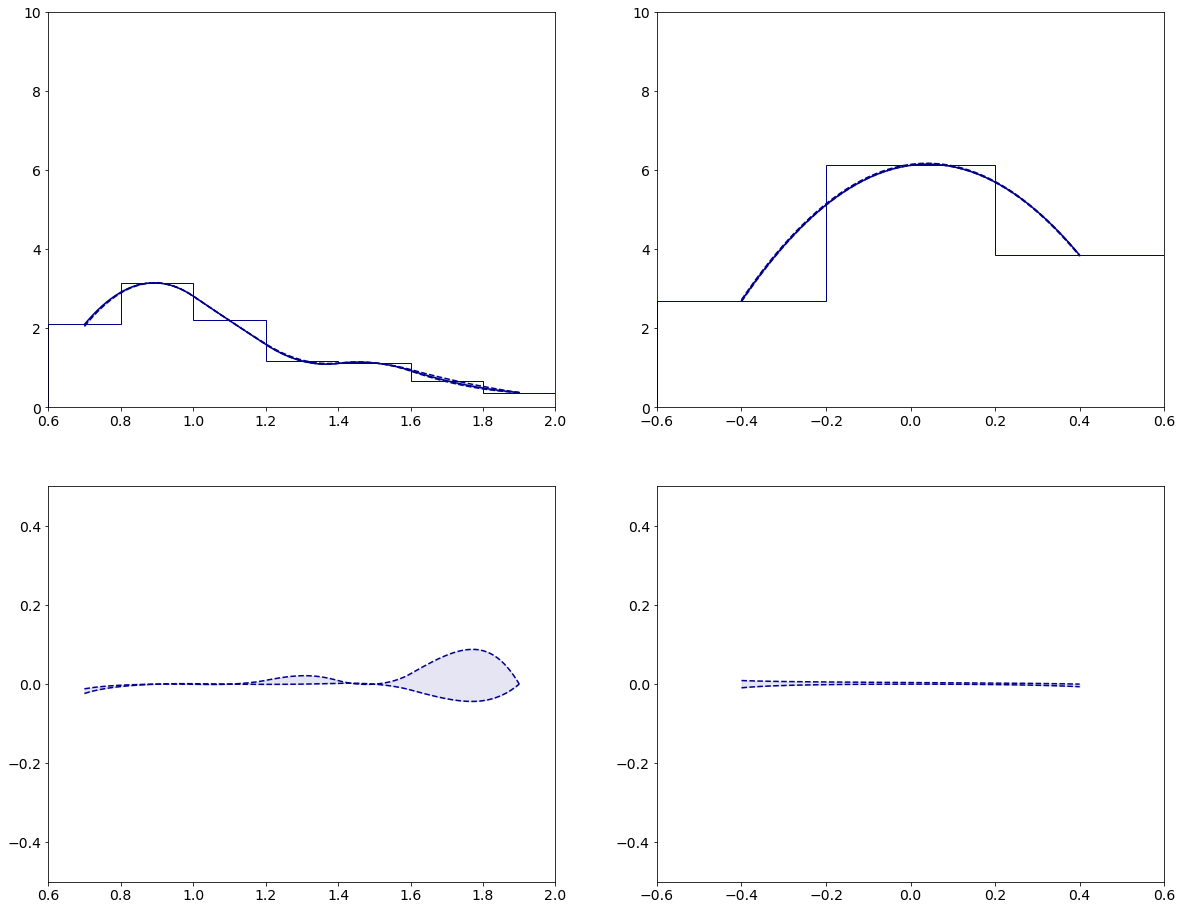

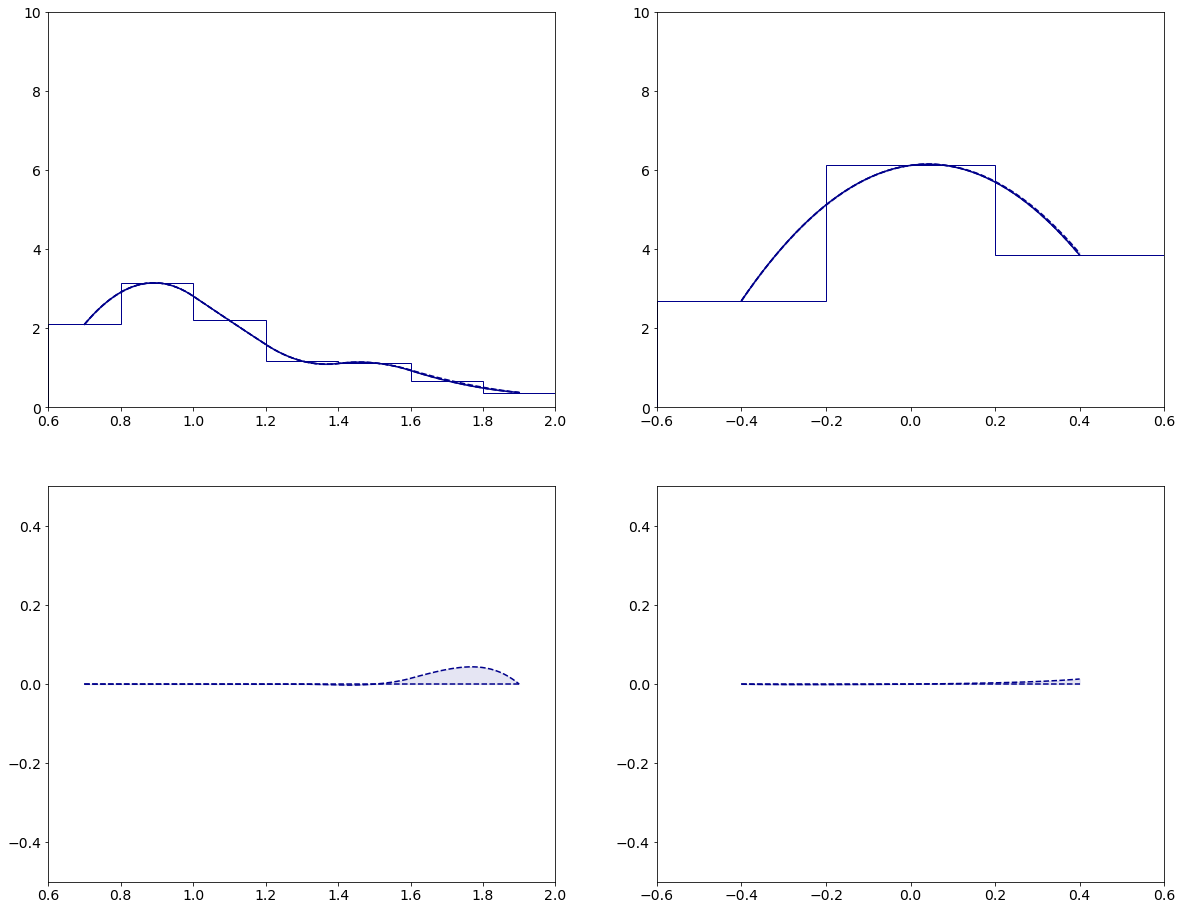

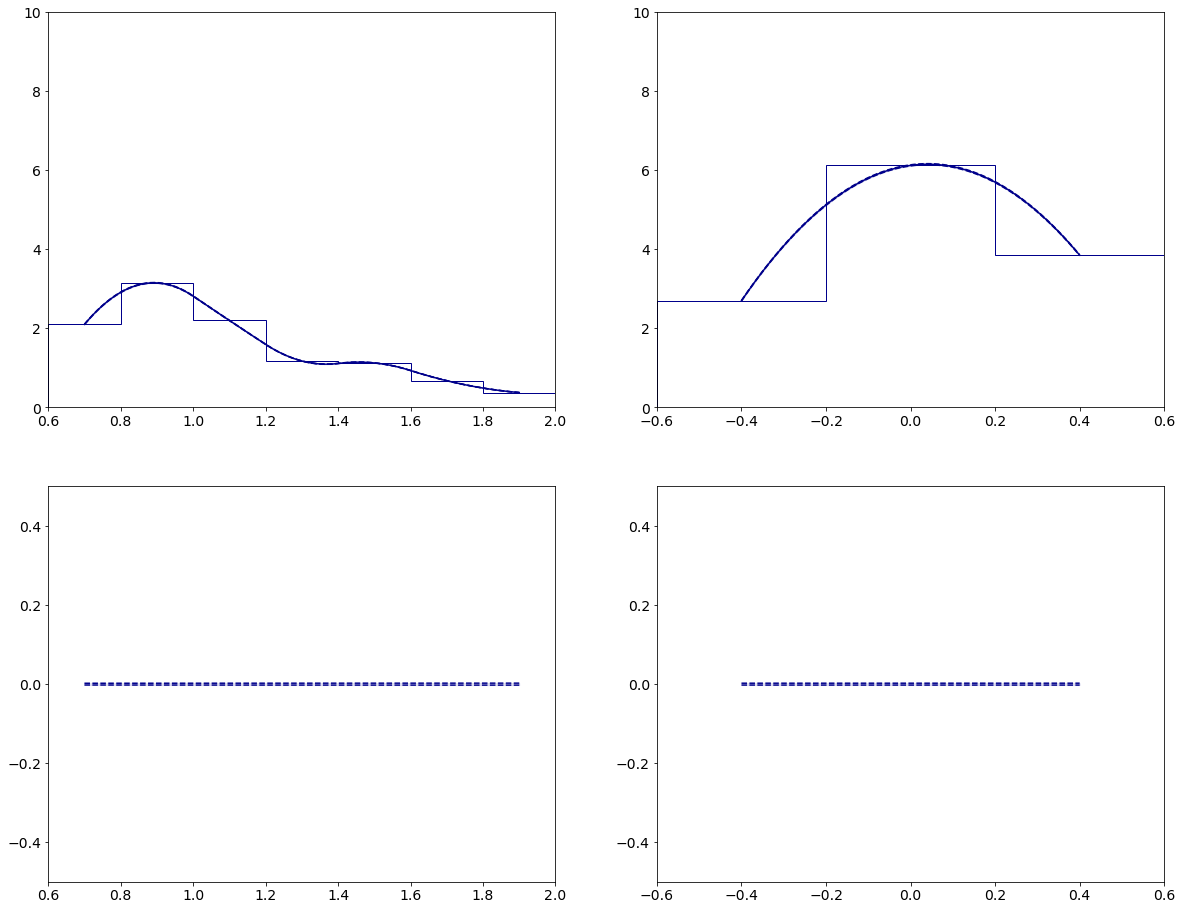

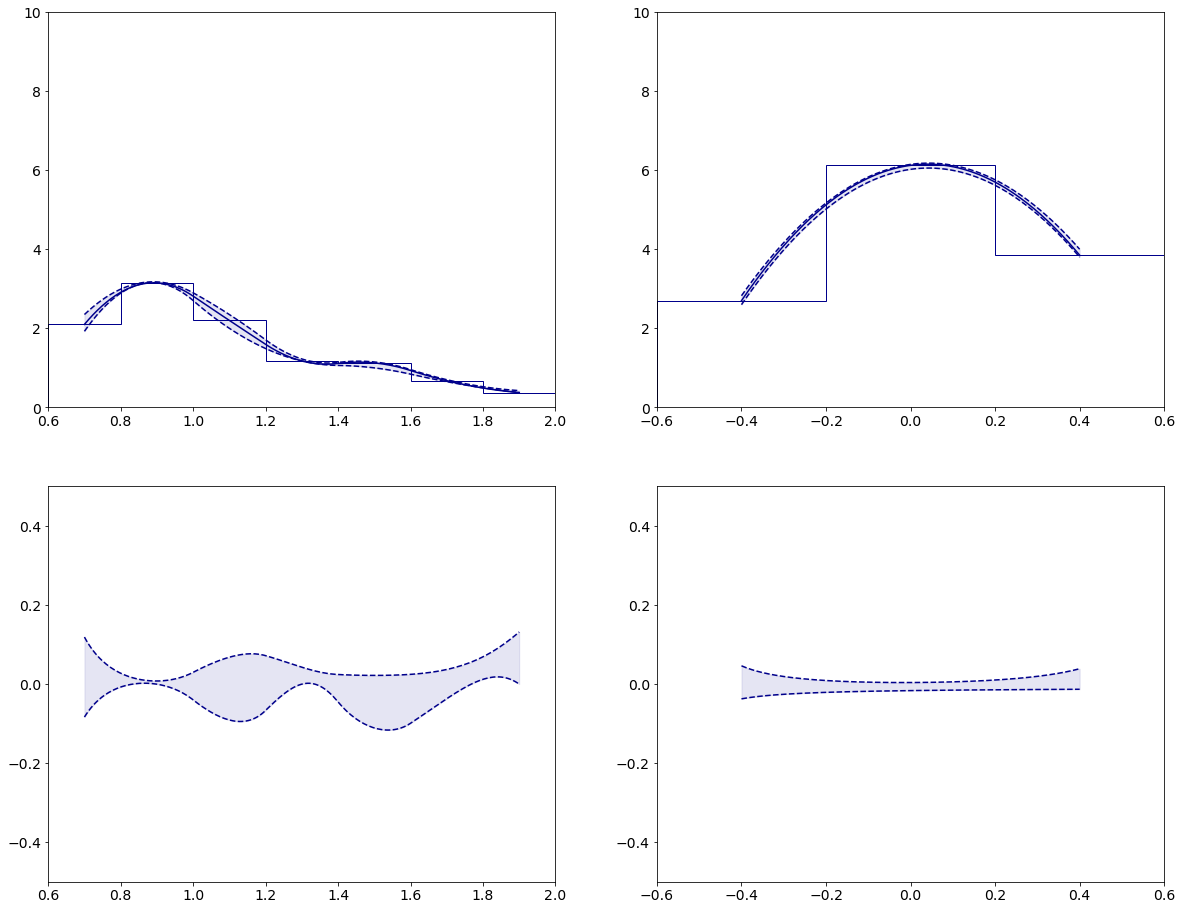

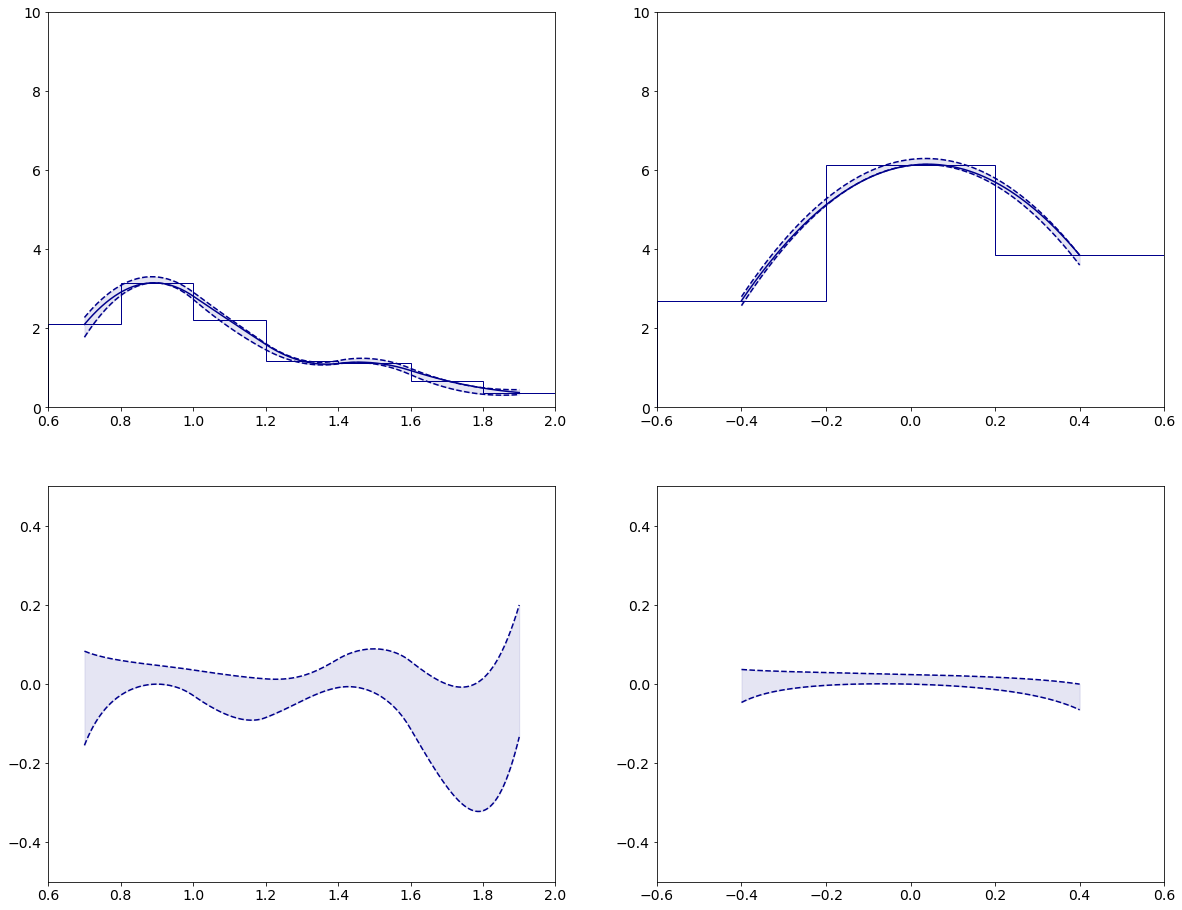

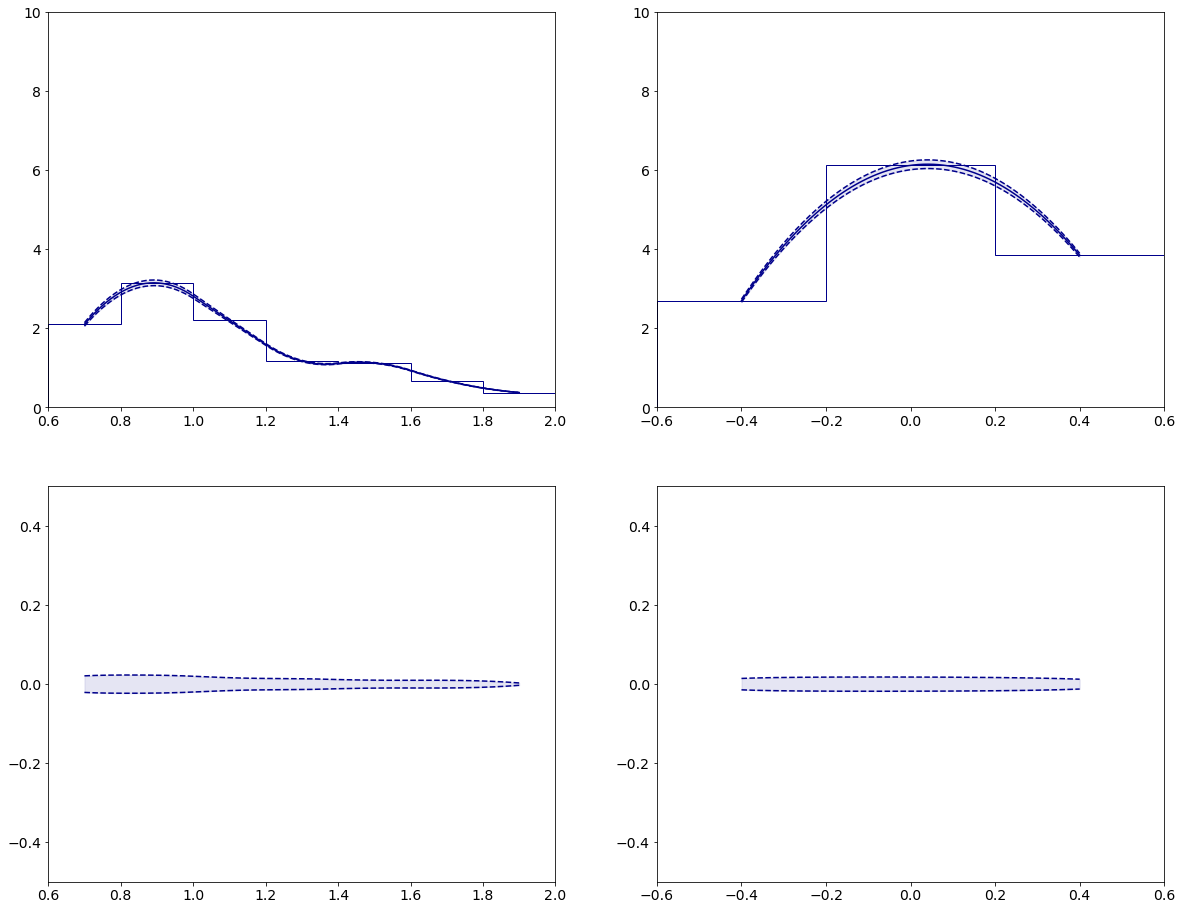

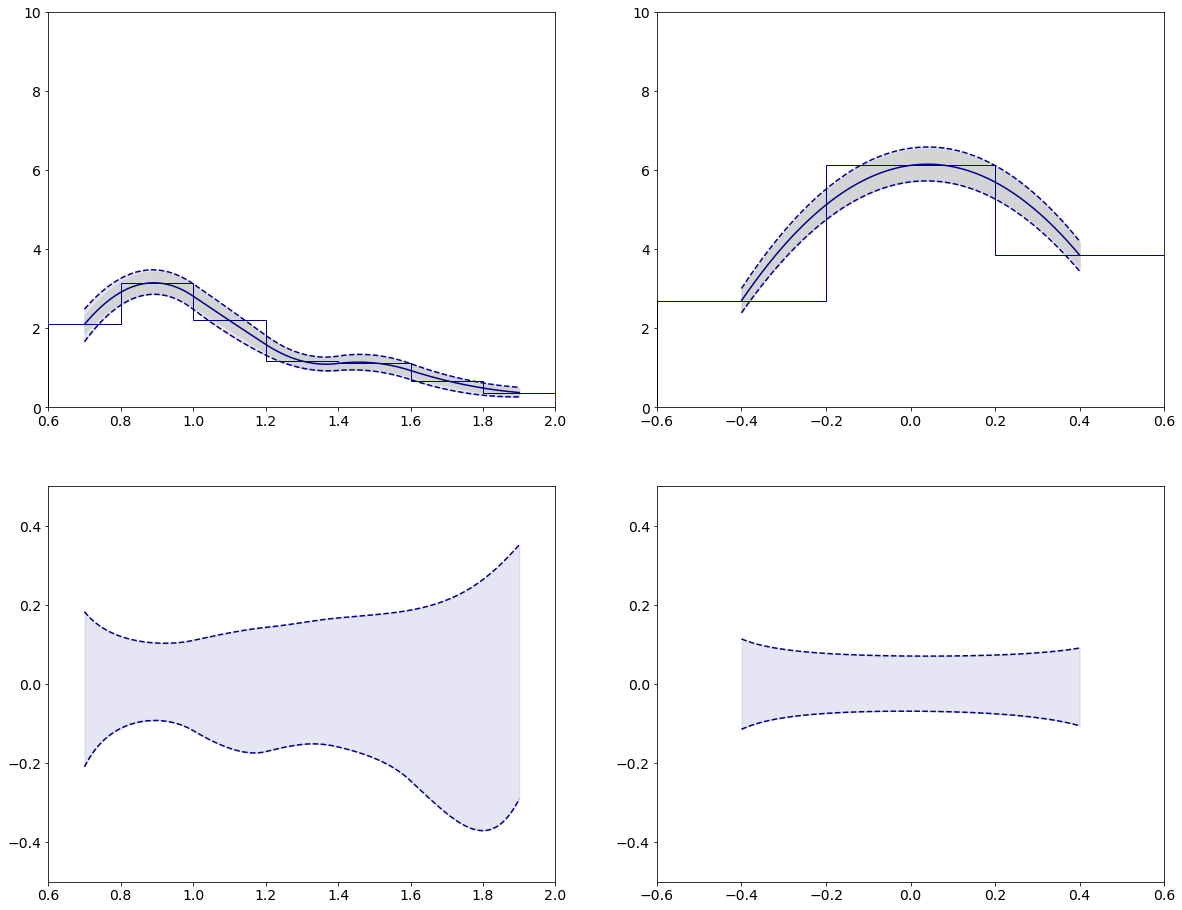

In [72]:
# ylim_ = (0.,0.3)
ylim_ = (0.,10.)
ylim_ratio_ = (-0.50,0.50)
color_ = "darkblue"

label_ = ""
coupling_str_ = "A0W1e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W1e-6"
#         label_ = "GGToWW-AQGC-muon-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W1e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_
    
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 4.20375141 10.9471557   7.63795945  5.84303386  3.82173928  2.47169714
  1.63558804]
[ 4.17188734 10.9471557   7.60609538  5.77872853  3.78958662  2.43983307
  1.60423948]
0      0.000000
1      0.000660
2      0.001197
3      0.001639
4      0.002007
         ...   
195   -0.016340
196   -0.017060
197   -0.017790
198   -0.018530
199   -0.019279
Length: 200, dtype: float64 0.0010595031669777078
0     -0.007580
1     -0.005856
2     -0.004442
3     -0.003267
4     -0.002278
         ...   
195   -0.034647
196   -0.035499
197   -0.036355
198   -0.037214
199   -0.038076
Length: 200, dtype: float64 -0.006852350354886614
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 7.15806    20.54311693 13.58067092]
[ 7.1267745  20.22264529 13.54835582]
0     -0.008873
1     -0.008016
2     -0.007219
3     -0.006475
4     -0.005779
         ...   
195   -0.001132
196   -0.001420
197   -0.001718
198   -0.002026
199   -

GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
[ 4.20375141 10.91506611  7.67011212  5.8108812   3.78958662  2.47169714
  1.66774071]
[ 4.57103703 11.50702203  8.16625331  6.24280304  4.13844764  2.75337464
  1.89901854]
[ 3.8364658  10.32311019  7.17397093  5.37895935  3.4407256   2.19001964
  1.43646287]
[ 4.96284457 11.75415357  9.50488583  6.26529246  4.17736325  2.84520927
  1.9531901 ]
[3.31574448 9.44413949 6.71122638 5.30120719 3.22821454 2.05510619
 1.35697929]
0      0.180575
1      0.161145
2      0.145281
3      0.132147
4      0.121152
         ...   
195    0.171139
196    0.171232
197    0.171268
198    0.171245
199    0.171159
Length: 200, dtype: float64 0.1305119683768947
0     -0.211242
1     -0.201764
2     -0.193920
3     -0.187321
4     -0.181695
         ...   
195   -0.182701
196   -0.183564
197   -0.184458
198   -0.185382
199   -0.186337
Length: 200, dtype: float64 -0.1403724792056131
Diff_YWW_YX
[ 7.22213981 20.38276835 13.61259807]
[ 7.70361905 21.19163857 14.27368771

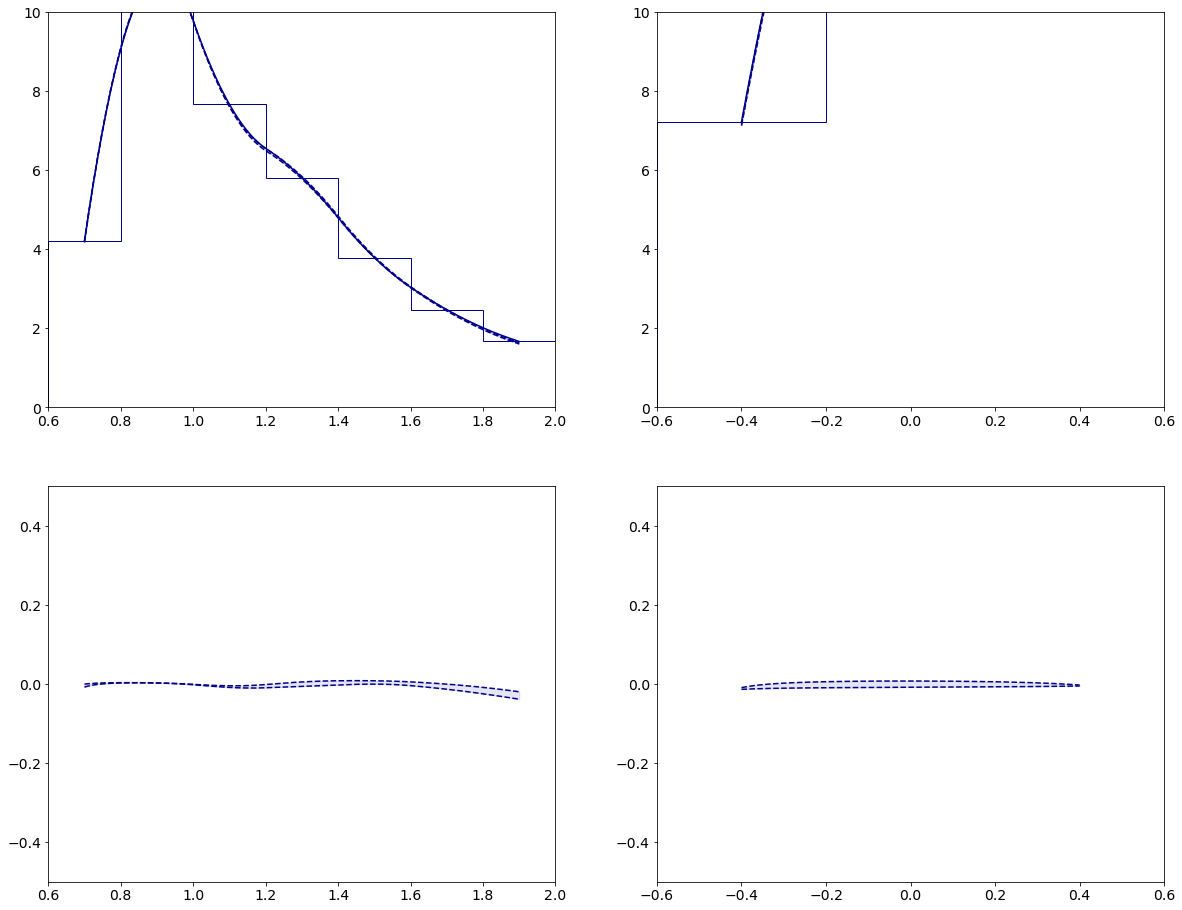

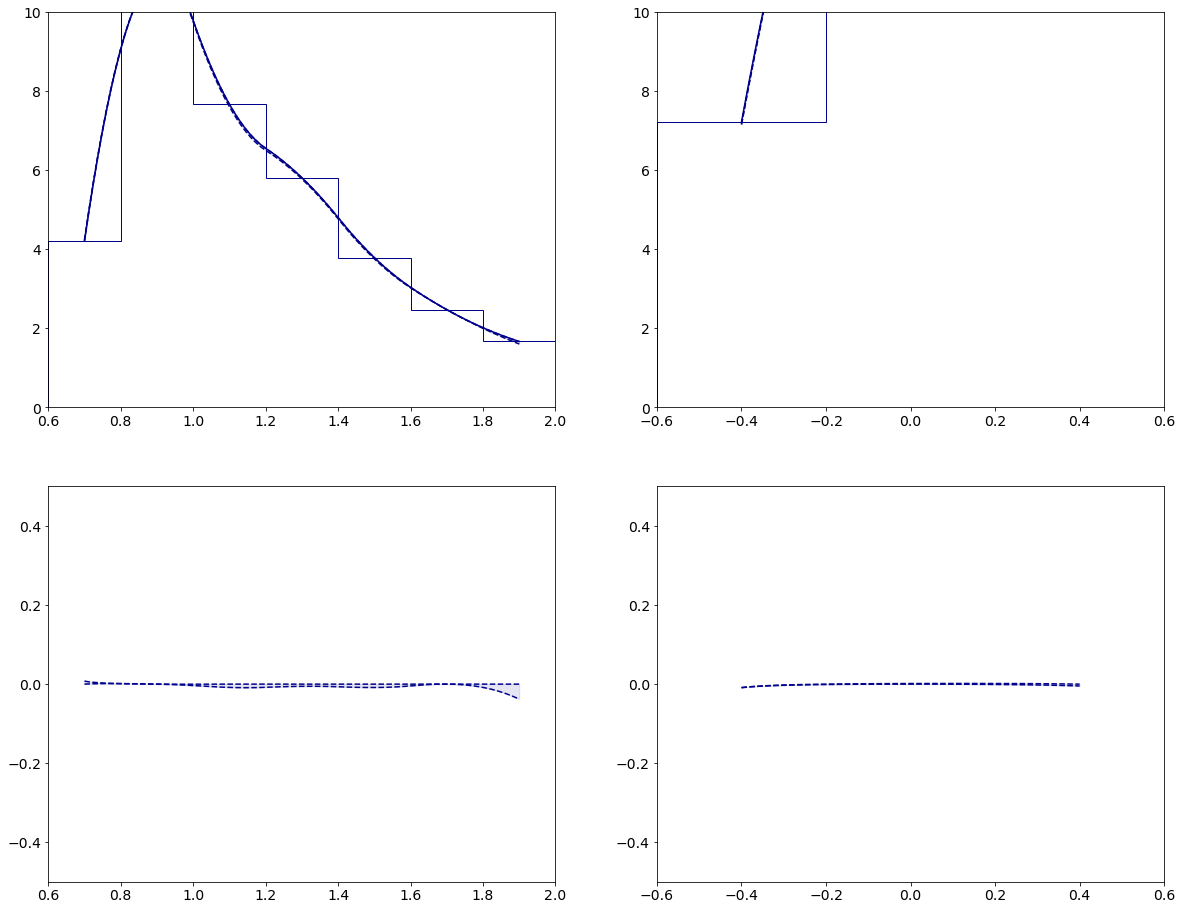

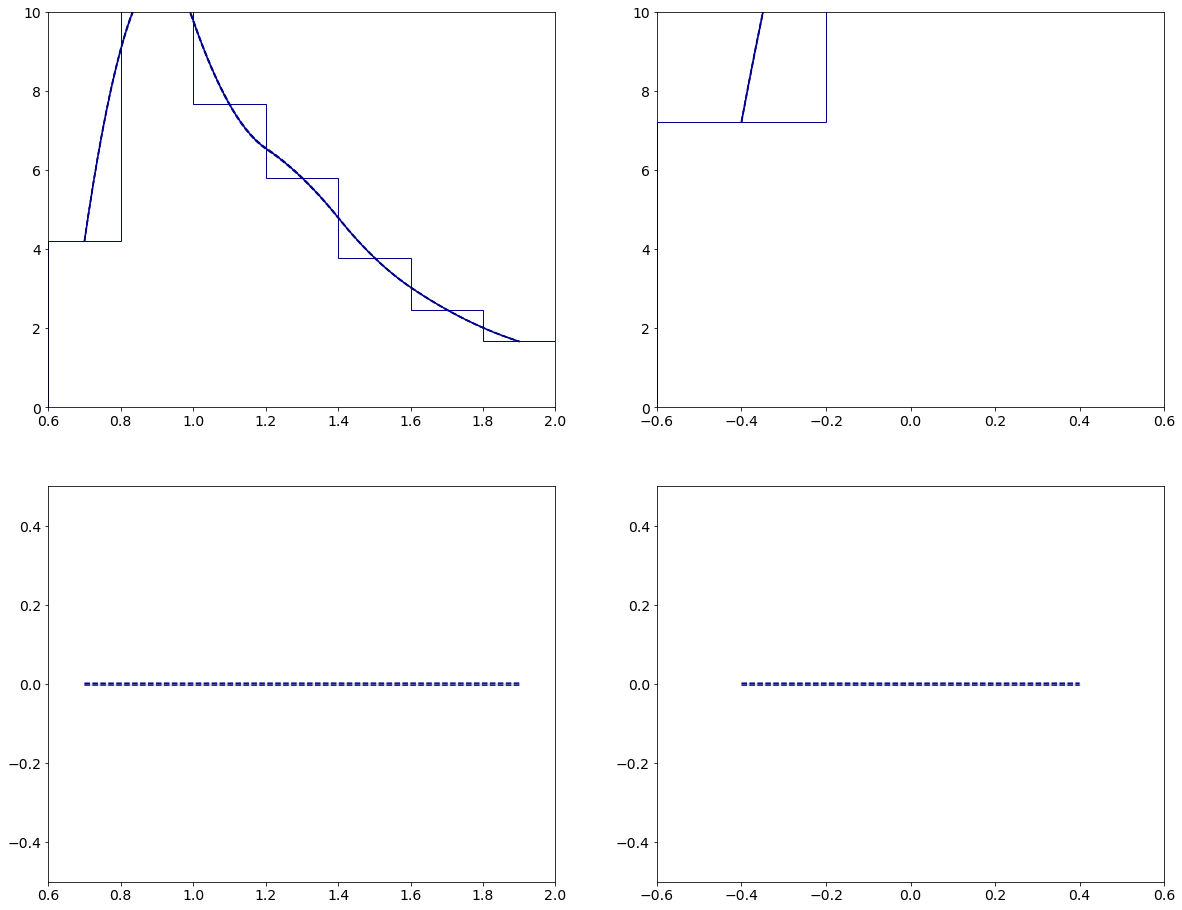

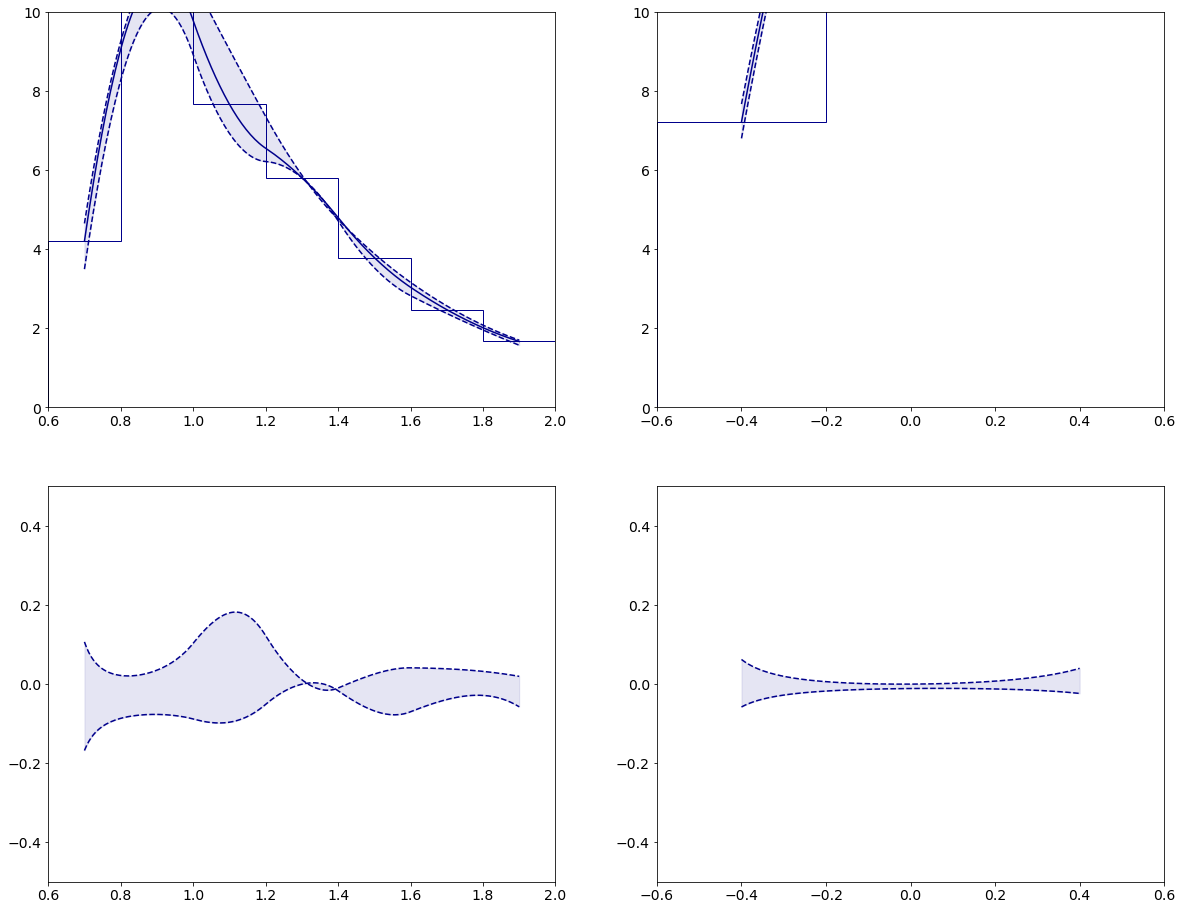

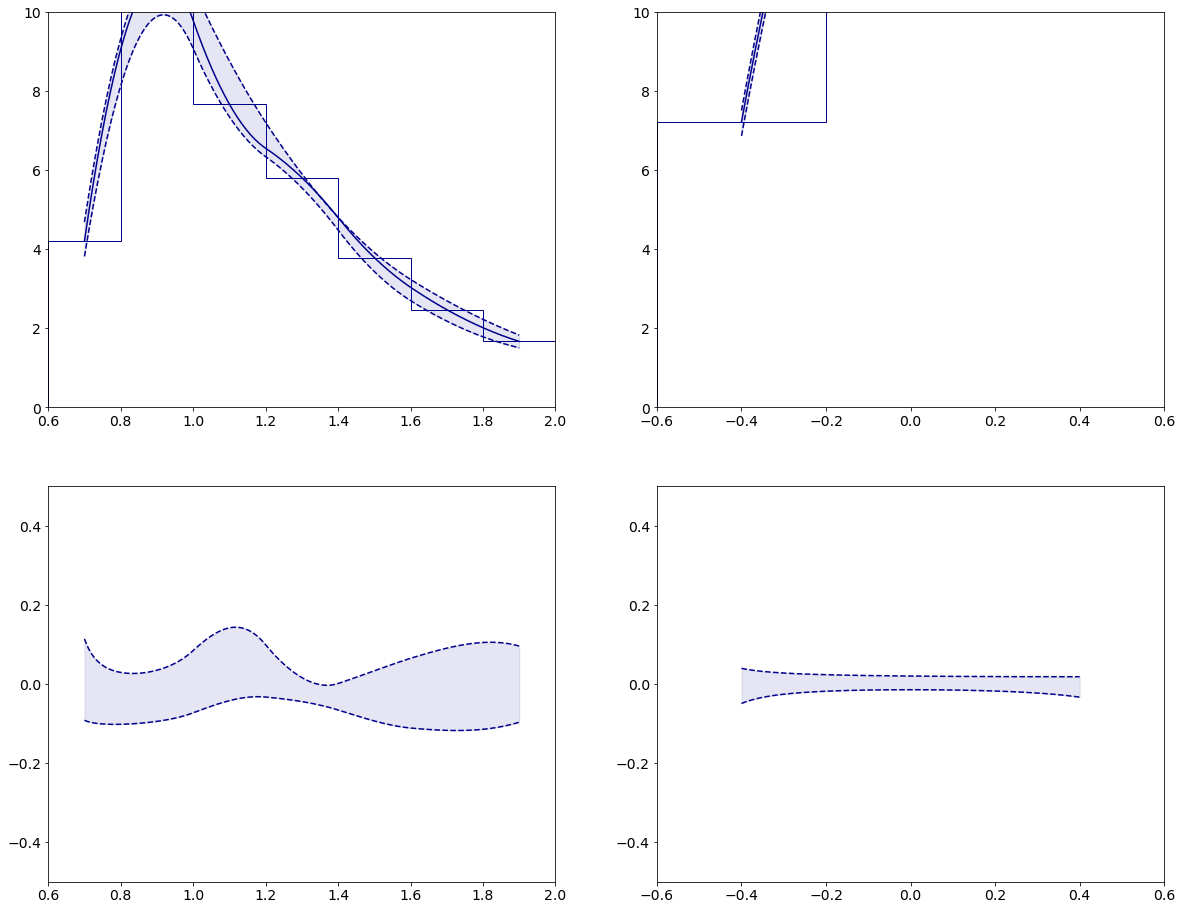

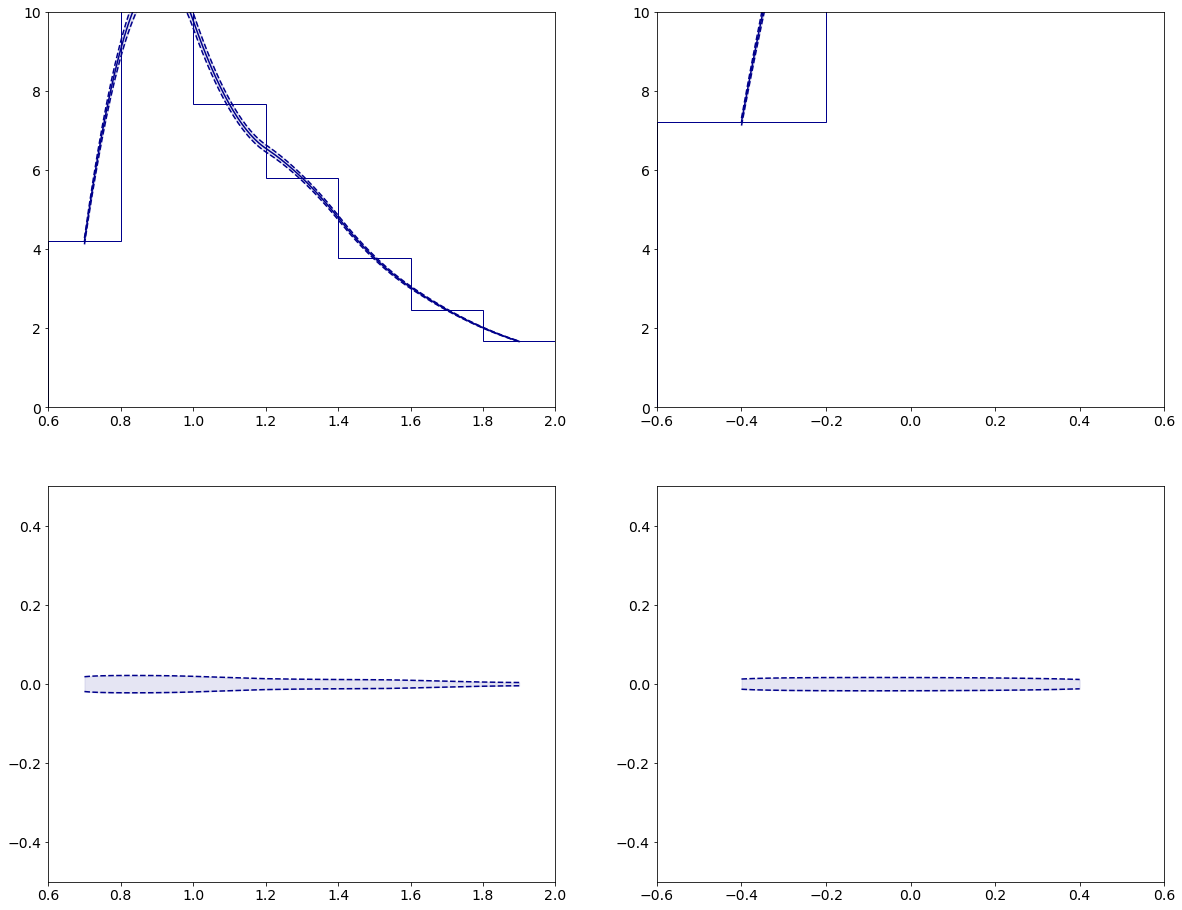

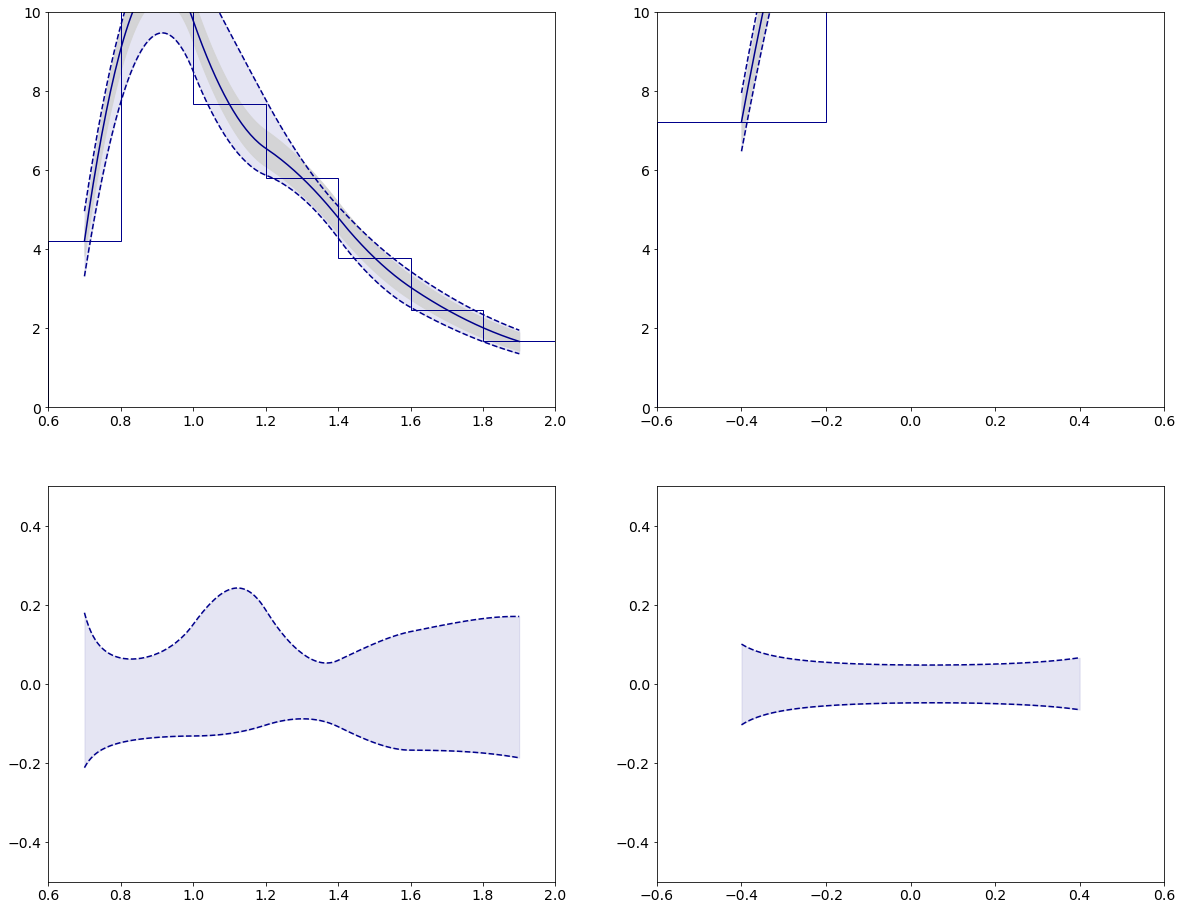

In [73]:
label_ = ""
coupling_str_ = "A0W2e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W2e-6"
#         label_ = "GGToWW-AQGC-muon-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W2e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,0.5)
# ylim_ = (0.,1.)
ylim_ = (0.,10.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[21.04037577 55.85093694 41.26850683 31.40482884 23.64831219 14.11441608
  8.88582104]
[20.95886438 55.76926533 41.18740805 30.75292204 23.48570201 13.8701343
  8.88582104]
0      0.007816
1      0.006987
2      0.006303
3      0.005731
4      0.005245
         ...   
195    0.000119
196    0.000066
197    0.000028
198    0.000005
199    0.000000
Length: 200, dtype: float64 0.004092145550150286
0      0.003912
1      0.003310
2      0.002817
3      0.002407
4      0.002061
         ...   
195   -0.006156
196   -0.004769
197   -0.003281
198   -0.001691
199    0.000000
Length: 200, dtype: float64 -0.005008783539070334
Diff_YWW_YX
_jes_up
_jes_up
nom
_jes_dw
_jes_dw
nom
[ 43.0626678  107.39410117  72.92303072]
[ 42.32665074 107.30817668  71.4556215 ]
0      0.011507
1      0.010728
2      0.009997
3      0.009310
4      0.008663
         ...   
195    0.012695
196    0.013183
197    0.013687
198    0.014208
199

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
[20.87719276 55.76926533 41.18740805 31.32389028 23.40419062 14.03258425
  8.88582104]
[22.18202365 57.90166981 43.02023278 32.92238811 24.78570385 15.10256242
  9.73693339]
[19.57236188 53.63686085 39.35458332 29.72539245 22.02267739 12.96260608
  8.03470869]
[25.30475253 58.56957624 46.95051006 33.10907098 25.28806832 16.19812849
 10.48323531]
[18.34327703 49.12796939 38.08127167 28.4896185  21.29556437 11.74289362
  7.8476045 ]
0      0.212076
1      0.187695
2      0.167705
3      0.151061
4      0.137025
         ...   
195    0.185384
196    0.184290
197    0.182993
198    0.181488
199    0.179771
Length: 200, dtype: float64 0.10578637456196165
0     -0.121372
1     -0.122802
2     -0.123924
3     -0.124810
4     -0.125511
         ...   
195   -0.139781
196   -0.134596
197   -0.129045
198   -0.123127
199   -0.116840
Length: 200, dtype: float64 -0.11299228599425434
Diff_YWW_YX
[ 42.57279834 107.79813831  71.86324651]
[ 44.43616756 110.762957

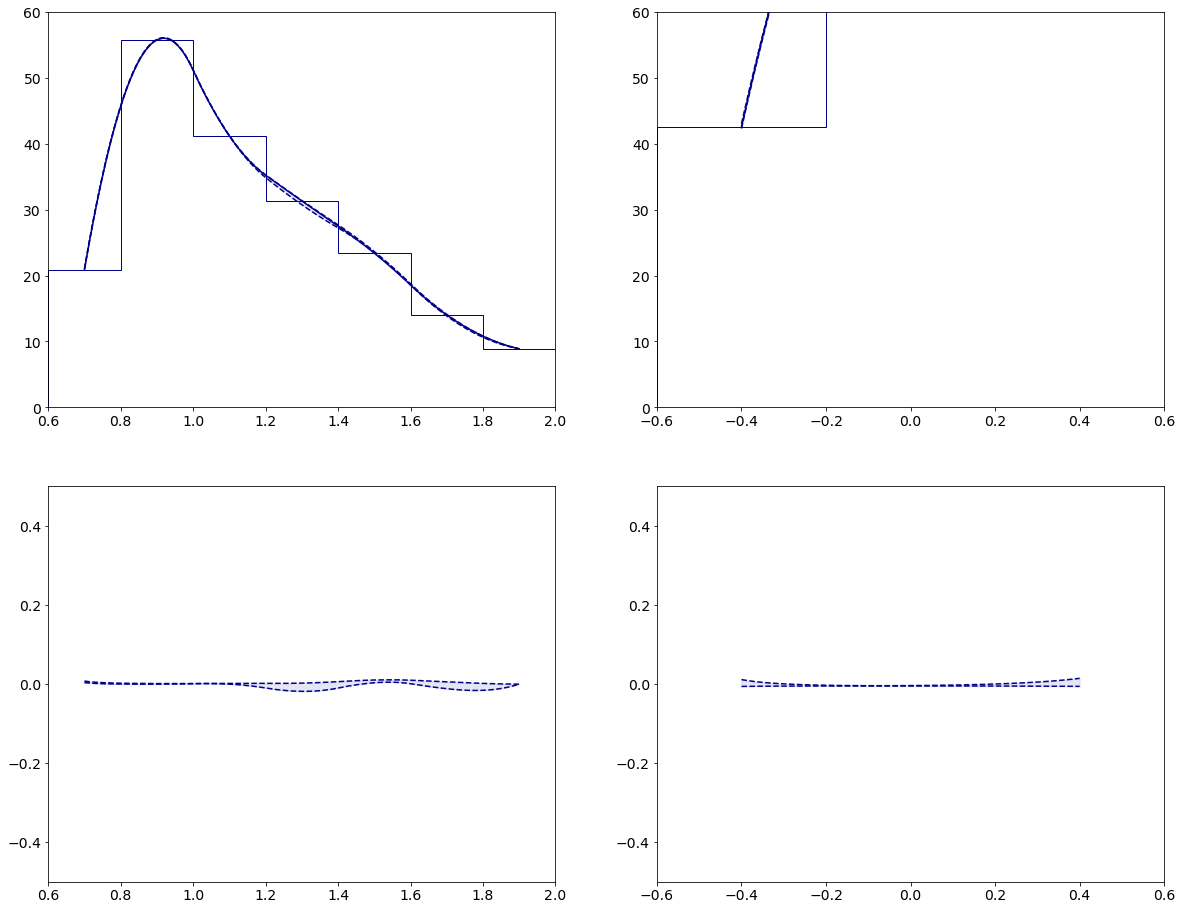

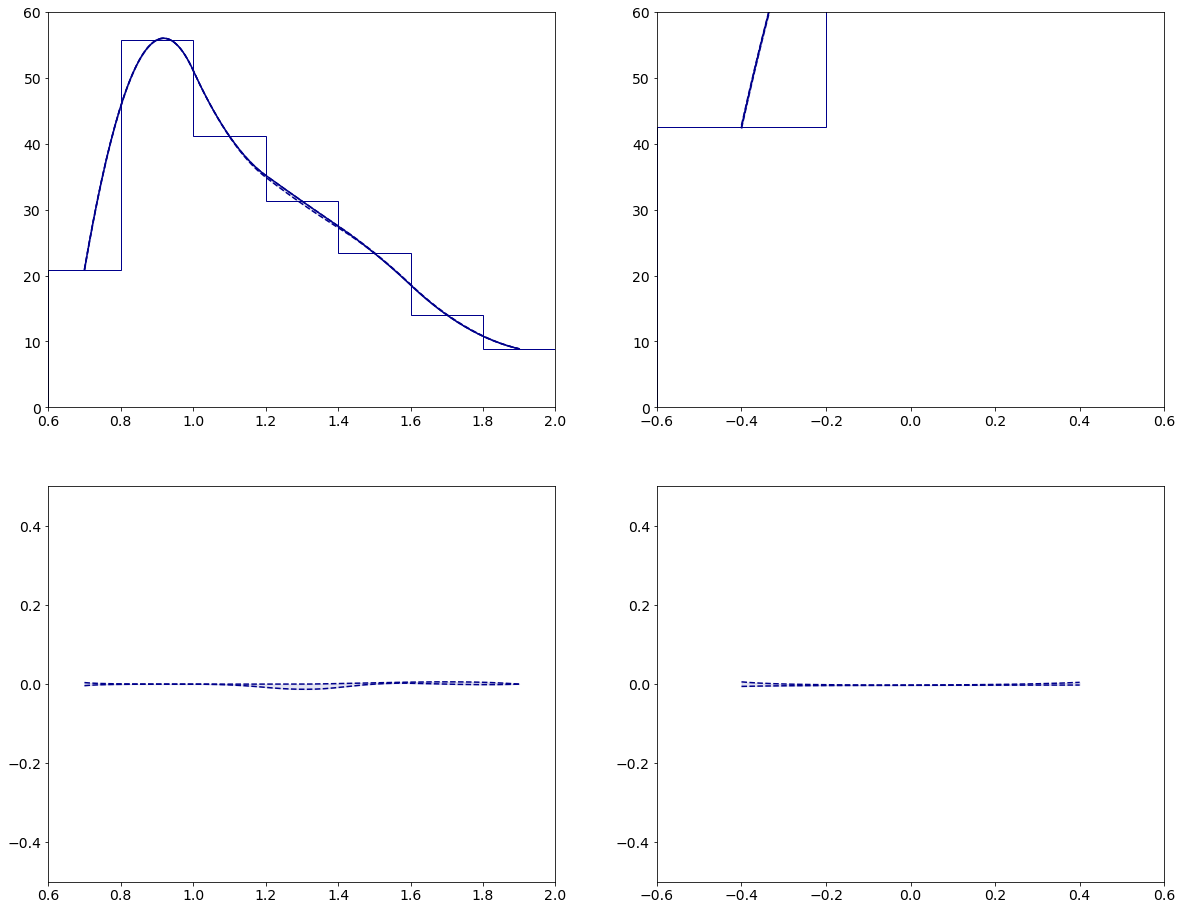

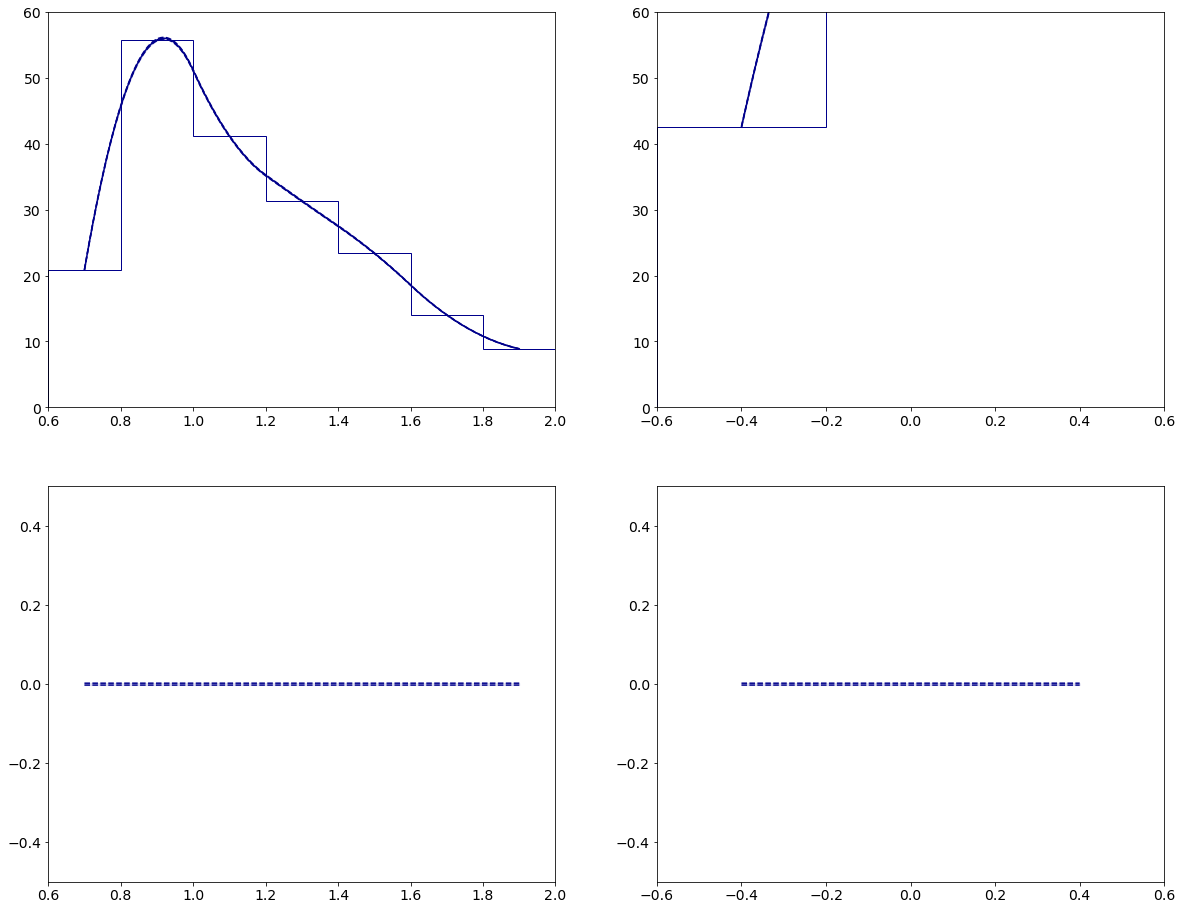

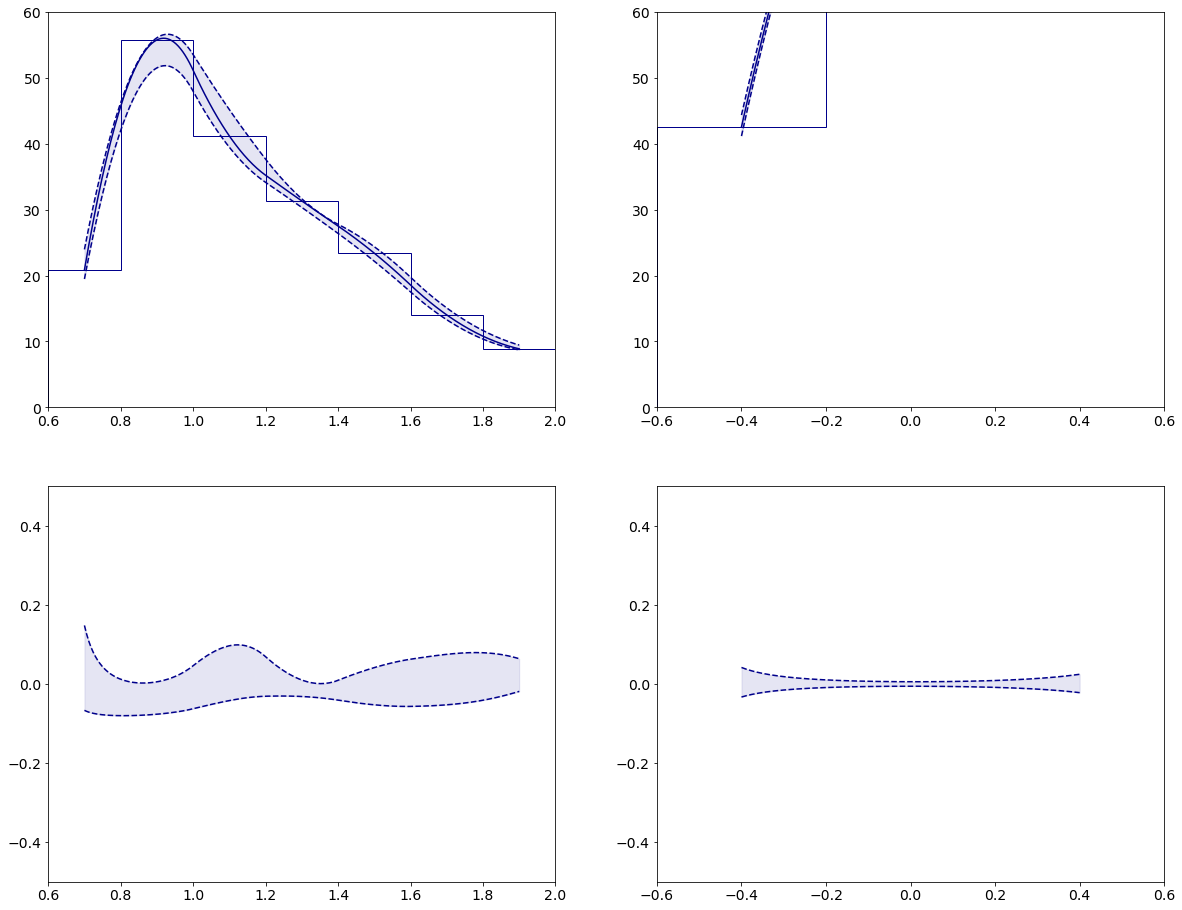

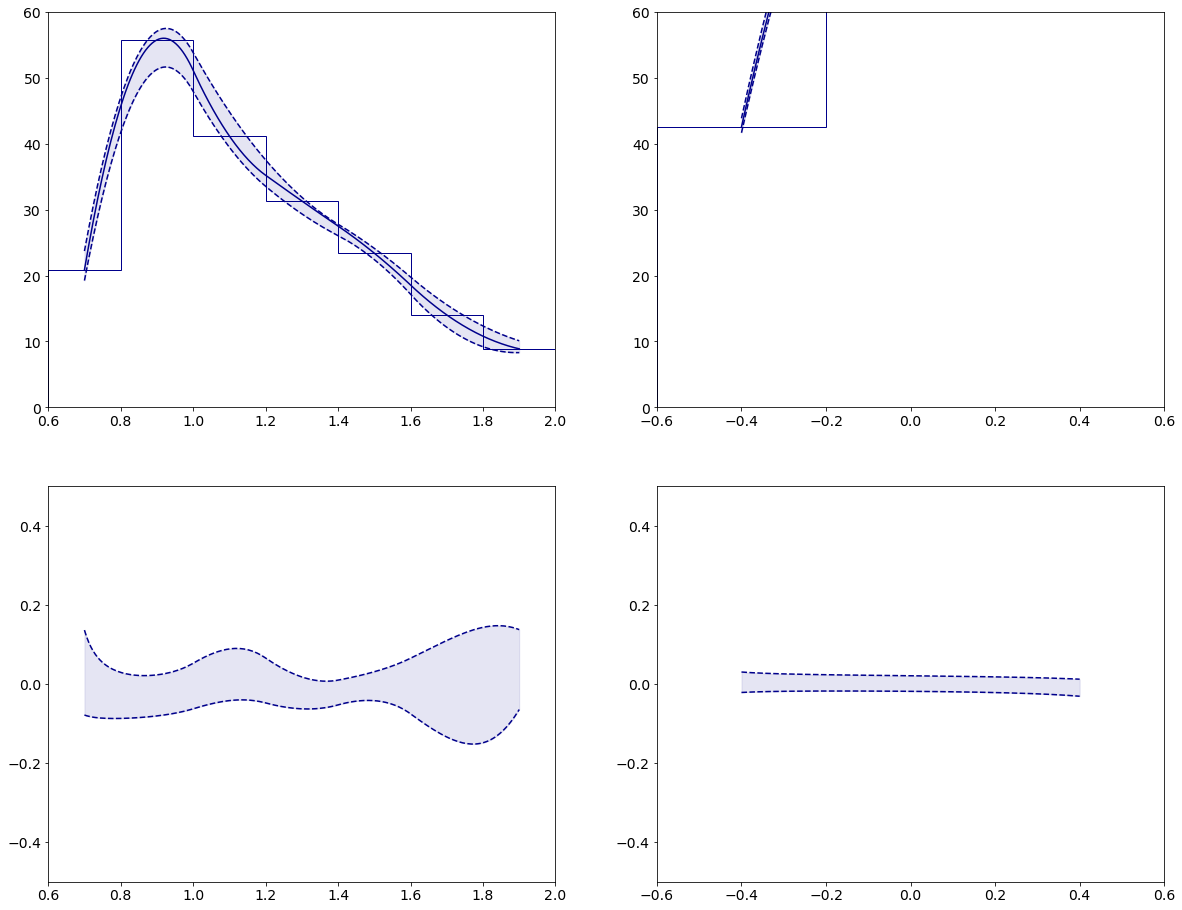

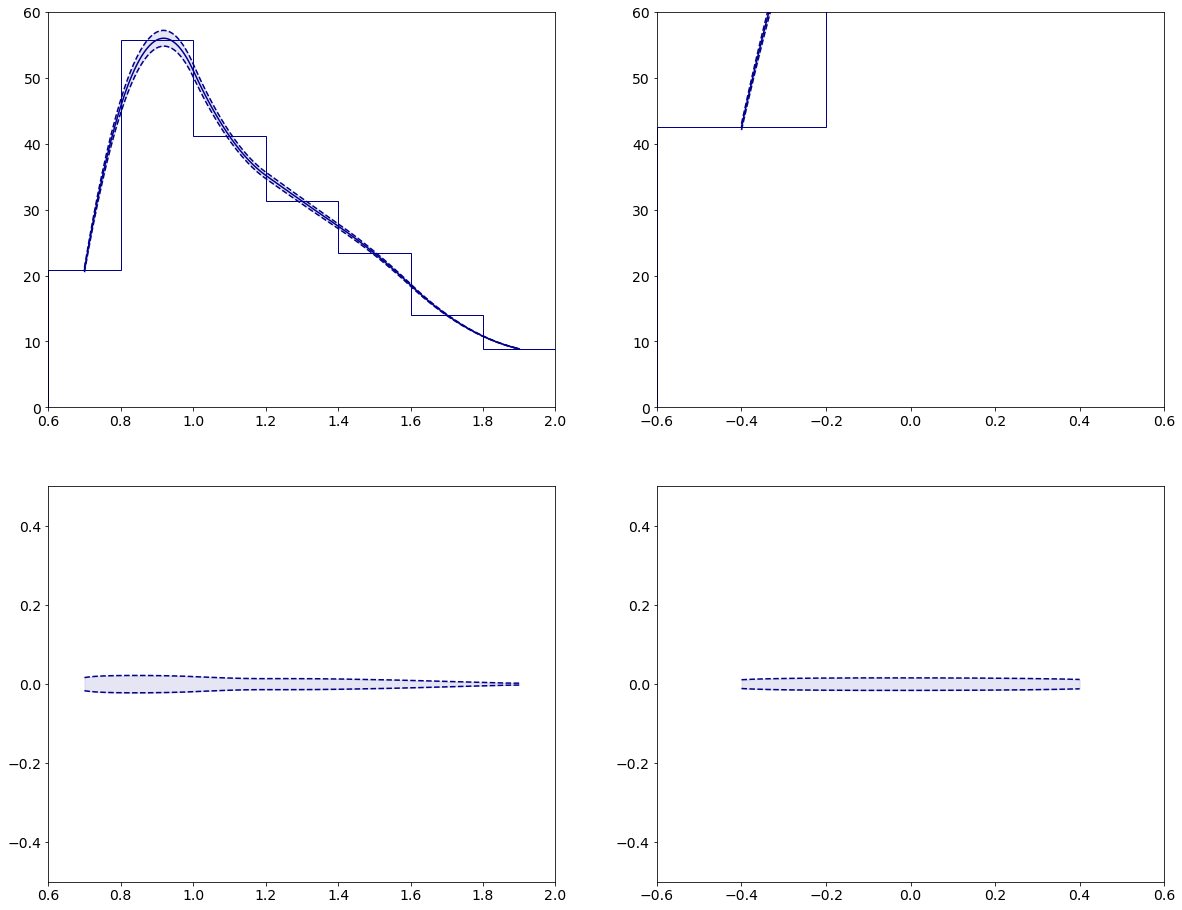

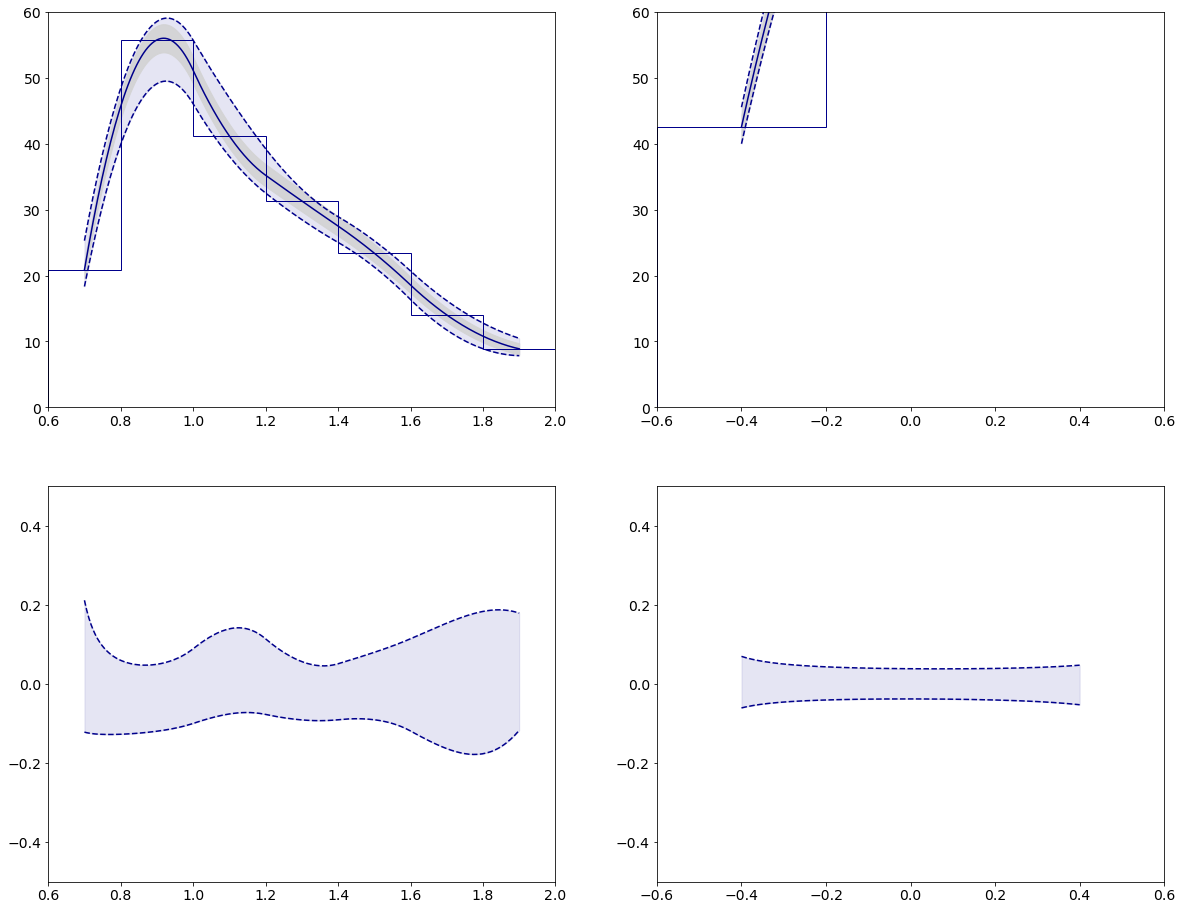

In [74]:
label_ = ""
coupling_str_ = "A0W5e-6"
if data_sample == '2017':
    if lepton_type == 'muon':
#         label_ = "GGToWW-AQGC-A0W5e-6"
#         label_ = "GGToWW-AQGC-muon-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-muon-" + coupling_str_
    elif lepton_type == 'electron':
#         label_ = "GGToWW-AQGC-electron-A0W5e-6"
        label_ = "GGToWW-AQGC-2017-electron-" + coupling_str_
if data_sample == '2018':
    if lepton_type == 'muon':
        label_ = "GGToWW-AQGC-2018-muon-" + coupling_str_
    elif lepton_type == 'electron':
        label_ = "GGToWW-AQGC-2018-electron-" + coupling_str_

# ylim_ = (0.,3.)
# ylim_ = (0.,5.)
ylim_ = (0.,60.)
counts[ label_ ], err[ label_ ], bins[ label_ ], max_variations_total[ label_ ], min_variations_total[ label_ ] = plot_total_systematic(
    df_dict=df_signals_protons_multiRP_sig_plus_mix_selected_events_categories_concat,
    weights_dict=weights_sig_plus_mix_categories_concat,
    lepton_type=lepton_type,
    label=label_,
    ylim=ylim_,
    ylim_ratio=ylim_ratio_,
    color=color_
    )

In [75]:
print ( counts )
print ( err )
print ( bins )
print ( max_variations_total )
print ( min_variations_total )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([2.09931274, 3.1491935 , 2.19911456, 1.17448761, 1.12457617,
       0.67483056, 0.37493397]), 'Diff_YWW_YX': array([2.69919281, 6.12214107, 3.85013192])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([ 4.20375141, 10.91506611,  7.67011212,  5.8108812 ,  3.78958662,
        2.47169714,  1.66774071]), 'Diff_YWW_YX': array([ 7.22213981, 20.38276835, 13.61259807])}, 'GGToWW-AQGC-2018-muon-A0W5e-6': {'R_MWW_MX': array([20.87719276, 55.76926533, 41.18740805, 31.32389028, 23.40419062,
       14.03258425,  8.88582104]), 'Diff_YWW_YX': array([ 42.57279834, 107.79813831,  71.86324651])}}
{'GGToWW-AQGC-2018-muon-A0W1e-6': {'R_MWW_MX': array([0.22905481, 0.2805537 , 0.23442804, 0.17131748, 0.16764335,
       0.12987186, 0.09680798]), 'Diff_YWW_YX': array([0.25973156, 0.39113151, 0.31025363])}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'R_MWW_MX': array([0.36728562, 0.59195592, 0.49614119, 0.43192184, 0.34886102,
       0.2816775 , 0.23127783]), '

### Background

### Load and select events

In [76]:
# ['crossingAngle', 'betaStar', 'instLumi', 'jet0_pt', 'jet0_eta',
#        'jet0_phi', 'jet0_energy', 'jet0_mass', 'jet0_corrmass',
#        'jet0_tau1', 'jet0_tau2', 'jet0_vertexz', 'jet0_px', 'jet0_py',
#        'jet0_pz', 'calo_met', 'met', 'met_x', 'met_y', 'met_phi',
#        'nVertices', 'num_bjets_ak8', 'num_bjets_ak4', 'num_jets_ak4',
#        'pfcand_nextracks', 'pfcand_nextracks_noDRl', 'recoMWhad',
#        'recoMWlep', 'recoMWW', 'recoRapidityWW', 'dphiWW', 'WLeptonicPt',
#        'WLeptonicEta', 'WLeptonicPhi', 'muon0_pt', 'muon0_eta',
#        'muon0_phi', 'muon0_energy', 'muon0_charge', 'muon0_iso',
#        'muon0_dxy', 'muon0_dz', 'muon0_trackerLayersWithMeasurement',
#        'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd',
#        'betaStar_rnd', 'period', 'jet0_pt_nom', 'jet0_energy_nom',
#        'jet0_mass_nom', 'jet0_corrmass_nom', 'jet0_px_nom', 'jet0_py_nom',
#        'jet0_pz_nom', 'muon0_pt_nom', 'muon0_energy_nom', 'muon0_px_nom',
#        'muon0_py_nom', 'muon0_pz_nom', 'WLeptonicPt_nom',
#        'WLeptonicPx_nom', 'WLeptonicPy_nom', 'WLeptonicPz_nom',
#        'WLeptonicE_nom', 'WLeptonicM_nom', 'WW_energy_nom', 'WW_pz_nom',
#        'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
#        'within_aperture', 'xlow', 'xhigh', 'ylow', 'yhigh', 'MX', 'YX',
#        'diffMWW_MX', 'ratioMWW_MX', 'shiftedRatioMWW_MX', 'diffYWW_YX',
#        'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']

In [77]:
# # resample_factor = 20
# resample_factor = 50
# # label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

# df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
# df_protons_multiRP_bkg_events = None

# base_path_ = "output"
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_bkg = store_[ "counts" ]
# #     df_protons_multiRP_bkg_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_bkg_events = store_[ "events_multiRP" ]

In [78]:
# resample_factor = 20
resample_factor = 50

# label = "data-random-resample_20"
# label = "data-random-resample_50-single-arm"

labels_background = []
fileNames_bkg = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-single-arm-muon-2017B",
            "data-random-resample_50-single-arm-muon-2017C",
            "data-random-resample_50-single-arm-muon-2017D",
            "data-random-resample_50-single-arm-muon-2017E",
            "data-random-resample_50-single-arm-muon-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-muon-2017B": "data-store-data-random-resample_50-single-arm-2017B.h5",
            "data-random-resample_50-single-arm-muon-2017C": "data-store-data-random-resample_50-single-arm-2017C.h5",
            "data-random-resample_50-single-arm-muon-2017D": "data-store-data-random-resample_50-single-arm-2017D.h5",
            "data-random-resample_50-single-arm-muon-2017E": "data-store-data-random-resample_50-single-arm-2017E.h5",
            "data-random-resample_50-single-arm-muon-2017F": "data-store-data-random-resample_50-single-arm-2017F.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-single-arm-electron-2017B",
            "data-random-resample_50-single-arm-electron-2017C",
            "data-random-resample_50-single-arm-electron-2017D",
            "data-random-resample_50-single-arm-electron-2017E",
            "data-random-resample_50-single-arm-electron-2017F"
        ]
        fileNames_bkg = {
            "data-random-resample_50-single-arm-electron-2017B": "data-store-data-random-resample_50-single-arm-electron-2017B.h5",
            "data-random-resample_50-single-arm-electron-2017C": "data-store-data-random-resample_50-single-arm-electron-2017C.h5",
            "data-random-resample_50-single-arm-electron-2017D": "data-store-data-random-resample_50-single-arm-electron-2017D.h5",
            "data-random-resample_50-single-arm-electron-2017E": "data-store-data-random-resample_50-single-arm-electron-2017E.h5",
            "data-random-resample_50-single-arm-electron-2017F": "data-store-data-random-resample_50-single-arm-electron-2017F.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_background = [
            "data-random-resample_50-2018-muon-2018A",
            "data-random-resample_50-2018-muon-2018B",
            "data-random-resample_50-2018-muon-2018C",
            "data-random-resample_50-2018-muon-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-muon-2018A": "data-store-data-random-resample_50-2018-muon-2018A.h5",
            "data-random-resample_50-2018-muon-2018B": "data-store-data-random-resample_50-2018-muon-2018B.h5",
            "data-random-resample_50-2018-muon-2018C": "data-store-data-random-resample_50-2018-muon-2018C.h5",
            "data-random-resample_50-2018-muon-2018D": "data-store-data-random-resample_50-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_background = [
            "data-random-resample_50-2018-electron-2018A",
            "data-random-resample_50-2018-electron-2018B",
            "data-random-resample_50-2018-electron-2018C",
            "data-random-resample_50-2018-electron-2018D"
        ]
        fileNames_bkg = {
            "data-random-resample_50-2018-electron-2018A": "data-store-data-random-resample_50-2018-electron-2018A.h5",
            "data-random-resample_50-2018-electron-2018B": "data-store-data-random-resample_50-2018-electron-2018B.h5",
            "data-random-resample_50-2018-electron-2018C": "data-store-data-random-resample_50-2018-electron-2018C.h5",
            "data-random-resample_50-2018-electron-2018D": "data-store-data-random-resample_50-2018-electron-2018D.h5"
        }
    
base_path_ = "output"
for label_ in fileNames_bkg:
    fileNames_bkg[ label_ ] = "{}/{}".format( base_path_, fileNames_bkg[ label_ ] )
print ( fileNames_bkg )
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label )
# print ( file_path_ )

df_counts_bkg = None
# df_protons_multiRP_bkg_index = None
df_protons_multiRP_bkg_events = None
df_protons_multiRP_bkg_events_nTracks40 = None

df_counts_bkg_list_ = []
# df_protons_multiRP_bkg_index_list_ = []
df_protons_multiRP_bkg_events_list_ = []
df_protons_multiRP_bkg_events_list_nTracks40_ = []
for label_ in labels_background:
    print ( label_ )
    file_path_ = fileNames_bkg[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_bkg__ = store_[ "counts" ]
#         df_protons_multiRP_bkg_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_bkg_events__ = store_[ "events_multiRP" ]
        df_protons_multiRP_bkg_events__ = df_protons_multiRP_bkg_events__.loc[ :, 
            ['crossingAngle',
             'jet0_eta', 'jet0_phi', 
             'jet0_tau1', 'jet0_tau2',
             'met', 'met_phi',
             'num_bjets_ak4',
             'pfcand_nextracks', 'pfcand_nextracks_noDRl',
             'WLeptonicEta', 'WLeptonicPhi',
             'muon0_eta', 'muon0_phi', 'muon0_iso',
             'run_rnd', 'lumiblock_rnd', 'event_rnd', 'crossingAngle_rnd', 'period',
             'jet0_pt_nom', 'jet0_energy_nom', 'jet0_corrmass_nom',
             'muon0_pt_nom', 
             'WLeptonicPt_nom', 
             'MWW_nom', 'YWW_nom', 'xiCMS_45_nom', 'xiCMS_56_nom', 'xi_nom',
             'MX_nom', 'YX_nom', 'R_MWW_MX_nom', 'Diff_YWW_YX_nom']
        ]

        print ( df_protons_multiRP_bkg_events__.shape[0] )
        df_protons_multiRP_bkg_events_nTracks40__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type, max_num_tracks=40 )
        print ( df_protons_multiRP_bkg_events_nTracks40__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )
        df_protons_multiRP_bkg_events_def__, selection_keys__, selections__ = select_events( df_protons_multiRP_bkg_events__, lepton_type )
        print ( df_protons_multiRP_bkg_events_def__.shape[0] )
        print ( selection_keys__ )
        print ( selections__ )    
    
        df_counts_bkg_list_.append( df_counts_bkg__ )
#         df_protons_multiRP_bkg_index_list_.append( df_protons_multiRP_bkg_index__ )
#         df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events__ )
        df_protons_multiRP_bkg_events_list_.append( df_protons_multiRP_bkg_events_def__ )
        df_protons_multiRP_bkg_events_list_nTracks40_.append( df_protons_multiRP_bkg_events_nTracks40__ )

df_counts_bkg = df_counts_bkg_list_[0]
for idx_ in range( 1, len( df_counts_bkg_list_ ) ):
    df_counts_bkg = df_counts_bkg.add( df_counts_bkg_list_[ idx_ ] )

# df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

{'data-random-resample_50-2018-muon-2018A': 'output/data-store-data-random-resample_50-2018-muon-2018A.h5', 'data-random-resample_50-2018-muon-2018B': 'output/data-store-data-random-resample_50-2018-muon-2018B.h5', 'data-random-resample_50-2018-muon-2018C': 'output/data-store-data-random-resample_50-2018-muon-2018C.h5', 'data-random-resample_50-2018-muon-2018D': 'output/data-store-data-random-resample_50-2018-muon-2018D.h5'}
data-random-resample_50-2018-muon-2018A
output/data-store-data-random-resample_50-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
4157146
78939
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 4157146, 'Muon': 4150581, 'Jet': 2972711, 'Jet_Muon': 2935630, 'MET': 2276133, 'Jet_MET': 2039004, 'PrunedMass': 567581, 'Tau21': 370167, 'BJet_Veto': 294218, 'Xi_CMS': 259819, 'WLeptonic': 170243, 'Jet_WLeptonic': 165851, 'MWW': 156470, 'ExtraTr

In [79]:
# # df_protons_multiRP_bkg_index = pd.concat( df_protons_multiRP_bkg_index_list_ )
# df_protons_multiRP_bkg_events = pd.concat( df_protons_multiRP_bkg_events_list_ )
# df_protons_multiRP_bkg_events_nTracks40 = pd.concat( df_protons_multiRP_bkg_events_list_nTracks40_ )

In [80]:
df_counts_bkg

All                     108448900
Jet                     108448900
Muon                    105076200
ProtonRnd_check_none    105076200
ProtonRnd                71804550
dtype: int64

In [81]:
df_protons_multiRP_bkg_events.columns.values

array(['crossingAngle', 'jet0_eta', 'jet0_phi', 'jet0_tau1', 'jet0_tau2',
       'met', 'met_phi', 'num_bjets_ak4', 'pfcand_nextracks',
       'pfcand_nextracks_noDRl', 'WLeptonicEta', 'WLeptonicPhi',
       'muon0_eta', 'muon0_phi', 'muon0_iso', 'run_rnd', 'lumiblock_rnd',
       'event_rnd', 'crossingAngle_rnd', 'period', 'jet0_pt_nom',
       'jet0_energy_nom', 'jet0_corrmass_nom', 'muon0_pt_nom',
       'WLeptonicPt_nom', 'MWW_nom', 'YWW_nom', 'xiCMS_45_nom',
       'xiCMS_56_nom', 'xi_nom', 'MX_nom', 'YX_nom', 'R_MWW_MX_nom',
       'Diff_YWW_YX_nom'], dtype=object)

In [82]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...  \
run    lumiblock event     slice                          ...   
316457 766       887404608 0                           0  ...   
                           3                           0  ...   
315645 279       282676384 5                           3  ...   
316457 766       887404608 6                           0  ...   
315645 279       282676384 7                           3  ...   
...                                                  ...  ...   
325022 496       801723712 1                           3  ...   
                           4                           3  ...   
                           20                          3  ...   
                           28                          3  ...   
                           45                          3  ...   

                                  WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event     slice                                          
316457 766       887404608 0           341.841736  617.227478 -0.592941   
                           3           341.841736  617.227478 -0.592941   
315645 279       28267638

In [83]:
df_protons_multiRP_bkg_events_nTracks40

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                      
316199 739       997501056  0              143.0 -0.711949  3.141166   
       431       606212352  0              148.0  1.537150 -0.524992   
       457       640544640  0              147.0 -0.252821 -2.567096   
       461       645320256  0              147.0 -0.135645 -0.994506   
       466       651308480  0              147.0  0.361461  1.984391   
...                                          ...       ...       ...   
325170 453       844710400  49             136.0 -1.037904 -2.788063   
       494       922318464  49             135.0  1.172148  2.442343   
       698       1276671616 49             132.0 -0.122631  2.536145   
       584       1081645568 49             134.0  0.914759 -0.834245   
       567       1052482304 49             134.0 -0.456844 -2.794641   

                                   jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event      slice                                               
316199 739       997501056  0       0.367093   0.203858  137.177704 -0.232372   
       431       606212352  0       0.274689   0.145763  134.065582  2.679044   
       457       640544640  0       0.355102   0.147476   52.566811  0.124150   
       461       645320256  0       0.402971   0.133848  104.933250  2.180758   
       466       651308480  0       0.281934   0.115077  286.500305 -1.026712   
...                                      ...        ...         ...       ...   
325170 453       844710400  49      0.362377   0.140179  233.978668  0.120907   
       494       922318464  49      0.262487   0.118982   51.376549 -1.032905   
       698       1276671616 49      0.422794   0.110299  148.000854 -0.438284   
       584       1081645568 49      0.472690   0.267931  226.064713  2.426128   
       567       1052482304 49      0.182705   0.094547  191.122223  0.353478   

                                   num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event      slice                                    
316199 739       997501056  0                  0                15   
       431       606212352  0                  0                40   
       457       640544640  0                  0                38   
       461       645320256  0                  0                25   
       466       651308480  0                  0                20   
...                                          ...               ...   
325170 453       844710400  49                 0                39   
       494       922318464  49                 0                18   
       698       1276671616 49                 0                25   
       584       1081645568 49                 0                38   
       567       1052482304 49                 0                27   

                                   pfcand_nextracks_noDRl  ...  \
run    lumiblock event      slice                          ...   
316199 739       997501056  0                          15  ...   
       431       606212352  0                          41  ...   
       457       640544640  0                          40  ...   
       461       645320256  0                          25  ...   
       466       651308480  0                          20  ...   
...                                                   ...  ...   
325170 453       844710400  49                         39  ...   
       494       922318464  49                         18  ...   
       698       1276671616 49                         25  ...   
       584       1081645568 49                         39  ...   
       567       1052482304 49                         27  ...   

                                   WLeptonicPt_nom     MWW_nom   YWW_nom  \
run    lumiblock event      slice                                          
316199 739       997501056  0           207.508850  504.416473 -0.354777   
       431       606212352  0           280.96

### Select events

In [84]:
# print ( df_protons_multiRP_bkg_events.shape[0] )
# df_protons_multiRP_bkg_events_nTracks15, selection_keys_, selections_ = select_events( df_protons_multiRP_bkg_events, lepton_type, max_num_tracks=15 )
# print ( df_protons_multiRP_bkg_events_nTracks15.shape[0] )
# print ( selection_keys_ )
# print ( selections_ )
# df_protons_multiRP_bkg_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_bkg_events, lepton_type )
# df_protons_multiRP_bkg_events = df_protons_multiRP_bkg_events__
# print ( df_protons_multiRP_bkg_events.shape[0] )
# print ( selection_keys_ )
# print ( selections_ )

In [85]:
norm_factors['Bkg'] = np.array( [ ( 1. / resample_factor ) ] )
df_protons_multiRP_bkg_events_nTracks40[ "norm" ] = np.product( norm_factors['Bkg'] )
df_protons_multiRP_bkg_events[ "norm" ] = np.product( norm_factors['Bkg'] )

In [86]:
df_protons_multiRP_bkg_events

crossingAngle  jet0_eta  jet0_phi  \
run    lumiblock event     slice                                      
316457 766       887404608 0              136.0 -0.648128  1.239739   
                           3              136.0 -0.648128  1.239739   
315645 279       282676384 5              144.0  1.302534  1.614148   
316457 766       887404608 6              136.0 -0.648128  1.239739   
315645 279       282676384 7              144.0  1.302534  1.614148   
...                                         ...       ...       ...   
325022 496       801723712 1              148.0  0.943451 -2.383191   
                           4              148.0  0.943451 -2.383191   
                           20             148.0  0.943451 -2.383191   
                           28             148.0  0.943451 -2.383191   
                           45             148.0  0.943451 -2.383191   

                                  jet0_tau1  jet0_tau2         met   met_phi  \
run    lumiblock event     slice                                               
316457 766       887404608 0       0.258241   0.091132   53.143974 -2.159082   
                           3       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 5       0.255488   0.127335  171.617416 -1.633066   
316457 766       887404608 6       0.258241   0.091132   53.143974 -2.159082   
315645 279       282676384 7       0.255488   0.127335  171.617416 -1.633066   
...                                     ...        ...         ...       ...   
325022 496       801723712 1       0.305149   0.128669   94.872337  0.914726   
                           4       0.305149   0.128669   94.872337  0.914726   
                           20      0.305149   0.128669   94.872337  0.914726   
                           28      0.305149   0.128669   94.872337  0.914726   
                           45      0.305149   0.128669   94.872337  0.914726   

                                  num_bjets_ak4  pfcand_nextracks  \
run    lumiblock event     slice                                    
316457 766       887404608 0                  0                 0   
                           3                  0                 0   
315645 279       282676384 5                  0                 3   
316457 766       887404608 6                  0                 0   
315645 279       282676384 7                  0                 3   
...                                         ...               ...   
325022 496       801723712 1                  0                 2   
                           4                  0                 2   
                           20                 0                 2   
                           28                 0                 2   
                           45                 0                 2   

                                  pfcand_nextracks_noDRl  ...     MWW_nom  \
run    lumiblock event     slice                          ...               
316457 766       887404608 0                           0  ...  617.227478   
                           3                           0  ...  617.227478   
315645 279       282676384 5                           3  ...  604.431396   
316457 766       887404608 6                           0  ...  617.227478   
315645 279       282676384 7                           3  ...  604.431396   
...                                                  ...  ...         ...   
325022 496       801723712 1                           3  ...  657.794128   
                           4                           3  ...  657.794128   
                           20                          3  ...  657.794128   
                           28                          3  ...  657.794128   
                           45                          3  ...  657.794128   

                                   YWW_nom  xiCMS_45_nom  xiCMS_56_nom  \
run    lumiblock event     slice                                         
316457 766       8874

In [87]:
def plot_regions_background( df_protons_multiRP_bkg_events ):
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df__[ "norm" ] )
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_bkg_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_bkg_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    msk_bkg_A =  msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_B = ~msk_bkg_cut1 &  msk_bkg_cut2
    msk_bkg_C =  msk_bkg_cut1 & ~msk_bkg_cut2
    msk_bkg_D = ~msk_bkg_cut1 & ~msk_bkg_cut2

    n_events_bkg   = np.sum( weights__ )
    err_n_events_bkg = np.sqrt( np.sum( weights__ ** 2 ) )
    n_events_bkg_A = np.sum( weights__[ msk_bkg_A ] )
    err_n_events_bkg_A = np.sqrt( np.sum( weights__[ msk_bkg_A ] ** 2 ) )
    n_events_bkg_B = np.sum( weights__[ msk_bkg_B ] )
    err_n_events_bkg_B = np.sqrt( np.sum( weights__[ msk_bkg_B ] ** 2 ) )
    n_events_bkg_C = np.sum( weights__[ msk_bkg_C ] )
    err_n_events_bkg_C = np.sqrt( np.sum( weights__[ msk_bkg_C ] ** 2 ) )
    n_events_bkg_D = np.sum( weights__[ msk_bkg_D ] )
    err_n_events_bkg_D = np.sqrt( np.sum( weights__[ msk_bkg_D ] ** 2 ) )

    print ( "Number of events: {} +/- {}".format( n_events_bkg, err_n_events_bkg ) )
    print ( "Number of events (A): {} +/- {}".format( n_events_bkg_A, err_n_events_bkg_A ) )
    print ( "Number of events (B): {} +/- {}".format( n_events_bkg_B, err_n_events_bkg_B ) )
    print ( "Number of events (C): {} +/- {}".format( n_events_bkg_C, err_n_events_bkg_C ) )
    print ( "Number of events (D): {} +/- {}".format( n_events_bkg_D, err_n_events_bkg_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    label_str_ = r"A ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    label_str_ = r"B ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| < 0.60$)"
    df__[ msk_bkg_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"C ($M_{WW} / M_{X} > 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    label_str_ = r"D ($M_{WW} / M_{X} < 0.80$  $|Y_{WW} - Y_{pp}| > 0.60$)"
    df__[ msk_bkg_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=12 )
    ax.text( 0.80, 0.75, "Background", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )

    if save_figures:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-2D-Background.png", bbox_inches='tight' )
        
    return ( ( n_events_bkg_A, err_n_events_bkg_A ),
             ( n_events_bkg_B, err_n_events_bkg_B ),
             ( n_events_bkg_C, err_n_events_bkg_C ),
             ( n_events_bkg_D, err_n_events_bkg_D ) )

Number of events: 7813.260000000004 +/- 12.500607985214158
Number of events (A): 1126.68 +/- 4.746956919964622
Number of events (B): 2881.76 +/- 7.591785033837564
Number of events (C): 875.08 +/- 4.18349136487695
Number of events (D): 2929.7400000000002 +/- 7.65472403160297


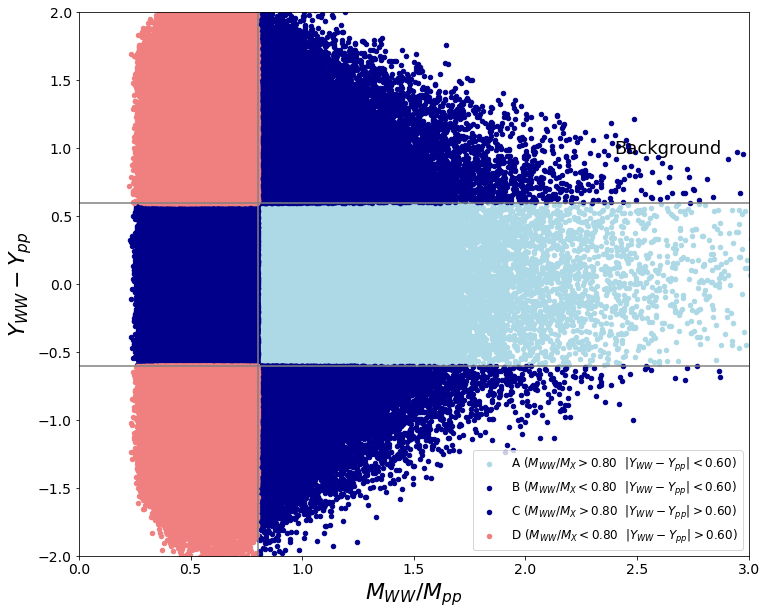

In [88]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events_nTracks40 )
n_events_bkg_A_nTracks40, err_n_events_bkg_A_nTracks40 = res_[ 0 ]
n_events_bkg_B_nTracks40, err_n_events_bkg_B_nTracks40 = res_[ 1 ]
n_events_bkg_C_nTracks40, err_n_events_bkg_C_nTracks40 = res_[ 2 ]
n_events_bkg_D_nTracks40, err_n_events_bkg_D_nTracks40 = res_[ 3 ]

Number of events: 49.900000000000006 +/- 0.9989994994993743
Number of events (A): 10.559999999999999 +/- 0.45956501172304237
Number of events (B): 14.839999999999998 +/- 0.5447935388750494
Number of events (C): 6.9399999999999995 +/- 0.3725587202039432
Number of events (D): 17.559999999999995 +/- 0.5926212956011623


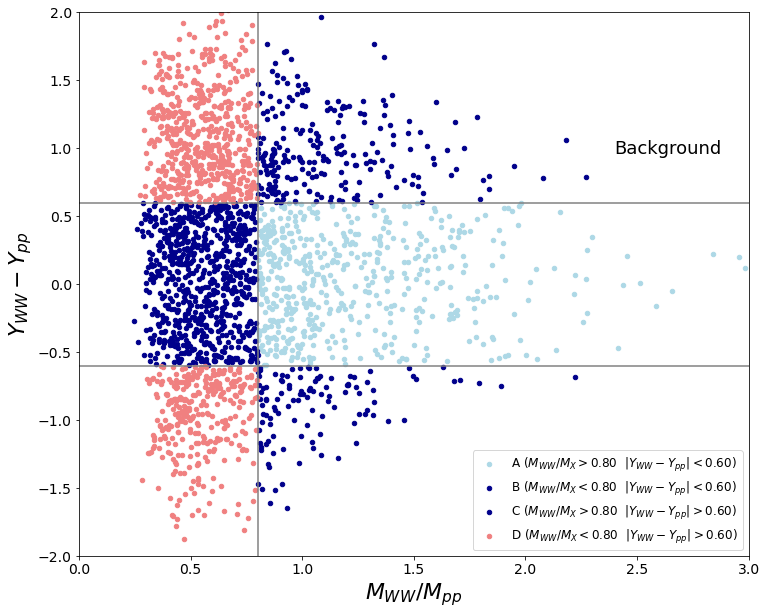

In [89]:
res_ = plot_regions_background( df_protons_multiRP_bkg_events )
n_events_bkg_A, err_n_events_bkg_A = res_[ 0 ]
n_events_bkg_B, err_n_events_bkg_B = res_[ 1 ]
n_events_bkg_C, err_n_events_bkg_C = res_[ 2 ]
n_events_bkg_D, err_n_events_bkg_D = res_[ 3 ]

### Data

In [90]:
# label_data = ""
# if lepton_type == 'muon':
#     label_data = "data-single-arm"
# elif lepton_type == 'electron':
#     label_data = "data-single-arm-electron"

labels_data = []
fileNames_data = {}
if data_sample == '2017':
    if lepton_type == 'muon':
        labels_data = [ "data-single-arm" ]
        fileNames_data = {
            "data-single-arm": "data-store-data-single-arm.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [ "data-single-arm-electron" ]
        fileNames_data = {
            "data-single-arm-electron": "data-store-data-single-arm-electron.h5"
        }
elif data_sample == '2018':
    if lepton_type == 'muon':
        labels_data = [
            "data-2018-muon-2018A",
            "data-2018-muon-2018B",
            "data-2018-muon-2018C",
            "data-2018-muon-2018D"
        ]
        fileNames_data = {
            "data-2018-muon-2018A": "data-store-data-2018-muon-2018A.h5",
            "data-2018-muon-2018B": "data-store-data-2018-muon-2018B.h5",
            "data-2018-muon-2018C": "data-store-data-2018-muon-2018C.h5",
            "data-2018-muon-2018D": "data-store-data-2018-muon-2018D.h5"
        }
    elif lepton_type == 'electron':
        labels_data = [
            "data-2018-electron-2018A",
            "data-2018-electron-2018B",
            "data-2018-electron-2018C",
            "data-2018-electron-2018D"
        ]
        fileNames_data = {
            "data-2018-electron-2018A": "data-store-data-2018-electron-2018A.h5",
            "data-2018-electron-2018B": "data-store-data-2018-electron-2018B.h5",
            "data-2018-electron-2018C": "data-store-data-2018-electron-2018C.h5",
            "data-2018-electron-2018D": "data-store-data-2018-electron-2018D.h5"
        }

base_path_ = 'output'
# file_path_ = "{}/data-store-{}.h5".format( base_path_, label_data )
for label_ in fileNames_data:
    fileNames_data[ label_ ] = "{}/{}".format( base_path_, fileNames_data[ label_ ] )
print ( fileNames_data )

# df_counts_data = None
# # df_protons_multiRP_data_index = None
# df_protons_multiRP_data_events = None
# with pd.HDFStore( file_path_, 'r' ) as store_:
#     print ( list( store_ ) )
#     df_counts_data = store_[ "counts" ]
# #     df_protons_multiRP_data_index = store_[ "protons_multiRP" ]
#     df_protons_multiRP_data_events = store_[ "events_multiRP" ]

df_counts_data = None
# df_protons_multiRP_data_index = None
df_protons_multiRP_data_events = None

df_counts_data_list_ = []
# df_protons_multiRP_data_index_list_ = []
df_protons_multiRP_data_events_list_ = []
for label_ in labels_data:
    print ( label_ )
    file_path_ = fileNames_data[ label_ ]
    print ( file_path_ )
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )
        
        df_counts_data__ = store_[ "counts" ]
#         df_protons_multiRP_data_index__  = store_[ "protons_multiRP" ]
        df_protons_multiRP_data_events__ = store_[ "events_multiRP" ]
        df_counts_data_list_.append( df_counts_data__ )
#         df_protons_multiRP_data_index_list_.append( df_protons_multiRP_data_index__ )
        df_protons_multiRP_data_events_list_.append( df_protons_multiRP_data_events__ )

df_counts_data = df_counts_data_list_[0]
for idx_ in range( 1, len( df_counts_data_list_ ) ):
    df_counts_data = df_counts_data.add( df_counts_data_list_[ idx_ ] )

# df_protons_multiRP_data_index = pd.concat( df_protons_multiRP_data_index_list_ )
df_protons_multiRP_data_events = pd.concat( df_protons_multiRP_data_events_list_ )

{'data-2018-muon-2018A': 'output/data-store-data-2018-muon-2018A.h5', 'data-2018-muon-2018B': 'output/data-store-data-2018-muon-2018B.h5', 'data-2018-muon-2018C': 'output/data-store-data-2018-muon-2018C.h5', 'data-2018-muon-2018D': 'output/data-store-data-2018-muon-2018D.h5'}
data-2018-muon-2018A
output/data-store-data-2018-muon-2018A.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018B
output/data-store-data-2018-muon-2018B.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018C
output/data-store-data-2018-muon-2018C.h5
['/counts', '/events_multiRP', '/protons_multiRP']
data-2018-muon-2018D
output/data-store-data-2018-muon-2018D.h5
['/counts', '/events_multiRP', '/protons_multiRP']


In [91]:
df_counts_data

All                  2168978
Jet                  2168978
Muon                 2101524
Proton_check_none    2101524
Proton               1436091
dtype: int64

In [92]:
df_protons_multiRP_data_events

crossingAngle  betaStar   instLumi  \
run    lumiblock event      slice                                       
316199 738       995631040  0              143.0       0.3  13.800958   
                 995580288  0              143.0       0.3  13.800958   
                 995377984  0              143.0       0.3  13.800958   
                 995499584  0              143.0       0.3  13.800958   
       739       997434176  0              143.0       0.3  13.797550   
...                                          ...       ...        ...   
325170 612       1131288576 0              133.0       0.3   9.424077   
       636       1171731200 0              133.0       0.3   9.308405   
                 1172657792 0              133.0       0.3   9.308405   
                 1172100864 0              133.0       0.3   9.308405   
       637       1174399232 0              133.0       0.3   9.307345   

                                      jet0_pt  jet0_eta  jet0_phi  \
run    lumiblock event      slice                                   
316199 738       995631040  0      255.131989  0.222181  0.465844   
                 995580288  0      271.237091  1.201405 -0.672793   
                 995377984  0      229.029266  0.813785  2.755530   
                 995499584  0      255.765457 -0.307157  0.577788   
       739       997434176  0      260.124023 -1.864394 -2.418813   
...                                       ...       ...       ...   
325170 612       1131288576 0      246.729645  1.276864 -0.892836   
       636       1171731200 0      228.047119  0.597068  2.040150   
                 1172657792 0      379.605713  0.926268  1.182455   
                 1172100864 0      251.445709 -0.306289  2.033631   
       637       1174399232 0      387.555847 -1.455234  2.785599   

                                   jet0_energy   jet0_mass  jet0_corrmass  \
run    lumiblock event      slice                                           
316199 738       995631040  0       267.062378   11.652953      12.641805   
                 995580288  0       499.218048   58.163593      65.961021   
                 995377984  0       314.838440   17.131739      18.583464   
                 995499584  0       282.566986   68.186745      73.808731   
       739       997434176  0       862.344360   16.077612      18.077419   
...                                        ...         ...            ...   
325170 612       1131288576 0       479.071381    8.522972       9.892778   
       636       1171731200 0       274.537445   12.774544      13.872478   
                 1172657792 0       563.302612   45.636650      50.065033   
                 1172100864 0       275.799347   64.325394      70.173836   
       637       1174399232 0       886.254150  103.373039     117.672409   

                                   jet0_tau1  ...           MX        YX  \
run    lumiblock event      slice             ...                          
316199 738       995631040  0       0.114730  ...  1081.969849 -0.666323   
                 995580288  0       0.327002  ...  1574.876953 -0.395413   
                 995377984  0       0.153312  ...   856.215759 -0.402162   
                 995499584  0       0.384951  ...   916.753662  0.275115   
       739       997434176  0       0.175540  ...  1315.981689 -0.325852   
...                                      ...  ...          ...       ...   
325170 612       1131288576 0       0.102824  ...   893.898987  0.588127   
       636       1171731200 0       0.148284  ...   937.104431 -0.351514   
                 1172657792 0       0.229042  ...  1345.170898 -0.256506   
                 1172100864 0       0.306301  ...  1131.908936 -0.433039   
       637       1174399232 0       0.307969  ...  1221.715698 -0.098217   

                                   diffMWW_MX  ratioMWW_MX  \
run    lumiblock event      slice                            
316199 738       995631040  0     -641.624390     0.406985   
          

### Select events

In [93]:
print ( df_protons_multiRP_data_events.shape[0] )
df_protons_multiRP_data_events_nTracks40, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type, max_num_tracks=40 )
print ( df_protons_multiRP_data_events_nTracks40.shape[0] )
print ( selection_keys_ )
print ( selections_ )
df_protons_multiRP_data_events__, selection_keys_, selections_ = select_events( df_protons_multiRP_data_events, lepton_type )
df_protons_multiRP_data_events = df_protons_multiRP_data_events__
print ( df_protons_multiRP_data_events.shape[0] )
print ( selection_keys_ )
print ( selections_ )

400491
7745
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 7745}
60
['All', 'Muon', 'Jet', 'Jet_Muon', 'MET', 'Jet_MET', 'PrunedMass', 'Tau21', 'BJet_Veto', 'Xi_CMS', 'WLeptonic', 'Jet_WLeptonic', 'MWW', 'ExtraTracks']
{'All': 400491, 'Muon': 399843, 'Jet': 286221, 'Jet_Muon': 282658, 'MET': 219545, 'Jet_MET': 196539, 'PrunedMass': 54611, 'Tau21': 35575, 'BJet_Veto': 28561, 'Xi_CMS': 25312, 'WLeptonic': 16512, 'Jet_WLeptonic': 16134, 'MWW': 15194, 'ExtraTracks': 60}


In [94]:
def plot_regions_data( df_protons_multiRP_data_events ):
    df__ = df_protons_multiRP_data_events
    var1__ = ( "R_MWW_MX" + "_nom" )
    var2__ = ( "Diff_YWW_YX" + "_nom" )

    msk_data_cut1 = ( df__[ var1__ ] >= 0.80  )
    msk_data_cut2 = ( np.abs( df__[ var2__ ] ) <= 0.60 )
    # msk_data_A =  msk_data_cut1 &  msk_data_cut2
    msk_data_B = ~msk_data_cut1 &  msk_data_cut2
    msk_data_C =  msk_data_cut1 & ~msk_data_cut2
    msk_data_D = ~msk_data_cut1 & ~msk_data_cut2

    # n_events_data = df__.shape[0]
    # n_events_data_A = df__[ msk_data_A ].shape[0]
    n_events_data_B = df__[ msk_data_B ].shape[0]
    n_events_data_C = df__[ msk_data_C ].shape[0]
    n_events_data_D = df__[ msk_data_D ].shape[0]

    # print ( "Number of events: {} - Ratio: {}".format( n_events_data, ( n_events_data / ( n_events_bkg ) ) ) )
    # print ( "Number of events (A): {} - Ratio: {}".format( n_events_data_A, ( n_events_data_A / ( n_events_bkg_A ) ) ) )
    # print ( "Number of events (B): {} - Ratio: {}".format( n_events_data_B, ( n_events_data_B / ( n_events_bkg_B ) ) ) )
    # print ( "Number of events (C): {} - Ratio: {}".format( n_events_data_C, ( n_events_data_C / ( n_events_bkg_C ) ) ) )
    # print ( "Number of events (D): {} - Ratio: {}".format( n_events_data_D, ( n_events_data_D / ( n_events_bkg_D ) ) ) )
    print ( "Number of events (B): {}".format( n_events_data_B ) )
    print ( "Number of events (C): {}".format( n_events_data_C ) )
    print ( "Number of events (D): {}".format( n_events_data_D ) )

    x_min =  0.
    x_max =  3.0
    y_min = -2.0
    y_max =  2.0
    x_cut = 0.80
    y_cut = 0.60

    fig = plt.figure( figsize=(12,10) )
    plt.plot( (x_min,x_max), (-y_cut,-y_cut), color='gray' )
    plt.plot( (x_min,x_max), (y_cut,y_cut), color='gray' )
    plt.plot( (x_cut,x_cut), (y_min,y_max), color='gray' )
    ax = plt.gca()
    # label_str_ = "A (Data/Background: {:.2f})".format( ( n_events_data_A / ( n_events_bkg_A ) ) )
    # label_str_ = r"{}".format( label_str_ )
    # df__[ msk_data_A ].plot( var1__, var2__, 'scatter', ax=ax, color='lightblue', label=label_str_ )
    # label_str_ = "B (Data/Background: {:.2f})".format( ( n_events_data_B / ( n_events_bkg_B ) ) )
    label_str_ = "B (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_B ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "C (Data/Background: {:.2f})".format( ( n_events_data_C / ( n_events_bkg_C ) ) )
    label_str_ = "C (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_C ].plot( var1__, var2__, 'scatter', ax=ax, color='darkblue', label=label_str_ )
    # label_str_ = "D (Data/Background: {:.2f})".format( ( n_events_data_D / ( n_events_bkg_D ) ) )
    label_str_ = "D (Data)"
    label_str_ = r"{}".format( label_str_ )
    df__[ msk_data_D ].plot( var1__, var2__, 'scatter', ax=ax, color='lightcoral', label=label_str_ )
    plt.legend( loc='best', fontsize=16 )
    # leg_ = plt.legend( loc='best', fontsize=16 )
    # leg_.set_title( title_str_, prop={'size': 16} )
    # leg_._legend_box.align = "right"
    ax.text( 0.85, 0.75, "Data", horizontalalignment='left', verticalalignment='center', transform=ax.transAxes, fontsize=18 )
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.xlabel( r"$M_{WW} / M_{pp}$", fontsize=22 )
    plt.ylabel( r"$Y_{WW} - Y_{pp}$", fontsize=22 )
    
    return ( n_events_data_B, n_events_data_C, n_events_data_D )

Number of events (B): 2793
Number of events (C): 864
Number of events (D): 2995


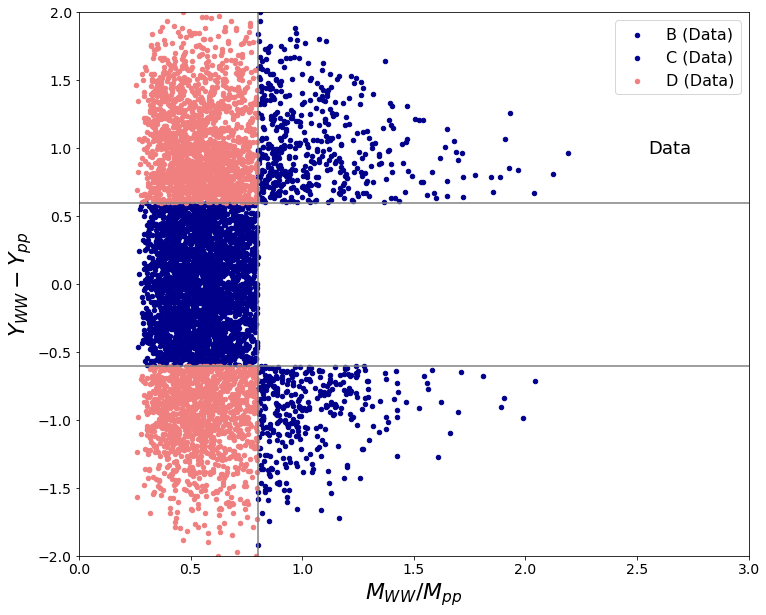

In [95]:
res_ = plot_regions_data( df_protons_multiRP_data_events_nTracks40 )
n_events_data_B_nTracks40 = res_[ 0 ]
n_events_data_C_nTracks40 = res_[ 1 ]
n_events_data_D_nTracks40 = res_[ 2 ]

Number of events (B): 24
Number of events (C): 4
Number of events (D): 20


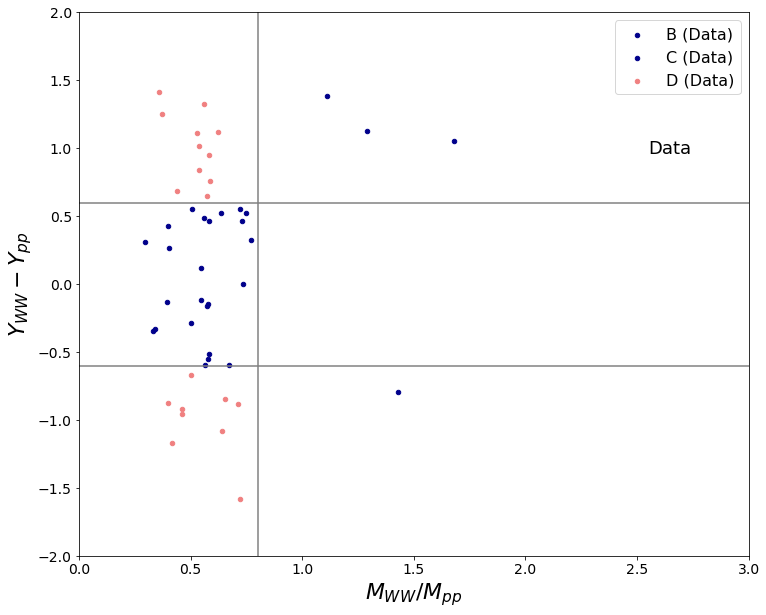

In [96]:
res_ = plot_regions_data( df_protons_multiRP_data_events )
n_events_data_B = res_[ 0 ]
n_events_data_C = res_[ 1 ]
n_events_data_D = res_[ 2 ]

In [97]:
ratio_ = ( n_events_data_B_nTracks40 / n_events_bkg_B_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_nTracks40 ) + ( err_n_events_bkg_B_nTracks40 / n_events_bkg_B_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_C_nTracks40 / n_events_bkg_C_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_C_nTracks40 ) + ( err_n_events_bkg_C_nTracks40 / n_events_bkg_C_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )
ratio_ = ( n_events_data_D_nTracks40 / n_events_bkg_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_D_nTracks40 ) + ( err_n_events_bkg_D_nTracks40 / n_events_bkg_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9691993781577923 0.018515974017321087
0.9873383004982401 0.03391995609527372
1.0222750141650794 0.018869667182686525


In [98]:
n_events_data_B_D_nTracks40 = ( n_events_data_B_nTracks40 + n_events_data_D_nTracks40 )
# err_n_events_data_B_D_nTracks40 = np.sqrt( n_events_data_B_D_nTracks40 )
n_events_bkg_B_D_nTracks40 = ( n_events_bkg_B_nTracks40 + n_events_bkg_D_nTracks40 )
err_n_events_bkg_B_D_nTracks40 = np.sqrt( err_n_events_bkg_B_nTracks40 ** 2 + err_n_events_bkg_D_nTracks40 ** 2 )
ratio_ = ( n_events_data_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 )
err_ratio_ = ratio_ * np.sqrt( ( 1. / n_events_data_B_D_nTracks40 ) + ( err_n_events_bkg_B_D_nTracks40 / n_events_bkg_B_D_nTracks40 ) ** 2 )
print ( ratio_, err_ratio_ )

0.9959562935558806 0.013220835057705297


GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.212076
1      0.187695
2      0.167705
3      0.151061
4      0.137025
         ...   
195    0.185384
196    0.184290
197    0.182993
198    0.181488
199    0.179771
Length: 200, dtype: float64 0.10578637456196165
0     -0.121372
1     -0.122802
2     -0.123924
3     -0.124810
4     -0.125511
         ...   
195   -0.139781
196   -0.134596
197   -0.129045
198   -0.123127
199   -0.116840
Length: 200, dtype: float64 -0.11299228599425434
Diff_YWW_YX
0      0.070190
1      0.068831
2      0.067554
3      0.066351
4      0.065216
         ...   
195    0.046685
196    0.046983
197    0.047292
198    0.047611
199    0.047943
Length: 200, dtype: float64 0.04385156911023325
0     -0.060169
1     -0.059113
2     -0.058121
3     -0.057187
4     -0.056307
         ...   
195   -0.050414
196   -0.050830
197   -0.051260
198   -0.051704
199   -0.052165
Length: 200, dtype: float64 -0.042083955521847294
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.18

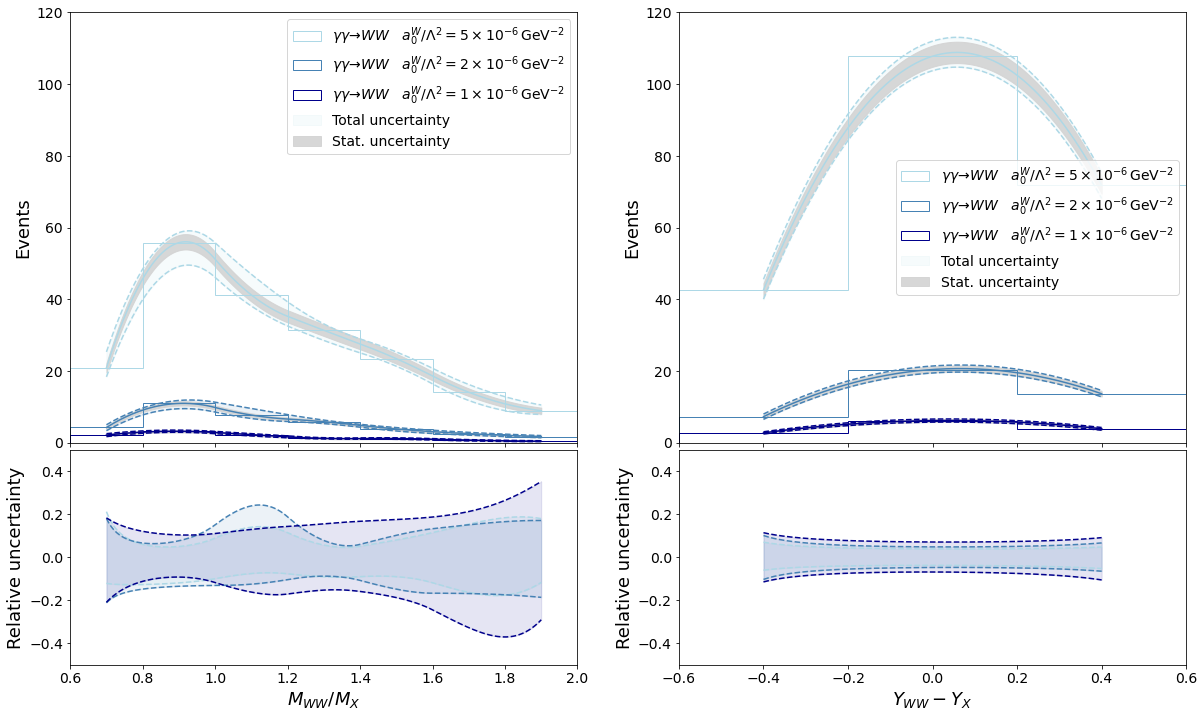

In [119]:
relative_uncertainty_ = True

# ylim_ = (0.,5.)
# ylim_ = (0.,3.)
# ylim_ = (0.,0.60)
ylim_ = (0.,120.)
ylim_ratio_ = (-0.50,0.50)

yscale_=None
# yscale_='log'

colors = [ "lightblue", "steelblue", "darkblue", "royalblue"  ]

# fig, axes = plt.subplots( 2, 2, figsize=(2*10,2*8) )
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

class Obj2D:
    def __init__( self ):
        self.obj_ = [ [], [] ]
    def __getitem__( self, idx ):
        if isinstance( idx, tuple ): return self.obj_[ idx[0] ][ idx[1] ]
        else : return self.obj_[ idx ]

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

def plot_signal( axes ):
    for idx_label_, label_ in enumerate( labels_signals[::-1] ):
        print ( label_ )
        color_ = colors[ idx_label_ ]

        spline_nom_ = {}
        spline_max_ = {}
        spline_min_ = {}
        spline_max_err_ = {}
        spline_min_err_ = {}
        spline_nom_arr_ = {}
        spline_max_arr_ = {}
        spline_min_arr_ = {}
        spline_max_err_arr_ = {}
        spline_min_err_arr_ = {}

        idx_row_ = 0
        idx_col_ = 0
        for var__ in vars_:
            print ( var__ )
            idx_row_ = 0
            counts_ = counts[ label_ ][ var__ ]
            err_ = err[ label_ ][ var__ ]
            bins_ = bins[ label_ ][ var__ ]
            __max_err__ = ( counts_ + err_ )
            __min_err__ = ( counts_ - err_ )
            __max__ = max_variations_total[ label_ ][ var__ ]
            __min__ = min_variations_total[ label_ ][ var__ ]

            bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

            axes[idx_row_,idx_col_].hist( bin_centers_, weights=counts_,
                                          histtype='step', color=color_, linestyle="-", label=labels_samples[ label_ ],
                                          bins=bins_ )

            spline_nom_[ var__ ] = make_interp_spline( bin_centers_, counts_, k=2 )
            spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
            spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
            spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
            spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
            x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
            spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
            spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
            spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
            spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
            spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

            axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
            axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
            __label_0 = None
            __label_1 = None
            if idx_label_ == 0:
                __label_0 = "Total uncertainty"
                __label_1 = "Stat. uncertainty"
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label=__label_0 )
            axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90, label=__label_1 )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ )
    #         axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            axes[idx_row_,idx_col_].get_xaxis().set_ticklabels( [] )
            axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
            if yscale_:
                axes[idx_row_,idx_col_].set_ylim( bottom=0.01 )
                axes[idx_row_,idx_col_].set_yscale( yscale_ )
            axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )

            idx_row_ = 1
            if relative_uncertainty_:
                ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
                ratio_max_sel_ = pd.Series( ratio_max_ )
                ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                ratio_min_sel_ = pd.Series( ratio_min_ )
                ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
                print ( ratio_max_sel_, ratio_max_sel_.mean() )
                print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
            else:
                diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
                axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
                axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
        #     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
            axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
            axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
            axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
            idx_col_ += 1

plot_signal( axes=axes )

if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Systematics.png", bbox_inches='tight' )

GGToWW-AQGC-2018-muon-A0W5e-6
R_MWW_MX
0      0.212076
1      0.187695
2      0.167705
3      0.151061
4      0.137025
         ...   
195    0.185384
196    0.184290
197    0.182993
198    0.181488
199    0.179771
Length: 200, dtype: float64 0.10578637456196165
0     -0.121372
1     -0.122802
2     -0.123924
3     -0.124810
4     -0.125511
         ...   
195   -0.139781
196   -0.134596
197   -0.129045
198   -0.123127
199   -0.116840
Length: 200, dtype: float64 -0.11299228599425434
Diff_YWW_YX
0      0.070190
1      0.068831
2      0.067554
3      0.066351
4      0.065216
         ...   
195    0.046685
196    0.046983
197    0.047292
198    0.047611
199    0.047943
Length: 200, dtype: float64 0.04385156911023325
0     -0.060169
1     -0.059113
2     -0.058121
3     -0.057187
4     -0.056307
         ...   
195   -0.050414
196   -0.050830
197   -0.051260
198   -0.051704
199   -0.052165
Length: 200, dtype: float64 -0.042083955521847294
GGToWW-AQGC-2018-muon-A0W2e-6
R_MWW_MX
0      0.18

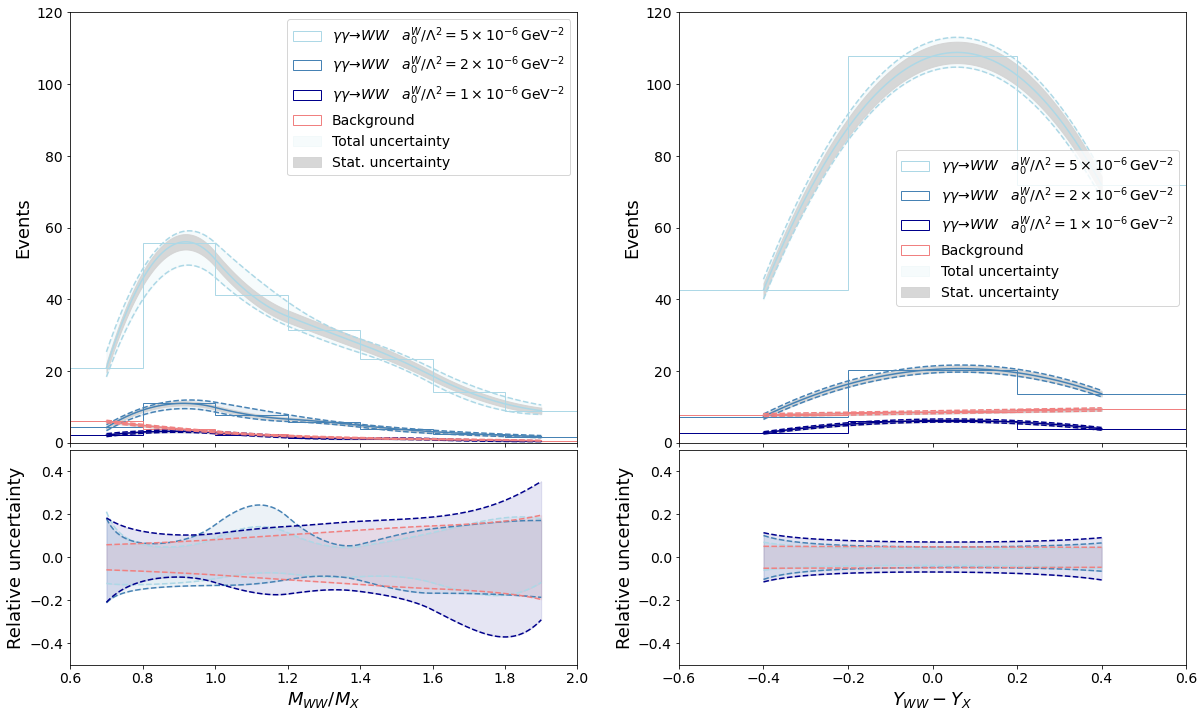

In [120]:
fig, axes_ = plt.subplots( 1, 2, figsize=( 2*10,( 1.5*8 ) ) )

from mpl_toolkits.axes_grid1 import make_axes_locatable
divider0_ = make_axes_locatable( axes_[ 0 ] )
divider1_ = make_axes_locatable( axes_[ 1 ] )
axes = Obj2D()
axes.obj_[0].append( axes_[ 0 ] )
axes.obj_[0].append( axes_[ 1 ] )
axes.obj_[1].append( divider0_.append_axes( "bottom", size="50%", pad=0.10 ) )
axes.obj_[1].append( divider1_.append_axes( "bottom", size="50%", pad=0.10 ) )

plot_signal( axes=axes )

color_ = 'lightcoral'

# counts__ = None
# err__ = None
# bins__ = None
# max_variations_total__ = None
# min_variations_total__ = None
idx_row_ = 0
idx_col_ = 0
for var__ in vars_:
    print ( var__ )
    idx_row_ = 0
    df__ = df_protons_multiRP_bkg_events
    weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
    arr__ = df__[ var__ + "_nom" ]

    arr_Diff_YWW_YX__ = df__[ "Diff_YWW_YX" + "_nom" ]
    msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) )
    arr__ = arr__.loc[ msk__ ]
    weights__ = weights__.loc[ msk__ ]
    sum_w_, bins_ = np.histogram( arr__, weights=weights__,
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )
    sum_w2_, __ = np.histogram( arr__, weights=( weights__ ** 2 ),
                                bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ] )

    __max_err__ = ( sum_w_ + np.sqrt( sum_w2_ ) )
    __min_err__ = ( sum_w_ - np.sqrt( sum_w2_ ) )

    __max__ = ( sum_w_ + np.sqrt( sum_w2_ ) ) 
    __min__ = ( sum_w_ - np.sqrt( sum_w2_ ) )
    
    print ( sum_w_ )
    print ( __max_err__ )
    print ( __min_err__ )
    print ( __max__ )
    print ( __min__ )
#     counts__[ var__ ] = sum_w_
#     err__[ var__ ] = np.sqrt( sum_w2_ )
#     bins__[ var__ ] = bins_
#     max_variations_total__[ var__ ] = __max__
#     min_variations_total__[ var__ ] = __min__

    bin_centers_ = ( bins_[:-1] + bins_[1:] ) / 2

    axes[idx_row_,idx_col_].hist( bin_centers_, weights=sum_w_,
                                  histtype='step', color=color_, linestyle="-",
                                  bins=vars_[ var__ ][ "bins" ], range=vars_[ var__ ][ "range" ], label="Background" )

    spline_nom_[ var__ ] = make_interp_spline( bin_centers_, sum_w_, k=2 )
    spline_max_[ var__ ] = make_interp_spline( bin_centers_, __max__, k=2 )
    spline_min_[ var__ ] = make_interp_spline( bin_centers_, __min__, k=2 )
    spline_max_err_[ var__ ] = make_interp_spline( bin_centers_, __max_err__, k=2 )
    spline_min_err_[ var__ ] = make_interp_spline( bin_centers_, __min_err__, k=2 )
    x_plot__ = np.linspace( bin_centers_[0], bin_centers_[-1], 200 )
    spline_nom_arr_[ var__ ] = spline_nom_[ var__ ]( x_plot__ )
    spline_max_arr_[ var__ ] = spline_max_[ var__ ]( x_plot__ )
    spline_min_arr_[ var__ ] = spline_min_[ var__ ]( x_plot__ )
    spline_max_err_arr_[ var__ ] = spline_max_err_[ var__ ]( x_plot__ )
    spline_min_err_arr_[ var__ ] = spline_min_err_[ var__ ]( x_plot__ )

    axes[idx_row_,idx_col_].plot( x_plot__, spline_nom_arr_[ var__ ], color=color_, linestyle="-" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_max_arr_[ var__ ], color=color_, linestyle="--" )
    axes[idx_row_,idx_col_].plot( x_plot__, spline_min_arr_[ var__ ], color=color_, linestyle="--" )
#     axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10, label="Background" )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_arr_[ var__ ], spline_max_arr_[ var__ ], color=color_, alpha=0.10 )
    axes[idx_row_,idx_col_].fill_between( x_plot__, spline_min_err_arr_[ var__ ], spline_max_err_arr_[ var__ ], color='lightgrey', alpha=0.90 )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
#     axes[idx_row_,idx_col_].set_ylabel( "Events", fontsize=18 )
    axes[idx_row_,idx_col_].legend( loc='best', fontsize=14 )
    
    idx_row_ = 1
    if relative_uncertainty_:
        ratio_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] ) / spline_nom_arr_[ var__ ]
        ratio_max_sel_ = pd.Series( ratio_max_ )
        ratio_max_sel_ = ratio_max_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        ratio_min_sel_ = pd.Series( ratio_min_ )
        ratio_min_sel_ = ratio_min_sel_[ ( x_plot__ >= vars_[ var__ ][ "xlim" ][0] ) & ( x_plot__ <= vars_[ var__ ][ "xlim" ][1] ) ]
        print ( ratio_max_sel_, ratio_max_sel_.mean() )
        print ( ratio_min_sel_, ratio_min_sel_.dropna().mean() )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, ratio_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, ratio_min_, ratio_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Relative uncertainty", fontsize=18 )
    else:
        diff_max_ = ( spline_max_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        diff_min_ = ( spline_min_arr_[ var__ ] - spline_nom_arr_[ var__ ] )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_max_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].plot( x_plot__, diff_min_, color=color_, linestyle="--" )
        axes[idx_row_,idx_col_].fill_between( x_plot__, diff_min_, diff_max_, color=color_, alpha=0.10 )
#         axes[idx_row_,idx_col_].set_ylabel( "Uncertainty", fontsize=18 )
#     axes[idx_row_,idx_col_].set_xlim( 0.5, 2. )
#     axes[idx_row_,idx_col_].set_xlim( vars_[ var__ ][ "xlim" ] )
#     axes[idx_row_,idx_col_].set_ylim( ylim_ratio_ )
#     axes[idx_row_,idx_col_].set_xlabel( vars_[ var__ ][ "xtitle" ], fontsize=18 )
    idx_col_ += 1
    
if save_figures:
    if yscale_:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics-log.png", bbox_inches='tight' )
    else:
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
        plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [101]:
# axes[0,0].set_xlim( 0.6, 2.0 )
# axes[1,0].set_xlim( 0.6, 2.0 )
# axes[0,1].set_xlim( -1., 1. )
# axes[1,1].set_xlim( -1., 1. )
# axes[0,1].set_xlim( -0.60, 0.60 )
# axes[1,1].set_xlim( -0.60, 0.60 )
# axes[0,0].set_ylim( 0., 5. )
# axes[0,0].set_ylim( 0., 9. )
# axes[0,1].set_ylim( 0., 5. )
# axes[0,1].set_ylim( 0., 8. )
# axes[0,1].set_ylim( 0., 9. )
# axes[0,0].set_ylim( 0., 1. )
# axes[0,1].set_ylim( 0., 1. )
# axes[0,0].set_yscale( 'log' )
# axes[0,1].set_yscale( 'log' )
# axes[0,0].set_ylim( 0.01, 5. )
# # axes[0,1].set_ylim( 0.01, 5. )
# axes[0,1].set_ylim( 0.01, 8. )
# fig

In [102]:
# if save_figures:
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.pdf", bbox_inches='tight' )
#     plt.savefig( "plots/Cut-Based-Mass-Rapidity-Signal-Background-Systematics.png", bbox_inches='tight' )

In [103]:
# var_name_lepton_id_up_ = ""
# var_name_lepton_id_dw_ = ""
# if lepton_type == 'muon':
#     var_name_lepton_id_up_ = "syst_up_sf_muon_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_muon_id"
# elif lepton_type == 'electron':
#     var_name_lepton_id_up_ = "syst_up_sf_electron_id"
#     var_name_lepton_id_dw_ = "syst_dw_sf_electron_id"
var_name_lepton_id_ = ""
if lepton_type == 'muon':
    var_name_lepton_id_ = "sf_muon_id"
elif lepton_type == 'electron':
    var_name_lepton_id_ = "sf_electron_id"

uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, 'proton_scale', 'proton_eff' ]

for label__ in labels_signals:
    for unc__ in uncertainties_:
        label_unc__ = "syst_up_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] < 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )
        label_unc__ = "syst_dw_{}".format( unc__ )
        if sum_weights[ label__ ][ label_unc__ ] > 0.: sum_weights[ label__ ][ label_unc__ ] = np.float64( 0. )

    var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
    sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                          )
    var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
    sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                             sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                             sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                          )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.025028824500918034, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': 0.0, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507275046, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948, 'syst_up_proton_scale_arm1': 0.3750985996150913, 'syst_dw_proton_scale_arm1': -0.42484906698858005, 'syst_up_proton_scale': 0.5126655470296612, 'syst_dw_proton_scale': -0.5200401953245621, 'syst_up_proton_eff': 0.14192987039073834, 'syst_dw_proton_eff': -0.1419298703907348, 'syst_up_total': 0.5382084237380919, 'syst_dw_total': -0.5401226371605969}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.0007410201455684273, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': 0.0, 'syst_dw_jer': -0.12803347317467484, 'syst_up_sf_mu

In [104]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                         9.522266   
stat                                            0.487843   
syst_up_jes                                     0.074510   
syst_dw_jes                                    -0.025029   
syst_up_jer                                     0.025029   
syst_dw_jer                                     0.000000   
syst_up_sf_muon_id                              0.022806   
syst_dw_sf_muon_id                             -0.022806   
syst_up_proton_scale_arm0                       0.349467   
syst_dw_proton_scale_arm0                      -0.299908   
syst_up_proton_scale_arm1                       0.375099   
syst_dw_proton_scale_arm1                      -0.424849   
syst_up_proton_scale                            0.512666   
syst_dw_proton_scale                           -0.520040   
syst_up_proton_eff                              0.141930   
syst_dw_proton_eff                             -0.141930   
syst_up_total                                   0.538208   
syst_dw_total                                  -0.540123   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        35.760847   
stat                                            1.071440   
syst_up_jes                                     0.000741   
syst_dw_jes                                    -0.224266   
syst_up_jer                                     0.000000   
syst_dw_jer                                    -0.128033   
syst_up_sf_muon_id                              0.084315   
syst_dw_sf_muon_id                             -0.084315   
syst_up_proton_scale_arm0                       0.866147   
syst_dw_proton_scale_arm0                      -0.737399   
syst_up_proton_scale_arm1                       0.738402   
syst_dw_proton_scale_arm1                      -0.995425   
syst_up_proton_scale                            1.138177   
syst_dw_proton_scale                           -1.238801   
syst_up_proton_eff                              0.502903   
syst_dw_proton_eff                             -0.502903   
syst_up_total                                   1.247184   
syst_dw_total                                  -1.364308   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       198.011538  
stat                                            4.018541  
syst_up_jes                                     0.896349  
syst_dw_jes                                    -1.220993  
syst_up_jer                                     0.245015  
syst_dw_jer                                    -0.489761  
syst_up_sf_muon_id                              0.474019  
syst_dw_sf_muon_id                             -0.474019  
syst_up_proton_scale_arm0                       2.770741  
syst_dw_proton_scale_arm0                      -4.486579  
syst_up_proton_scale_arm1                       3.264185  
syst_dw_proton_scale_arm1                      -5.790003  
syst_up_proton_scale                            4.281578  
syst_dw_proton_scale                           -7.324857  
syst_up_proton_eff                              2.657148  
syst_dw_proton_eff                             -2.657148  
syst_up_total                                   5.145922  
syst_dw_total                                  -7.916397

In [105]:
# df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100.

In [106]:
symmetrize_uncertainties = True
if symmetrize_uncertainties:
    var_name_lepton_id_ = ""
    if lepton_type == 'muon':
        var_name_lepton_id_ = "sf_muon_id"
    elif lepton_type == 'electron':
        var_name_lepton_id_ = "sf_electron_id"

    uncertainties_ = [ 'jes', 'jer', var_name_lepton_id_, 'proton_scale', 'proton_eff' ]
    
    for label__ in labels_signals:
        for unc__ in uncertainties_:
            label_unc_up__ = "syst_up_{}".format( unc__ )
            label_unc_dw__ = "syst_dw_{}".format( unc__ )
            unc_max__ = np.max( [ np.abs( sum_weights[ label__ ][ label_unc_up__ ] ) , np.abs( sum_weights[ label__ ][ label_unc_dw__ ] ) ] )
            sum_weights[ label__ ][ label_unc_up__ ] =  unc_max__
            sum_weights[ label__ ][ label_unc_dw__ ] = -unc_max__

        var_name_lepton_id_up__ = "syst_up_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_up_total" ]    =  np.sqrt( sum_weights[ label__ ][ "syst_up_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_up__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_up_proton_eff" ] ** 2
                                                              )
        var_name_lepton_id_dw__ = "syst_dw_{}".format( var_name_lepton_id_ )
        sum_weights[ label__ ][ "syst_dw_total" ]    = -np.sqrt( sum_weights[ label__ ][ "syst_dw_jes" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_jer" ] ** 2 +
                                                                 sum_weights[ label__ ][ var_name_lepton_id_dw__ ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_scale" ] ** 2 +
                                                                 sum_weights[ label__ ][ "syst_dw_proton_eff" ] ** 2
                                                              )
print ( sum_weights )

{'GGToWW-AQGC-2018-muon-A0W1e-6': {'central': 9.52226632598145, 'stat': 0.4878431909992443, 'syst_up_jes': 0.07450963596280147, 'syst_dw_jes': -0.07450963596280147, 'syst_up_jer': 0.02502882450091981, 'syst_dw_jer': -0.02502882450091981, 'syst_up_sf_muon_id': 0.022806320507283928, 'syst_dw_sf_muon_id': -0.022806320507283928, 'syst_up_proton_scale_arm0': 0.34946674187684756, 'syst_dw_proton_scale_arm0': -0.2999084444161948, 'syst_up_proton_scale_arm1': 0.3750985996150913, 'syst_dw_proton_scale_arm1': -0.42484906698858005, 'syst_up_proton_scale': 0.5200401953245621, 'syst_dw_proton_scale': -0.5200401953245621, 'syst_up_proton_eff': 0.14192987039073834, 'syst_dw_proton_eff': -0.14192987039073834, 'syst_up_total': 0.5452376995628865, 'syst_dw_total': -0.5452376995628865}, 'GGToWW-AQGC-2018-muon-A0W2e-6': {'central': 35.76084721096758, 'stat': 1.0714397406890024, 'syst_up_jes': 0.22426594858150395, 'syst_dw_jes': -0.22426594858150395, 'syst_up_jer': 0.12803347317467484, 'syst_dw_jer': -0.12

In [107]:
df_sum_weights__ = pd.DataFrame( sum_weights )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                         9.522266   
stat                                            0.487843   
syst_up_jes                                     0.074510   
syst_dw_jes                                    -0.074510   
syst_up_jer                                     0.025029   
syst_dw_jer                                    -0.025029   
syst_up_sf_muon_id                              0.022806   
syst_dw_sf_muon_id                             -0.022806   
syst_up_proton_scale_arm0                       0.349467   
syst_dw_proton_scale_arm0                      -0.299908   
syst_up_proton_scale_arm1                       0.375099   
syst_dw_proton_scale_arm1                      -0.424849   
syst_up_proton_scale                            0.520040   
syst_dw_proton_scale                           -0.520040   
syst_up_proton_eff                              0.141930   
syst_dw_proton_eff                             -0.141930   
syst_up_total                                   0.545238   
syst_dw_total                                  -0.545238   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        35.760847   
stat                                            1.071440   
syst_up_jes                                     0.224266   
syst_dw_jes                                    -0.224266   
syst_up_jer                                     0.128033   
syst_dw_jer                                    -0.128033   
syst_up_sf_muon_id                              0.084315   
syst_dw_sf_muon_id                             -0.084315   
syst_up_proton_scale_arm0                       0.866147   
syst_dw_proton_scale_arm0                      -0.737399   
syst_up_proton_scale_arm1                       0.738402   
syst_dw_proton_scale_arm1                      -0.995425   
syst_up_proton_scale                            1.238801   
syst_dw_proton_scale                           -1.238801   
syst_up_proton_eff                              0.502903   
syst_dw_proton_eff                             -0.502903   
syst_up_total                                   1.364308   
syst_dw_total                                  -1.364308   

                           GGToWW-AQGC-2018-muon-A0W5e-6  
central                                       198.011538  
stat                                            4.018541  
syst_up_jes                                     1.220993  
syst_dw_jes                                    -1.220993  
syst_up_jer                                     0.489761  
syst_dw_jer                                    -0.489761  
syst_up_sf_muon_id                              0.474019  
syst_dw_sf_muon_id                             -0.474019  
syst_up_proton_scale_arm0                       2.770741  
syst_dw_proton_scale_arm0                      -4.486579  
syst_up_proton_scale_arm1                       3.264185  
syst_dw_proton_scale_arm1                      -5.790003  
syst_up_proton_scale                            7.324857  
syst_dw_proton_scale                           -7.324857  
syst_up_proton_eff                              2.657148  
syst_dw_proton_eff                             -2.657148  
syst_up_total                                   7.916397  
syst_dw_total                                  -7.916397

In [108]:
df__ = df_protons_multiRP_bkg_events
weights__ = ( df_protons_multiRP_bkg_events[ "norm" ] )
weights_squared__ = ( weights__ ** 2 )
arr_R_MWW_MX__ = df__.loc[ :, "R_MWW_MX" + "_nom" ]
arr_Diff_YWW_YX__ = df__.loc[ :, "Diff_YWW_YX" + "_nom" ]
msk__ = ( ( np.abs( arr_Diff_YWW_YX__ ) <= 0.60 ) & ( arr_R_MWW_MX__ >= 0.80 ) )
sum_weights_cut__ = np.sum( weights__.loc[ msk__ ] )
sum_weights_squared_cut__ = np.sum( weights_squared__.loc[ msk__ ] )
print ( "{} ± {}".format( sum_weights_cut__, np.sqrt( sum_weights_squared_cut__ ) ) )

10.559999999999999 ± 0.45956501172304237


In [109]:
df_sum_weights__[ "Background" ] = -1.
df_sum_weights__[ "Background" ][ "central" ] = sum_weights_cut__
df_sum_weights__[ "Background" ][ "stat" ] = np.sqrt( sum_weights_squared_cut__ )
df_sum_weights__

GGToWW-AQGC-2018-muon-A0W1e-6  \
central                                         9.522266   
stat                                            0.487843   
syst_up_jes                                     0.074510   
syst_dw_jes                                    -0.074510   
syst_up_jer                                     0.025029   
syst_dw_jer                                    -0.025029   
syst_up_sf_muon_id                              0.022806   
syst_dw_sf_muon_id                             -0.022806   
syst_up_proton_scale_arm0                       0.349467   
syst_dw_proton_scale_arm0                      -0.299908   
syst_up_proton_scale_arm1                       0.375099   
syst_dw_proton_scale_arm1                      -0.424849   
syst_up_proton_scale                            0.520040   
syst_dw_proton_scale                           -0.520040   
syst_up_proton_eff                              0.141930   
syst_dw_proton_eff                             -0.141930   
syst_up_total                                   0.545238   
syst_dw_total                                  -0.545238   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
central                                        35.760847   
stat                                            1.071440   
syst_up_jes                                     0.224266   
syst_dw_jes                                    -0.224266   
syst_up_jer                                     0.128033   
syst_dw_jer                                    -0.128033   
syst_up_sf_muon_id                              0.084315   
syst_dw_sf_muon_id                             -0.084315   
syst_up_proton_scale_arm0                       0.866147   
syst_dw_proton_scale_arm0                      -0.737399   
syst_up_proton_scale_arm1                       0.738402   
syst_dw_proton_scale_arm1                      -0.995425   
syst_up_proton_scale                            1.238801   
syst_dw_proton_scale                           -1.238801   
syst_up_proton_eff                              0.502903   
syst_dw_proton_eff                             -0.502903   
syst_up_total                                   1.364308   
syst_dw_total                                  -1.364308   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
central                                       198.011538   10.560000  
stat                                            4.018541    0.459565  
syst_up_jes                                     1.220993   -1.000000  
syst_dw_jes                                    -1.220993   -1.000000  
syst_up_jer                                     0.489761   -1.000000  
syst_dw_jer                                    -0.489761   -1.000000  
syst_up_sf_muon_id                              0.474019   -1.000000  
syst_dw_sf_muon_id                             -0.474019   -1.000000  
syst_up_proton_scale_arm0                       2.770741   -1.000000  
syst_dw_proton_scale_arm0                      -4.486579   -1.000000  
syst_up_proton_scale_arm1                       3.264185   -1.000000  
syst_dw_proton_scale_arm1                      -5.790003   -1.000000  
syst_up_proton_scale                            7.324857   -1.000000  
syst_dw_proton_scale                           -7.324857   -1.000000  
syst_up_proton_eff                              2.657148   -1.000000  
syst_dw_proton_eff                             -2.657148   -1.000000  
syst_up_total                                   7.916397   -1.000000  
syst_dw_total                                  -7.916397   -1.000000

In [110]:
df_sum_weights__.iloc[ 1:, : ].where( ~( df_sum_weights__.iloc[ 1:, : ] != -1. ) , df_sum_weights__.iloc[ 1:, : ].divide( df_sum_weights__.iloc[ 0 ] ) * 100. )

GGToWW-AQGC-2018-muon-A0W1e-6  \
stat                                            5.123184   
syst_up_jes                                     0.782478   
syst_dw_jes                                    -0.782478   
syst_up_jer                                     0.262845   
syst_dw_jer                                    -0.262845   
syst_up_sf_muon_id                              0.239505   
syst_dw_sf_muon_id                             -0.239505   
syst_up_proton_scale_arm0                       3.669995   
syst_dw_proton_scale_arm0                      -3.149549   
syst_up_proton_scale_arm1                       3.939174   
syst_dw_proton_scale_arm1                      -4.461638   
syst_up_proton_scale                            5.461307   
syst_dw_proton_scale                           -5.461307   
syst_up_proton_eff                              1.490505   
syst_dw_proton_eff                             -1.490505   
syst_up_total                                   5.725924   
syst_dw_total                                  -5.725924   

                           GGToWW-AQGC-2018-muon-A0W2e-6  \
stat                                            2.996125   
syst_up_jes                                     0.627127   
syst_dw_jes                                    -0.627127   
syst_up_jer                                     0.358027   
syst_dw_jer                                    -0.358027   
syst_up_sf_muon_id                              0.235774   
syst_dw_sf_muon_id                             -0.235774   
syst_up_proton_scale_arm0                       2.422053   
syst_dw_proton_scale_arm0                      -2.062030   
syst_up_proton_scale_arm1                       2.064833   
syst_dw_proton_scale_arm1                      -2.783561   
syst_up_proton_scale                            3.464127   
syst_dw_proton_scale                           -3.464127   
syst_up_proton_eff                              1.406296   
syst_dw_proton_eff                             -1.406296   
syst_up_total                                   3.815090   
syst_dw_total                                  -3.815090   

                           GGToWW-AQGC-2018-muon-A0W5e-6  Background  
stat                                            2.029448    4.351941  
syst_up_jes                                     0.616627   -1.000000  
syst_dw_jes                                    -0.616627   -1.000000  
syst_up_jer                                     0.247340   -1.000000  
syst_dw_jer                                    -0.247340   -1.000000  
syst_up_sf_muon_id                              0.239389   -1.000000  
syst_dw_sf_muon_id                             -0.239389   -1.000000  
syst_up_proton_scale_arm0                       1.399283   -1.000000  
syst_dw_proton_scale_arm0                      -2.265817   -1.000000  
syst_up_proton_scale_arm1                       1.648482   -1.000000  
syst_dw_proton_scale_arm1                      -2.924074   -1.000000  
syst_up_proton_scale                            3.699207   -1.000000  
syst_dw_proton_scale                           -3.699207   -1.000000  
syst_up_proton_eff                              1.341916   -1.000000  
syst_dw_proton_eff                             -1.341916   -1.000000  
syst_up_total                                   3.997948   -1.000000  
syst_dw_total                                  -3.997948   -1.000000

In [111]:
save_table_systematics = False

if save_table_systematics:
    file_path_ = ""
    file_str_ = "table_systematics"
    if norm_to_1fb:
        file_str_ += "-norm_to_1fb"
    if data_sample == '2017':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2017-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2017-electron" + ".h5"
    elif data_sample == '2018':
        if lepton_type == 'muon':
            file_path_ = file_str_ + "-2018-muon" + ".h5"
        elif lepton_type == 'electron':
            file_path_ = file_str_ + "-2018-electron" + ".h5"

    with pd.HDFStore( file_path_, 'w' ) as store_:
        store_[ "table_systematics" ] = df_sum_weights__

In [112]:
if save_table_systematics:
    with pd.HDFStore( file_path_, 'r' ) as store_:
        print ( list( store_ ) )

In [113]:
# arrays = [
#     ["bar","bar","foo","foo","baz","baz"],
#     ["one","one","two","two","one","one"]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 6*2 ).reshape( 6, 2 ), index=index, columns=['A','B'] )
# df_groupby = df.groupby( ["first","second"] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# df_groupby_apply_ = df_groupby.apply( lambda df__: ( df__['A'].iloc[0] * df__['B'].iloc[1] ) )
# print ( df_groupby_apply_ )
# df_nonduplicated = df[ ~df.index.duplicated(keep='first') ]
# df_nonduplicated.loc[ :, 'C' ] = df_groupby_apply_
# df_nonduplicated

In [114]:
# arrays = [
#     [ "bar", "bar", "bar", "foo", "foo", "foo", "baz" ],
#     [ "one", "two", "two", "one", "one", "two", "one" ]
# ]
# index = pd.MultiIndex.from_arrays(arrays, names=["first", "second"])
# df = pd.DataFrame( np.arange( 7*2 ).reshape( 7, 2 ), index=index, columns=['A','B'] )
# df = df.reset_index().set_index( ["first"] )
# print ( df )
# df_groupby = df.groupby( [ "first", "second" ] )
# # df_groupby = df.groupby( [ "first" ] )
# for name, group in df_groupby:
#     print ( name )
#     print ( group )
# # df_groupby_A_min = df_groupby[ "A" ].min()
# # print ( df_groupby_A_min )
# # df_groupby_A_max = df_groupby[ "A" ].max()
# # print ( df_groupby_A_max )
# # df_groupby_A_min.loc[ ("foo", "two") ]
# msk__ = df_groupby[ 'A' ].transform( lambda s__: ( s__ == s__.min() ) )
# print ( msk__ )
# df[ msk__ ]

In [115]:
# help( df_groupby.transform )

In [116]:
# from scipy.interpolate import make_interp_spline
# np.info( make_interp_spline )

In [117]:
# import mpl_toolkits.axes_grid1
# dir( mpl_toolkits.axes_grid1 )
# fig_ = plt.figure()
# divider_ = mpl_toolkits.axes_grid1.make_axes_locatable( plt.gca() )
# divider_
# help( mpl_toolkits.axes_grid1.axes_divider.AxesDivider )